In [1]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix
import sys 
sys.path.append('../../')
from RF_atomver import *
from VisUtils import *
import pandas as pd
import numpy as np

In [2]:
result_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/'
datapath1 = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK2/bind/'
pickle_path ='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_pickles/'
# testX = pd.read_csv(datapath1+'NEK2_binding_moe_UNDER_testX.csv',header=None).to_numpy()
# testy = pd.read_csv(datapath1+'NEK2_binding_moe_UNDER_test_y.csv',header=None).to_numpy()
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding', 'NEK9_inhibition'] 
nek_list = ["2", "3", "5", "9"]
nektype = ['binding','inhibition']
feat_types = ['moe', 'mfp']
samplings = ['scaled', 'UNDER' , 'SMOTE', 'ADASYN']
model_types = ['RF','RF_BCW', 'BRFC', 'BRFC_BCW']
# with open(pickle_path+'NEK2_binding_moe_UNDER_BRFC_BCW.pkl', 'rb') as f: 
#     model = pickle.load(f)
# with open(pickle_path+'NEK2_binding_moe_UNDER_RF_BCW_GS.pkl', 'rb') as f: 
#     bestmodel = pickle.load(f)

In [3]:
def df_tree_probs(model, x_data): 
    test_proba0_df = pd.DataFrame()
    test_proba1_df = pd.DataFrame()
    for tree_num in np.arange(len(model.estimators_)):
        test_proba_temp = model.estimators_[tree_num].predict_proba(x_data)
        test_proba0_df[tree_num] = test_proba_temp[:,0]
        test_proba1_df[tree_num] = test_proba_temp[:,1]
    std0 = test_proba0_df.std(axis=1)
    std1 = test_proba1_df.std(axis=1)
    return std0, std1

In [5]:
for n in nek_list:
    for i in nektype: 
        for feat in feat_types: 
            for samp in samplings:  
                for rf in model_types:  # RF, RF_BCW, BRFC, BRFC_BCW
                    if i == 'binding':
                        datapath = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/bind/'
                        testX = pd.read_csv(f'{datapath}NEK{n}_binding_{feat}_{samp}_testX.csv',header=None).to_numpy()
                        # testy=pd.read_csv(f'{datapath}NEK{n}_binding_{feat}_{samp}_test_y.csv',header=None).to_numpy()
                        model_name = f'NEK{n}_{i}_{feat}_{samp}_{rf}'
                        df = pd.read_csv(f'{result_path}{model_name}_test.csv')
                        
                        
                        predictions = df['prediction'].to_numpy()
                        test_y =  df['y'].to_numpy()
                        with open(pickle_path+model_name+'.pkl', 'rb') as f: 
                            model = pickle.load(f)
                            std0, std1 = df_tree_probs(model, testX)
                            prob_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/proba_dfs/'
                            # test_proba0_df.to_csv(prob_path+model_name+'_proba0.csv',index=False)
                            # test_proba1_df.to_csv(prob_path+model_name+'_proba1.csv',index=False)
                            swarm_stdprob_RF(predictions, testX, test_y,std0, std1, title=f'{model_name}')
                            print(type(std0))
                    if n in ['2', '9'] and i == 'inhibition': 
                        datapath = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/inhib/'
                        testX = pd.read_csv(f'{datapath}NEK{n}_inhibition_{feat}_{samp}_testX.csv',header=None).to_numpy()
    
                        model_name = f'NEK{n}_{i}_{feat}_{samp}_{rf}'
                        df = pd.read_csv(f'{result_path}{model_name}_test.csv')
                        
                        
                        predictions = df['prediction'].to_numpy()
                        test_y =  df['y'].to_numpy()
                        with open(pickle_path+model_name+'.pkl', 'rb') as f: 
                            model = pickle.load(f)
                            std0, std1 = df_tree_probs(model, testX)
                            prob_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/proba_dfs/'
                            
                            swarm_stdprob_RF(predictions, testX, test_y,std0, std1, title=f'{model_name}')
                        
                        

In [9]:
for n in ['2', '3','5','9']:
    for samp in samplings: 
        combined_feats= []
        df = pd.DataFrame()
        std0s = pd.DataFrame() 
        std1s = pd.DataFrame() 
        for rf in model_types:  # RF, RF_BCW, BRFC, BRFC_BCW
            for feat in feat_types: 
                NEK = f'NEK{n}_binding'
                datapath = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/bind/'
                testX = pd.read_csv(f'{datapath}NEK{n}_binding_{feat}_{samp}_testX.csv',header=None).to_numpy()
  
                model_name = f'NEK{n}_binding_{feat}_{samp}_{rf}'
                df = pd.read_csv(f'{result_path}{model_name}_GS_test.csv')
                
                predictions = df['prediction'].to_numpy()
                test_y =  df['y'].to_numpy()
                with open(pickle_path+model_name+'.pkl', 'rb') as f: 
                    model = pickle.load(f)
                    std0, std1 = df_tree_probs(model, testX)
                    prob_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/proba_dfs/'
                    
                    this_std0 = pd.DataFrame(std0) 
                    this_std1 = pd.DataFrame(std1) 
                    label0 = f'std0_{feat}'
                    label1 = f'std1_{feat}'
                    std0s[label0] = this_std0 
                    std1s[label1] = this_std1 

            
            print('feat: '+feat)
            df = pd.concat([std0s, std1s],axis=1)
            df['model'] = model_name 
            df['NEK'] = NEK
            if samp == 'scaled': 
                
                df['strategy'] = 'raw'
            else: 
                df['strategy'] = samp
            
            df['feat_type'] = feat 
            df['RF_type'] = rf 
            display(df)
            print('done')
            df.to_csv(f'{prob_path}{NEK}_std_prob_{samp}_{rf}.csv',index=False)
                


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

std0_moe  std0_mfp  std1_moe  std1_mfp                       model  \
0    0.446196  0.456149  0.446196  0.456149  NEK2_binding_mfp_scaled_RF   
1    0.100000  0.000000  0.100000  0.000000  NEK2_binding_mfp_scaled_RF   
2    0.140705  0.171447  0.140705  0.171447  NEK2_binding_mfp_scaled_RF   
3    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_scaled_RF   
4    0.301511  0.000000  0.301511  0.000000  NEK2_binding_mfp_scaled_RF   
..        ...       ...       ...       ...                         ...   
279  0.502117  0.482418  0.502117  0.482418  NEK2_binding_mfp_scaled_RF   
280  0.196946  0.000000  0.196946  0.000000  NEK2_binding_mfp_scaled_RF   
281  0.301511  0.000000  0.301511  0.000000  NEK2_binding_mfp_scaled_RF   
282  0.000000  0.140705  0.000000  0.140705  NEK2_binding_mfp_scaled_RF   
283  0.377525  0.494311  0.377525  0.494311  NEK2_binding_mfp_scaled_RF   

              NEK strategy feat_type RF_type  
0    NEK2_binding      raw       mfp      RF  
1    NEK2_binding      raw       mfp      RF  
2    NEK2_binding      raw       mfp      RF  
3    NEK2_binding      raw       mfp      RF  
4    NEK2_binding      raw       mfp      RF  
..            ...      ...       ...     ...  
279  NEK2_binding      raw       mfp      RF  
280  NEK2_binding      raw       mfp      RF  
281  NEK2_binding      raw       mfp      RF  
282  NEK2_binding      raw       mfp      RF  
283  NEK2_binding      raw       mfp      RF  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0    0.314466  0.100000  0.314466  0.100000  NEK2_binding_mfp_scaled_RF_BCW   
1    0.100000  0.100000  0.100000  0.100000  NEK2_binding_mfp_scaled_RF_BCW   
2    0.140705  0.000000  0.140705  0.000000  NEK2_binding_mfp_scaled_RF_BCW   
3    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_scaled_RF_BCW   
4    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_scaled_RF_BCW   
..        ...       ...       ...       ...                             ...   
279  0.502117  0.485237  0.502117  0.485237  NEK2_binding_mfp_scaled_RF_BCW   
280  0.140705  0.000000  0.140705  0.000000  NEK2_binding_mfp_scaled_RF_BCW   
281  0.100000  0.000000  0.100000  0.000000  NEK2_binding_mfp_scaled_RF_BCW   
282  0.287623  0.476095  0.287623  0.476095  NEK2_binding_mfp_scaled_RF_BCW   
283  0.368453  0.501614  0.368453  0.501614  NEK2_binding_mfp_scaled_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK2_binding      raw       mfp  RF_BCW  
1    NEK2_binding      raw       mfp  RF_BCW  
2    NEK2_binding      raw       mfp  RF_BCW  
3    NEK2_binding      raw       mfp  RF_BCW  
4    NEK2_binding      raw       mfp  RF_BCW  
..            ...      ...       ...     ...  
279  NEK2_binding      raw       mfp  RF_BCW  
280  NEK2_binding      raw       mfp  RF_BCW  
281  NEK2_binding      raw       mfp  RF_BCW  
282  NEK2_binding      raw       mfp  RF_BCW  
283  NEK2_binding      raw       mfp  RF_BCW  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0    0.502418  0.492366  0.502418  0.492366  NEK2_binding_mfp_scaled_BRFC   
1    0.487832  0.337998  0.487832  0.337998  NEK2_binding_mfp_scaled_BRFC   
2    0.464823  0.429235  0.464823  0.429235  NEK2_binding_mfp_scaled_BRFC   
3    0.451261  0.219043  0.451261  0.219043  NEK2_binding_mfp_scaled_BRFC   
4    0.468826  0.372644  0.468826  0.372644  NEK2_binding_mfp_scaled_BRFC   
..        ...       ...       ...       ...                           ...   
279  0.429235  0.402015  0.429235  0.402015  NEK2_binding_mfp_scaled_BRFC   
280  0.429235  0.348735  0.429235  0.348735  NEK2_binding_mfp_scaled_BRFC   
281  0.482418  0.409823  0.482418  0.409823  NEK2_binding_mfp_scaled_BRFC   
282  0.502117  0.377525  0.502117  0.377525  NEK2_binding_mfp_scaled_BRFC   
283  0.435194  0.337998  0.435194  0.337998  NEK2_binding_mfp_scaled_BRFC   

              NEK strategy feat_type RF_type  
0    NEK2_binding      raw       mfp    BRFC  
1    NEK2_binding      raw       mfp    BRFC  
2    NEK2_binding      raw       mfp    BRFC  
3    NEK2_binding      raw       mfp    BRFC  
4    NEK2_binding      raw       mfp    BRFC  
..            ...      ...       ...     ...  
279  NEK2_binding      raw       mfp    BRFC  
280  NEK2_binding      raw       mfp    BRFC  
281  NEK2_binding      raw       mfp    BRFC  
282  NEK2_binding      raw       mfp    BRFC  
283  NEK2_binding      raw       mfp    BRFC  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0    0.100000  0.000000  0.100000  0.000000  NEK2_binding_mfp_scaled_BRFC_BCW   
1    0.416333  0.502117  0.416333  0.502117  NEK2_binding_mfp_scaled_BRFC_BCW   
2    0.435194  0.485237  0.435194  0.485237  NEK2_binding_mfp_scaled_BRFC_BCW   
3    0.402015  0.501614  0.402015  0.501614  NEK2_binding_mfp_scaled_BRFC_BCW   
4    0.348735  0.476095  0.348735  0.476095  NEK2_binding_mfp_scaled_BRFC_BCW   
..        ...       ...       ...       ...                               ...   
279  0.394277  0.368453  0.394277  0.368453  NEK2_binding_mfp_scaled_BRFC_BCW   
280  0.100000  0.479372  0.100000  0.479372  NEK2_binding_mfp_scaled_BRFC_BCW   
281  0.409360  0.456048  0.409360  0.456048  NEK2_binding_mfp_scaled_BRFC_BCW   
282  0.368453  0.287623  0.368453  0.287623  NEK2_binding_mfp_scaled_BRFC_BCW   
283  0.479372  0.394277  0.479372  0.394277  NEK2_binding_mfp_scaled_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK2_binding      raw       mfp  BRFC_BCW  
1    NEK2_binding      raw       mfp  BRFC_BCW  
2    NEK2_binding      raw       mfp  BRFC_BCW  
3    NEK2_binding      raw       mfp  BRFC_BCW  
4    NEK2_binding      raw       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
279  NEK2_binding      raw       mfp  BRFC_BCW  
280  NEK2_binding      raw       mfp  BRFC_BCW  
281  NEK2_binding      raw       mfp  BRFC_BCW  
282  NEK2_binding      raw       mfp  BRFC_BCW  
283  NEK2_binding      raw       mfp  BRFC_BCW  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                      model  \
0    0.502418  0.496045  0.502418  0.496045  NEK2_binding_mfp_UNDER_RF   
1    0.348735  0.501614  0.348735  0.501614  NEK2_binding_mfp_UNDER_RF   
2    0.472582  0.494311  0.472582  0.494311  NEK2_binding_mfp_UNDER_RF   
3    0.422953  0.485237  0.422953  0.485237  NEK2_binding_mfp_UNDER_RF   
4    0.435194  0.502519  0.435194  0.502519  NEK2_binding_mfp_UNDER_RF   
..        ...       ...       ...       ...                        ...   
279  0.409360  0.446196  0.409360  0.446196  NEK2_binding_mfp_UNDER_RF   
280  0.416333  0.497570  0.416333  0.497570  NEK2_binding_mfp_UNDER_RF   
281  0.487832  0.429235  0.487832  0.429235  NEK2_binding_mfp_UNDER_RF   
282  0.502418  0.502519  0.502418  0.502519  NEK2_binding_mfp_UNDER_RF   
283  0.487832  0.476095  0.487832  0.476095  NEK2_binding_mfp_UNDER_RF   

              NEK strategy feat_type RF_type  
0    NEK2_binding    UNDER       mfp      RF  
1    NEK2_binding    UNDER       mfp      RF  
2    NEK2_binding    UNDER       mfp      RF  
3    NEK2_binding    UNDER       mfp      RF  
4    NEK2_binding    UNDER       mfp      RF  
..            ...      ...       ...     ...  
279  NEK2_binding    UNDER       mfp      RF  
280  NEK2_binding    UNDER       mfp      RF  
281  NEK2_binding    UNDER       mfp      RF  
282  NEK2_binding    UNDER       mfp      RF  
283  NEK2_binding    UNDER       mfp      RF  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0    0.496045  0.487832  0.496045  0.487832  NEK2_binding_mfp_UNDER_RF_BCW   
1    0.358870  0.476095  0.358870  0.476095  NEK2_binding_mfp_UNDER_RF_BCW   
2    0.446196  0.468826  0.446196  0.468826  NEK2_binding_mfp_UNDER_RF_BCW   
3    0.377525  0.502117  0.377525  0.502117  NEK2_binding_mfp_UNDER_RF_BCW   
4    0.468826  0.494311  0.468826  0.494311  NEK2_binding_mfp_UNDER_RF_BCW   
..        ...       ...       ...       ...                            ...   
279  0.429235  0.468826  0.429235  0.468826  NEK2_binding_mfp_UNDER_RF_BCW   
280  0.409360  0.494311  0.409360  0.494311  NEK2_binding_mfp_UNDER_RF_BCW   
281  0.476095  0.468826  0.476095  0.468826  NEK2_binding_mfp_UNDER_RF_BCW   
282  0.500000  0.502117  0.500000  0.502117  NEK2_binding_mfp_UNDER_RF_BCW   
283  0.500908  0.492366  0.500908  0.492366  NEK2_binding_mfp_UNDER_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK2_binding    UNDER       mfp  RF_BCW  
1    NEK2_binding    UNDER       mfp  RF_BCW  
2    NEK2_binding    UNDER       mfp  RF_BCW  
3    NEK2_binding    UNDER       mfp  RF_BCW  
4    NEK2_binding    UNDER       mfp  RF_BCW  
..            ...      ...       ...     ...  
279  NEK2_binding    UNDER       mfp  RF_BCW  
280  NEK2_binding    UNDER       mfp  RF_BCW  
281  NEK2_binding    UNDER       mfp  RF_BCW  
282  NEK2_binding    UNDER       mfp  RF_BCW  
283  NEK2_binding    UNDER       mfp  RF_BCW  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                        model  \
0    0.502519  0.468826  0.502519  0.468826  NEK2_binding_mfp_UNDER_BRFC   
1    0.456048  0.498888  0.456048  0.498888  NEK2_binding_mfp_UNDER_BRFC   
2    0.456048  0.472582  0.456048  0.472582  NEK2_binding_mfp_UNDER_BRFC   
3    0.368453  0.502418  0.368453  0.502418  NEK2_binding_mfp_UNDER_BRFC   
4    0.464823  0.490207  0.464823  0.490207  NEK2_binding_mfp_UNDER_BRFC   
..        ...       ...       ...       ...                          ...   
279  0.429235  0.479372  0.429235  0.479372  NEK2_binding_mfp_UNDER_BRFC   
280  0.440844  0.479372  0.440844  0.479372  NEK2_binding_mfp_UNDER_BRFC   
281  0.482418  0.446196  0.482418  0.446196  NEK2_binding_mfp_UNDER_BRFC   
282  0.501614  0.501614  0.501614  0.501614  NEK2_binding_mfp_UNDER_BRFC   
283  0.498888  0.498888  0.498888  0.498888  NEK2_binding_mfp_UNDER_BRFC   

              NEK strategy feat_type RF_type  
0    NEK2_binding    UNDER       mfp    BRFC  
1    NEK2_binding    UNDER       mfp    BRFC  
2    NEK2_binding    UNDER       mfp    BRFC  
3    NEK2_binding    UNDER       mfp    BRFC  
4    NEK2_binding    UNDER       mfp    BRFC  
..            ...      ...       ...     ...  
279  NEK2_binding    UNDER       mfp    BRFC  
280  NEK2_binding    UNDER       mfp    BRFC  
281  NEK2_binding    UNDER       mfp    BRFC  
282  NEK2_binding    UNDER       mfp    BRFC  
283  NEK2_binding    UNDER       mfp    BRFC  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0    0.497570  0.492366  0.497570  0.492366  NEK2_binding_mfp_UNDER_BRFC_BCW   
1    0.409360  0.500000  0.409360  0.500000  NEK2_binding_mfp_UNDER_BRFC_BCW   
2    0.456048  0.482418  0.456048  0.482418  NEK2_binding_mfp_UNDER_BRFC_BCW   
3    0.394277  0.501614  0.394277  0.501614  NEK2_binding_mfp_UNDER_BRFC_BCW   
4    0.446196  0.500908  0.446196  0.500908  NEK2_binding_mfp_UNDER_BRFC_BCW   
..        ...       ...       ...       ...                              ...   
279  0.464823  0.460566  0.464823  0.460566  NEK2_binding_mfp_UNDER_BRFC_BCW   
280  0.440844  0.485237  0.440844  0.485237  NEK2_binding_mfp_UNDER_BRFC_BCW   
281  0.500000  0.468826  0.500000  0.468826  NEK2_binding_mfp_UNDER_BRFC_BCW   
282  0.501614  0.500908  0.501614  0.500908  NEK2_binding_mfp_UNDER_BRFC_BCW   
283  0.496045  0.497570  0.496045  0.497570  NEK2_binding_mfp_UNDER_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK2_binding    UNDER       mfp  BRFC_BCW  
1    NEK2_binding    UNDER       mfp  BRFC_BCW  
2    NEK2_binding    UNDER       mfp  BRFC_BCW  
3    NEK2_binding    UNDER       mfp  BRFC_BCW  
4    NEK2_binding    UNDER       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
279  NEK2_binding    UNDER       mfp  BRFC_BCW  
280  NEK2_binding    UNDER       mfp  BRFC_BCW  
281  NEK2_binding    UNDER       mfp  BRFC_BCW  
282  NEK2_binding    UNDER       mfp  BRFC_BCW  
283  NEK2_binding    UNDER       mfp  BRFC_BCW  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                      model  \
0    0.468826  0.422953  0.468826  0.422953  NEK2_binding_mfp_SMOTE_RF   
1    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_RF   
2    0.287623  0.000000  0.287623  0.000000  NEK2_binding_mfp_SMOTE_RF   
3    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_RF   
4    0.196946  0.100000  0.196946  0.100000  NEK2_binding_mfp_SMOTE_RF   
..        ...       ...       ...       ...                        ...   
279  0.487832  0.287623  0.487832  0.287623  NEK2_binding_mfp_SMOTE_RF   
280  0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_RF   
281  0.100000  0.272660  0.100000  0.272660  NEK2_binding_mfp_SMOTE_RF   
282  0.256432  0.358870  0.256432  0.358870  NEK2_binding_mfp_SMOTE_RF   
283  0.196946  0.497570  0.196946  0.497570  NEK2_binding_mfp_SMOTE_RF   

              NEK strategy feat_type RF_type  
0    NEK2_binding    SMOTE       mfp      RF  
1    NEK2_binding    SMOTE       mfp      RF  
2    NEK2_binding    SMOTE       mfp      RF  
3    NEK2_binding    SMOTE       mfp      RF  
4    NEK2_binding    SMOTE       mfp      RF  
..            ...      ...       ...     ...  
279  NEK2_binding    SMOTE       mfp      RF  
280  NEK2_binding    SMOTE       mfp      RF  
281  NEK2_binding    SMOTE       mfp      RF  
282  NEK2_binding    SMOTE       mfp      RF  
283  NEK2_binding    SMOTE       mfp      RF  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0    0.476095  0.435194  0.476095  0.435194  NEK2_binding_mfp_SMOTE_RF_BCW   
1    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_RF_BCW   
2    0.326599  0.100000  0.326599  0.100000  NEK2_binding_mfp_SMOTE_RF_BCW   
3    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_RF_BCW   
4    0.219043  0.100000  0.219043  0.100000  NEK2_binding_mfp_SMOTE_RF_BCW   
..        ...       ...       ...       ...                            ...   
279  0.501614  0.256432  0.501614  0.256432  NEK2_binding_mfp_SMOTE_RF_BCW   
280  0.000000  0.100000  0.000000  0.100000  NEK2_binding_mfp_SMOTE_RF_BCW   
281  0.140705  0.287623  0.140705  0.287623  NEK2_binding_mfp_SMOTE_RF_BCW   
282  0.287623  0.468826  0.287623  0.468826  NEK2_binding_mfp_SMOTE_RF_BCW   
283  0.140705  0.502418  0.140705  0.502418  NEK2_binding_mfp_SMOTE_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK2_binding    SMOTE       mfp  RF_BCW  
1    NEK2_binding    SMOTE       mfp  RF_BCW  
2    NEK2_binding    SMOTE       mfp  RF_BCW  
3    NEK2_binding    SMOTE       mfp  RF_BCW  
4    NEK2_binding    SMOTE       mfp  RF_BCW  
..            ...      ...       ...     ...  
279  NEK2_binding    SMOTE       mfp  RF_BCW  
280  NEK2_binding    SMOTE       mfp  RF_BCW  
281  NEK2_binding    SMOTE       mfp  RF_BCW  
282  NEK2_binding    SMOTE       mfp  RF_BCW  
283  NEK2_binding    SMOTE       mfp  RF_BCW  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                        model  \
0    0.460566  0.472582  0.460566  0.472582  NEK2_binding_mfp_SMOTE_BRFC   
1    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_BRFC   
2    0.219043  0.171447  0.219043  0.171447  NEK2_binding_mfp_SMOTE_BRFC   
3    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_BRFC   
4    0.219043  0.100000  0.219043  0.100000  NEK2_binding_mfp_SMOTE_BRFC   
..        ...       ...       ...       ...                          ...   
279  0.472582  0.422953  0.472582  0.422953  NEK2_binding_mfp_SMOTE_BRFC   
280  0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_BRFC   
281  0.171447  0.272660  0.171447  0.272660  NEK2_binding_mfp_SMOTE_BRFC   
282  0.314466  0.429235  0.314466  0.429235  NEK2_binding_mfp_SMOTE_BRFC   
283  0.219043  0.494311  0.219043  0.494311  NEK2_binding_mfp_SMOTE_BRFC   

              NEK strategy feat_type RF_type  
0    NEK2_binding    SMOTE       mfp    BRFC  
1    NEK2_binding    SMOTE       mfp    BRFC  
2    NEK2_binding    SMOTE       mfp    BRFC  
3    NEK2_binding    SMOTE       mfp    BRFC  
4    NEK2_binding    SMOTE       mfp    BRFC  
..            ...      ...       ...     ...  
279  NEK2_binding    SMOTE       mfp    BRFC  
280  NEK2_binding    SMOTE       mfp    BRFC  
281  NEK2_binding    SMOTE       mfp    BRFC  
282  NEK2_binding    SMOTE       mfp    BRFC  
283  NEK2_binding    SMOTE       mfp    BRFC  

[284 rows x 9 columns]

done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0    0.490207  0.402015  0.490207  0.402015  NEK2_binding_mfp_SMOTE_BRFC_BCW   
1    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_BRFC_BCW   
2    0.272660  0.196946  0.272660  0.196946  NEK2_binding_mfp_SMOTE_BRFC_BCW   
3    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_BRFC_BCW   
4    0.196946  0.171447  0.196946  0.171447  NEK2_binding_mfp_SMOTE_BRFC_BCW   
..        ...       ...       ...       ...                              ...   
279  0.501614  0.287623  0.501614  0.287623  NEK2_binding_mfp_SMOTE_BRFC_BCW   
280  0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_SMOTE_BRFC_BCW   
281  0.100000  0.326599  0.100000  0.326599  NEK2_binding_mfp_SMOTE_BRFC_BCW   
282  0.238683  0.394277  0.238683  0.394277  NEK2_binding_mfp_SMOTE_BRFC_BCW   
283  0.196946  0.501614  0.196946  0.501614  NEK2_binding_mfp_SMOTE_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK2_binding    SMOTE       mfp  BRFC_BCW  
1    NEK2_binding    SMOTE       mfp  BRFC_BCW  
2    NEK2_binding    SMOTE       mfp  BRFC_BCW  
3    NEK2_binding    SMOTE       mfp  BRFC_BCW  
4    NEK2_binding    SMOTE       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
279  NEK2_binding    SMOTE       mfp  BRFC_BCW  
280  NEK2_binding    SMOTE       mfp  BRFC_BCW  
281  NEK2_binding    SMOTE       mfp  BRFC_BCW  
282  NEK2_binding    SMOTE       mfp  BRFC_BCW  
283  NEK2_binding    SMOTE       mfp  BRFC_BCW  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                       model  \
0    0.500000  0.394277  0.500000  0.394277  NEK2_binding_mfp_ADASYN_RF   
1    0.000000  0.140705  0.000000  0.140705  NEK2_binding_mfp_ADASYN_RF   
2    0.402015  0.272660  0.402015  0.272660  NEK2_binding_mfp_ADASYN_RF   
3    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_ADASYN_RF   
4    0.171447  0.272660  0.171447  0.272660  NEK2_binding_mfp_ADASYN_RF   
..        ...       ...       ...       ...                         ...   
279  0.435194  0.497570  0.435194  0.497570  NEK2_binding_mfp_ADASYN_RF   
280  0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_ADASYN_RF   
281  0.000000  0.291953  0.000000  0.291953  NEK2_binding_mfp_ADASYN_RF   
282  0.140705  0.301511  0.140705  0.301511  NEK2_binding_mfp_ADASYN_RF   
283  0.337998  0.502519  0.337998  0.502519  NEK2_binding_mfp_ADASYN_RF   

              NEK strategy feat_type RF_type  
0    NEK2_binding   ADASYN       mfp      RF  
1    NEK2_binding   ADASYN       mfp      RF  
2    NEK2_binding   ADASYN       mfp      RF  
3    NEK2_binding   ADASYN       mfp      RF  
4    NEK2_binding   ADASYN       mfp      RF  
..            ...      ...       ...     ...  
279  NEK2_binding   ADASYN       mfp      RF  
280  NEK2_binding   ADASYN       mfp      RF  
281  NEK2_binding   ADASYN       mfp      RF  
282  NEK2_binding   ADASYN       mfp      RF  
283  NEK2_binding   ADASYN       mfp      RF  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0    0.440844  0.468826  0.440844  0.468826  NEK2_binding_mfp_ADASYN_RF_BCW   
1    0.000000  0.100000  0.000000  0.100000  NEK2_binding_mfp_ADASYN_RF_BCW   
2    0.326599  0.301511  0.326599  0.301511  NEK2_binding_mfp_ADASYN_RF_BCW   
3    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_ADASYN_RF_BCW   
4    0.100000  0.219043  0.100000  0.219043  NEK2_binding_mfp_ADASYN_RF_BCW   
..        ...       ...       ...       ...                             ...   
279  0.422953  0.479372  0.422953  0.479372  NEK2_binding_mfp_ADASYN_RF_BCW   
280  0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_ADASYN_RF_BCW   
281  0.000000  0.196946  0.000000  0.196946  NEK2_binding_mfp_ADASYN_RF_BCW   
282  0.196946  0.348735  0.196946  0.348735  NEK2_binding_mfp_ADASYN_RF_BCW   
283  0.422953  0.502117  0.422953  0.502117  NEK2_binding_mfp_ADASYN_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK2_binding   ADASYN       mfp  RF_BCW  
1    NEK2_binding   ADASYN       mfp  RF_BCW  
2    NEK2_binding   ADASYN       mfp  RF_BCW  
3    NEK2_binding   ADASYN       mfp  RF_BCW  
4    NEK2_binding   ADASYN       mfp  RF_BCW  
..            ...      ...       ...     ...  
279  NEK2_binding   ADASYN       mfp  RF_BCW  
280  NEK2_binding   ADASYN       mfp  RF_BCW  
281  NEK2_binding   ADASYN       mfp  RF_BCW  
282  NEK2_binding   ADASYN       mfp  RF_BCW  
283  NEK2_binding   ADASYN       mfp  RF_BCW  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0    0.485237  0.460566  0.485237  0.460566  NEK2_binding_mfp_ADASYN_BRFC   
1    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_ADASYN_BRFC   
2    0.377525  0.196946  0.377525  0.196946  NEK2_binding_mfp_ADASYN_BRFC   
3    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_ADASYN_BRFC   
4    0.000000  0.272660  0.000000  0.272660  NEK2_binding_mfp_ADASYN_BRFC   
..        ...       ...       ...       ...                           ...   
279  0.422953  0.479372  0.422953  0.479372  NEK2_binding_mfp_ADASYN_BRFC   
280  0.100000  0.100000  0.100000  0.100000  NEK2_binding_mfp_ADASYN_BRFC   
281  0.000000  0.326599  0.000000  0.326599  NEK2_binding_mfp_ADASYN_BRFC   
282  0.100000  0.368453  0.100000  0.368453  NEK2_binding_mfp_ADASYN_BRFC   
283  0.377525  0.490207  0.377525  0.490207  NEK2_binding_mfp_ADASYN_BRFC   

              NEK strategy feat_type RF_type  
0    NEK2_binding   ADASYN       mfp    BRFC  
1    NEK2_binding   ADASYN       mfp    BRFC  
2    NEK2_binding   ADASYN       mfp    BRFC  
3    NEK2_binding   ADASYN       mfp    BRFC  
4    NEK2_binding   ADASYN       mfp    BRFC  
..            ...      ...       ...     ...  
279  NEK2_binding   ADASYN       mfp    BRFC  
280  NEK2_binding   ADASYN       mfp    BRFC  
281  NEK2_binding   ADASYN       mfp    BRFC  
282  NEK2_binding   ADASYN       mfp    BRFC  
283  NEK2_binding   ADASYN       mfp    BRFC  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0    0.494311  0.416333  0.494311  0.416333  NEK2_binding_mfp_ADASYN_BRFC_BCW   
1    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_ADASYN_BRFC_BCW   
2    0.301511  0.301511  0.301511  0.301511  NEK2_binding_mfp_ADASYN_BRFC_BCW   
3    0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_ADASYN_BRFC_BCW   
4    0.100000  0.256432  0.100000  0.256432  NEK2_binding_mfp_ADASYN_BRFC_BCW   
..        ...       ...       ...       ...                               ...   
279  0.487832  0.472582  0.487832  0.472582  NEK2_binding_mfp_ADASYN_BRFC_BCW   
280  0.000000  0.000000  0.000000  0.000000  NEK2_binding_mfp_ADASYN_BRFC_BCW   
281  0.100000  0.219043  0.100000  0.219043  NEK2_binding_mfp_ADASYN_BRFC_BCW   
282  0.171447  0.326599  0.171447  0.326599  NEK2_binding_mfp_ADASYN_BRFC_BCW   
283  0.409360  0.498888  0.409360  0.498888  NEK2_binding_mfp_ADASYN_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK2_binding   ADASYN       mfp  BRFC_BCW  
1    NEK2_binding   ADASYN       mfp  BRFC_BCW  
2    NEK2_binding   ADASYN       mfp  BRFC_BCW  
3    NEK2_binding   ADASYN       mfp  BRFC_BCW  
4    NEK2_binding   ADASYN       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
279  NEK2_binding   ADASYN       mfp  BRFC_BCW  
280  NEK2_binding   ADASYN       mfp  BRFC_BCW  
281  NEK2_binding   ADASYN       mfp  BRFC_BCW  
282  NEK2_binding   ADASYN       mfp  BRFC_BCW  
283  NEK2_binding   ADASYN       mfp  BRFC_BCW  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                       model  \
0    0.472582  0.492366  0.472582  0.492366  NEK3_binding_mfp_scaled_RF   
1    0.326599  0.000000  0.326599  0.000000  NEK3_binding_mfp_scaled_RF   
2    0.171447  0.446196  0.171447  0.446196  NEK3_binding_mfp_scaled_RF   
3    0.140705  0.196946  0.140705  0.196946  NEK3_binding_mfp_scaled_RF   
4    0.000000  0.000000  0.000000  0.000000  NEK3_binding_mfp_scaled_RF   
..        ...       ...       ...       ...                         ...   
278  0.460566  0.479372  0.460566  0.479372  NEK3_binding_mfp_scaled_RF   
279  0.100000  0.140705  0.100000  0.140705  NEK3_binding_mfp_scaled_RF   
280  0.100000  0.000000  0.100000  0.000000  NEK3_binding_mfp_scaled_RF   
281  0.272660  0.494311  0.272660  0.494311  NEK3_binding_mfp_scaled_RF   
282  0.301511  0.479372  0.301511  0.479372  NEK3_binding_mfp_scaled_RF   

              NEK strategy feat_type RF_type  
0    NEK3_binding      raw       mfp      RF  
1    NEK3_binding      raw       mfp      RF  
2    NEK3_binding      raw       mfp      RF  
3    NEK3_binding      raw       mfp      RF  
4    NEK3_binding      raw       mfp      RF  
..            ...      ...       ...     ...  
278  NEK3_binding      raw       mfp      RF  
279  NEK3_binding      raw       mfp      RF  
280  NEK3_binding      raw       mfp      RF  
281  NEK3_binding      raw       mfp      RF  
282  NEK3_binding      raw       mfp      RF  

[283 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0    0.422953  0.256432  0.422953  0.256432  NEK3_binding_mfp_scaled_RF_BCW   
1    0.348735  0.100000  0.348735  0.100000  NEK3_binding_mfp_scaled_RF_BCW   
2    0.100000  0.100000  0.100000  0.100000  NEK3_binding_mfp_scaled_RF_BCW   
3    0.358870  0.100000  0.358870  0.100000  NEK3_binding_mfp_scaled_RF_BCW   
4    0.196946  0.140705  0.196946  0.140705  NEK3_binding_mfp_scaled_RF_BCW   
..        ...       ...       ...       ...                             ...   
278  0.435194  0.326599  0.435194  0.326599  NEK3_binding_mfp_scaled_RF_BCW   
279  0.140705  0.196946  0.140705  0.196946  NEK3_binding_mfp_scaled_RF_BCW   
280  0.272660  0.196946  0.272660  0.196946  NEK3_binding_mfp_scaled_RF_BCW   
281  0.440844  0.490207  0.440844  0.490207  NEK3_binding_mfp_scaled_RF_BCW   
282  0.348735  0.337998  0.348735  0.337998  NEK3_binding_mfp_scaled_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK3_binding      raw       mfp  RF_BCW  
1    NEK3_binding      raw       mfp  RF_BCW  
2    NEK3_binding      raw       mfp  RF_BCW  
3    NEK3_binding      raw       mfp  RF_BCW  
4    NEK3_binding      raw       mfp  RF_BCW  
..            ...      ...       ...     ...  
278  NEK3_binding      raw       mfp  RF_BCW  
279  NEK3_binding      raw       mfp  RF_BCW  
280  NEK3_binding      raw       mfp  RF_BCW  
281  NEK3_binding      raw       mfp  RF_BCW  
282  NEK3_binding      raw       mfp  RF_BCW  

[283 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0    0.487832  0.435194  0.487832  0.435194  NEK3_binding_mfp_scaled_BRFC   
1    0.456048  0.482418  0.456048  0.482418  NEK3_binding_mfp_scaled_BRFC   
2    0.492366  0.422953  0.492366  0.422953  NEK3_binding_mfp_scaled_BRFC   
3    0.502519  0.501614  0.502519  0.501614  NEK3_binding_mfp_scaled_BRFC   
4    0.490207  0.499368  0.490207  0.499368  NEK3_binding_mfp_scaled_BRFC   
..        ...       ...       ...       ...                           ...   
278  0.446196  0.171447  0.446196  0.171447  NEK3_binding_mfp_scaled_BRFC   
279  0.468826  0.435194  0.468826  0.435194  NEK3_binding_mfp_scaled_BRFC   
280  0.494311  0.492366  0.494311  0.492366  NEK3_binding_mfp_scaled_BRFC   
281  0.479372  0.301511  0.479372  0.301511  NEK3_binding_mfp_scaled_BRFC   
282  0.500908  0.501614  0.500908  0.501614  NEK3_binding_mfp_scaled_BRFC   

              NEK strategy feat_type RF_type  
0    NEK3_binding      raw       mfp    BRFC  
1    NEK3_binding      raw       mfp    BRFC  
2    NEK3_binding      raw       mfp    BRFC  
3    NEK3_binding      raw       mfp    BRFC  
4    NEK3_binding      raw       mfp    BRFC  
..            ...      ...       ...     ...  
278  NEK3_binding      raw       mfp    BRFC  
279  NEK3_binding      raw       mfp    BRFC  
280  NEK3_binding      raw       mfp    BRFC  
281  NEK3_binding      raw       mfp    BRFC  
282  NEK3_binding      raw       mfp    BRFC  

[283 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0    0.100000  0.000000  0.100000  0.000000  NEK3_binding_mfp_scaled_BRFC_BCW   
1    0.482418  0.482418  0.482418  0.482418  NEK3_binding_mfp_scaled_BRFC_BCW   
2    0.464823  0.451261  0.464823  0.451261  NEK3_binding_mfp_scaled_BRFC_BCW   
3    0.497570  0.487832  0.497570  0.487832  NEK3_binding_mfp_scaled_BRFC_BCW   
4    0.451261  0.456048  0.451261  0.456048  NEK3_binding_mfp_scaled_BRFC_BCW   
..        ...       ...       ...       ...                               ...   
278  0.394277  0.238683  0.394277  0.238683  NEK3_binding_mfp_scaled_BRFC_BCW   
279  0.446196  0.472582  0.446196  0.472582  NEK3_binding_mfp_scaled_BRFC_BCW   
280  0.409360  0.498888  0.409360  0.498888  NEK3_binding_mfp_scaled_BRFC_BCW   
281  0.492366  0.429235  0.492366  0.429235  NEK3_binding_mfp_scaled_BRFC_BCW   
282  0.490207  0.500908  0.490207  0.500908  NEK3_binding_mfp_scaled_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK3_binding      raw       mfp  BRFC_BCW  
1    NEK3_binding      raw       mfp  BRFC_BCW  
2    NEK3_binding      raw       mfp  BRFC_BCW  
3    NEK3_binding      raw       mfp  BRFC_BCW  
4    NEK3_binding      raw       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
278  NEK3_binding      raw       mfp  BRFC_BCW  
279  NEK3_binding      raw       mfp  BRFC_BCW  
280  NEK3_binding      raw       mfp  BRFC_BCW  
281  NEK3_binding      raw       mfp  BRFC_BCW  
282  NEK3_binding      raw       mfp  BRFC_BCW  

[283 rows x 9 columns]

done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

std0_moe  std0_mfp  std1_moe  std1_mfp                      model  \
0    0.501614  0.490207  0.501614  0.490207  NEK3_binding_mfp_UNDER_RF   
1    0.394277  0.416333  0.394277  0.416333  NEK3_binding_mfp_UNDER_RF   
2    0.435194  0.497570  0.435194  0.497570  NEK3_binding_mfp_UNDER_RF   
3    0.497570  0.476095  0.497570  0.476095  NEK3_binding_mfp_UNDER_RF   
4    0.485237  0.358870  0.485237  0.358870  NEK3_binding_mfp_UNDER_RF   
..        ...       ...       ...       ...                        ...   
278  0.429235  0.446196  0.429235  0.446196  NEK3_binding_mfp_UNDER_RF   
279  0.494311  0.487832  0.494311  0.487832  NEK3_binding_mfp_UNDER_RF   
280  0.472582  0.502418  0.472582  0.502418  NEK3_binding_mfp_UNDER_RF   
281  0.472582  0.487832  0.472582  0.487832  NEK3_binding_mfp_UNDER_RF   
282  0.494311  0.498888  0.494311  0.498888  NEK3_binding_mfp_UNDER_RF   

              NEK strategy feat_type RF_type  
0    NEK3_binding    UNDER       mfp      RF  
1    NEK3_binding    UNDER       mfp      RF  
2    NEK3_binding    UNDER       mfp      RF  
3    NEK3_binding    UNDER       mfp      RF  
4    NEK3_binding    UNDER       mfp      RF  
..            ...      ...       ...     ...  
278  NEK3_binding    UNDER       mfp      RF  
279  NEK3_binding    UNDER       mfp      RF  
280  NEK3_binding    UNDER       mfp      RF  
281  NEK3_binding    UNDER       mfp      RF  
282  NEK3_binding    UNDER       mfp      RF  

[283 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0    0.502117  0.502117  0.502117  0.502117  NEK3_binding_mfp_UNDER_RF_BCW   
1    0.446196  0.429235  0.446196  0.429235  NEK3_binding_mfp_UNDER_RF_BCW   
2    0.402015  0.494311  0.402015  0.494311  NEK3_binding_mfp_UNDER_RF_BCW   
3    0.496045  0.492366  0.496045  0.492366  NEK3_binding_mfp_UNDER_RF_BCW   
4    0.456048  0.337998  0.456048  0.337998  NEK3_binding_mfp_UNDER_RF_BCW   
..        ...       ...       ...       ...                            ...   
278  0.460566  0.409360  0.460566  0.409360  NEK3_binding_mfp_UNDER_RF_BCW   
279  0.456048  0.492366  0.456048  0.492366  NEK3_binding_mfp_UNDER_RF_BCW   
280  0.451261  0.497570  0.451261  0.497570  NEK3_binding_mfp_UNDER_RF_BCW   
281  0.472582  0.456048  0.472582  0.456048  NEK3_binding_mfp_UNDER_RF_BCW   
282  0.502117  0.494311  0.502117  0.494311  NEK3_binding_mfp_UNDER_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK3_binding    UNDER       mfp  RF_BCW  
1    NEK3_binding    UNDER       mfp  RF_BCW  
2    NEK3_binding    UNDER       mfp  RF_BCW  
3    NEK3_binding    UNDER       mfp  RF_BCW  
4    NEK3_binding    UNDER       mfp  RF_BCW  
..            ...      ...       ...     ...  
278  NEK3_binding    UNDER       mfp  RF_BCW  
279  NEK3_binding    UNDER       mfp  RF_BCW  
280  NEK3_binding    UNDER       mfp  RF_BCW  
281  NEK3_binding    UNDER       mfp  RF_BCW  
282  NEK3_binding    UNDER       mfp  RF_BCW  

[283 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                        model  \
0    0.502418  0.500000  0.502418  0.500000  NEK3_binding_mfp_UNDER_BRFC   
1    0.451261  0.416333  0.451261  0.416333  NEK3_binding_mfp_UNDER_BRFC   
2    0.456048  0.502418  0.456048  0.502418  NEK3_binding_mfp_UNDER_BRFC   
3    0.487832  0.490207  0.487832  0.490207  NEK3_binding_mfp_UNDER_BRFC   
4    0.422953  0.301511  0.422953  0.301511  NEK3_binding_mfp_UNDER_BRFC   
..        ...       ...       ...       ...                          ...   
278  0.476095  0.487832  0.476095  0.487832  NEK3_binding_mfp_UNDER_BRFC   
279  0.479372  0.498888  0.479372  0.498888  NEK3_binding_mfp_UNDER_BRFC   
280  0.485237  0.500908  0.485237  0.500908  NEK3_binding_mfp_UNDER_BRFC   
281  0.440844  0.501614  0.440844  0.501614  NEK3_binding_mfp_UNDER_BRFC   
282  0.497570  0.494311  0.497570  0.494311  NEK3_binding_mfp_UNDER_BRFC   

              NEK strategy feat_type RF_type  
0    NEK3_binding    UNDER       mfp    BRFC  
1    NEK3_binding    UNDER       mfp    BRFC  
2    NEK3_binding    UNDER       mfp    BRFC  
3    NEK3_binding    UNDER       mfp    BRFC  
4    NEK3_binding    UNDER       mfp    BRFC  
..            ...      ...       ...     ...  
278  NEK3_binding    UNDER       mfp    BRFC  
279  NEK3_binding    UNDER       mfp    BRFC  
280  NEK3_binding    UNDER       mfp    BRFC  
281  NEK3_binding    UNDER       mfp    BRFC  
282  NEK3_binding    UNDER       mfp    BRFC  

[283 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0    0.502117  0.502519  0.502117  0.502519  NEK3_binding_mfp_UNDER_BRFC_BCW   
1    0.446196  0.464823  0.446196  0.464823  NEK3_binding_mfp_UNDER_BRFC_BCW   
2    0.451261  0.502519  0.451261  0.502519  NEK3_binding_mfp_UNDER_BRFC_BCW   
3    0.498888  0.482418  0.498888  0.482418  NEK3_binding_mfp_UNDER_BRFC_BCW   
4    0.429235  0.301511  0.429235  0.301511  NEK3_binding_mfp_UNDER_BRFC_BCW   
..        ...       ...       ...       ...                              ...   
278  0.429235  0.456048  0.429235  0.456048  NEK3_binding_mfp_UNDER_BRFC_BCW   
279  0.479372  0.485237  0.479372  0.485237  NEK3_binding_mfp_UNDER_BRFC_BCW   
280  0.476095  0.492366  0.476095  0.492366  NEK3_binding_mfp_UNDER_BRFC_BCW   
281  0.468826  0.492366  0.468826  0.492366  NEK3_binding_mfp_UNDER_BRFC_BCW   
282  0.490207  0.500908  0.490207  0.500908  NEK3_binding_mfp_UNDER_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK3_binding    UNDER       mfp  BRFC_BCW  
1    NEK3_binding    UNDER       mfp  BRFC_BCW  
2    NEK3_binding    UNDER       mfp  BRFC_BCW  
3    NEK3_binding    UNDER       mfp  BRFC_BCW  
4    NEK3_binding    UNDER       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
278  NEK3_binding    UNDER       mfp  BRFC_BCW  
279  NEK3_binding    UNDER       mfp  BRFC_BCW  
280  NEK3_binding    UNDER       mfp  BRFC_BCW  
281  NEK3_binding    UNDER       mfp  BRFC_BCW  
282  NEK3_binding    UNDER       mfp  BRFC_BCW  

[283 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                      model  \
0    0.500000  0.502418  0.500000  0.502418  NEK3_binding_mfp_SMOTE_RF   
1    0.368453  0.287623  0.368453  0.287623  NEK3_binding_mfp_SMOTE_RF   
2    0.100000  0.219043  0.100000  0.219043  NEK3_binding_mfp_SMOTE_RF   
3    0.468826  0.000000  0.468826  0.000000  NEK3_binding_mfp_SMOTE_RF   
4    0.272660  0.100000  0.272660  0.100000  NEK3_binding_mfp_SMOTE_RF   
..        ...       ...       ...       ...                        ...   
278  0.402015  0.000000  0.402015  0.000000  NEK3_binding_mfp_SMOTE_RF   
279  0.100000  0.000000  0.100000  0.000000  NEK3_binding_mfp_SMOTE_RF   
280  0.219043  0.100000  0.219043  0.100000  NEK3_binding_mfp_SMOTE_RF   
281  0.482418  0.502117  0.482418  0.502117  NEK3_binding_mfp_SMOTE_RF   
282  0.479372  0.000000  0.479372  0.000000  NEK3_binding_mfp_SMOTE_RF   

              NEK strategy feat_type RF_type  
0    NEK3_binding    SMOTE       mfp      RF  
1    NEK3_binding    SMOTE       mfp      RF  
2    NEK3_binding    SMOTE       mfp      RF  
3    NEK3_binding    SMOTE       mfp      RF  
4    NEK3_binding    SMOTE       mfp      RF  
..            ...      ...       ...     ...  
278  NEK3_binding    SMOTE       mfp      RF  
279  NEK3_binding    SMOTE       mfp      RF  
280  NEK3_binding    SMOTE       mfp      RF  
281  NEK3_binding    SMOTE       mfp      RF  
282  NEK3_binding    SMOTE       mfp      RF  

[283 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0    0.500908  0.497570  0.500908  0.497570  NEK3_binding_mfp_SMOTE_RF_BCW   
1    0.377525  0.256432  0.377525  0.256432  NEK3_binding_mfp_SMOTE_RF_BCW   
2    0.196946  0.171447  0.196946  0.171447  NEK3_binding_mfp_SMOTE_RF_BCW   
3    0.451261  0.100000  0.451261  0.100000  NEK3_binding_mfp_SMOTE_RF_BCW   
4    0.219043  0.000000  0.219043  0.000000  NEK3_binding_mfp_SMOTE_RF_BCW   
..        ...       ...       ...       ...                            ...   
278  0.409360  0.000000  0.409360  0.000000  NEK3_binding_mfp_SMOTE_RF_BCW   
279  0.171447  0.000000  0.171447  0.000000  NEK3_binding_mfp_SMOTE_RF_BCW   
280  0.196946  0.000000  0.196946  0.000000  NEK3_binding_mfp_SMOTE_RF_BCW   
281  0.464823  0.492366  0.464823  0.492366  NEK3_binding_mfp_SMOTE_RF_BCW   
282  0.479372  0.000000  0.479372  0.000000  NEK3_binding_mfp_SMOTE_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK3_binding    SMOTE       mfp  RF_BCW  
1    NEK3_binding    SMOTE       mfp  RF_BCW  
2    NEK3_binding    SMOTE       mfp  RF_BCW  
3    NEK3_binding    SMOTE       mfp  RF_BCW  
4    NEK3_binding    SMOTE       mfp  RF_BCW  
..            ...      ...       ...     ...  
278  NEK3_binding    SMOTE       mfp  RF_BCW  
279  NEK3_binding    SMOTE       mfp  RF_BCW  
280  NEK3_binding    SMOTE       mfp  RF_BCW  
281  NEK3_binding    SMOTE       mfp  RF_BCW  
282  NEK3_binding    SMOTE       mfp  RF_BCW  

[283 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                        model  \
0    0.502418  0.498888  0.502418  0.498888  NEK3_binding_mfp_SMOTE_BRFC   
1    0.394277  0.272660  0.394277  0.272660  NEK3_binding_mfp_SMOTE_BRFC   
2    0.000000  0.171447  0.000000  0.171447  NEK3_binding_mfp_SMOTE_BRFC   
3    0.451261  0.140705  0.451261  0.140705  NEK3_binding_mfp_SMOTE_BRFC   
4    0.326599  0.000000  0.326599  0.000000  NEK3_binding_mfp_SMOTE_BRFC   
..        ...       ...       ...       ...                          ...   
278  0.422953  0.140705  0.422953  0.140705  NEK3_binding_mfp_SMOTE_BRFC   
279  0.171447  0.000000  0.171447  0.000000  NEK3_binding_mfp_SMOTE_BRFC   
280  0.256432  0.100000  0.256432  0.100000  NEK3_binding_mfp_SMOTE_BRFC   
281  0.472582  0.500000  0.472582  0.500000  NEK3_binding_mfp_SMOTE_BRFC   
282  0.464823  0.000000  0.464823  0.000000  NEK3_binding_mfp_SMOTE_BRFC   

              NEK strategy feat_type RF_type  
0    NEK3_binding    SMOTE       mfp    BRFC  
1    NEK3_binding    SMOTE       mfp    BRFC  
2    NEK3_binding    SMOTE       mfp    BRFC  
3    NEK3_binding    SMOTE       mfp    BRFC  
4    NEK3_binding    SMOTE       mfp    BRFC  
..            ...      ...       ...     ...  
278  NEK3_binding    SMOTE       mfp    BRFC  
279  NEK3_binding    SMOTE       mfp    BRFC  
280  NEK3_binding    SMOTE       mfp    BRFC  
281  NEK3_binding    SMOTE       mfp    BRFC  
282  NEK3_binding    SMOTE       mfp    BRFC  

[283 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0    0.502117  0.482418  0.502117  0.482418  NEK3_binding_mfp_SMOTE_BRFC_BCW   
1    0.337998  0.272660  0.337998  0.272660  NEK3_binding_mfp_SMOTE_BRFC_BCW   
2    0.238683  0.219043  0.238683  0.219043  NEK3_binding_mfp_SMOTE_BRFC_BCW   
3    0.456048  0.140705  0.456048  0.140705  NEK3_binding_mfp_SMOTE_BRFC_BCW   
4    0.287623  0.100000  0.287623  0.100000  NEK3_binding_mfp_SMOTE_BRFC_BCW   
..        ...       ...       ...       ...                              ...   
278  0.422953  0.140705  0.422953  0.140705  NEK3_binding_mfp_SMOTE_BRFC_BCW   
279  0.272660  0.000000  0.272660  0.000000  NEK3_binding_mfp_SMOTE_BRFC_BCW   
280  0.272660  0.171447  0.272660  0.171447  NEK3_binding_mfp_SMOTE_BRFC_BCW   
281  0.492366  0.500908  0.492366  0.500908  NEK3_binding_mfp_SMOTE_BRFC_BCW   
282  0.451261  0.000000  0.451261  0.000000  NEK3_binding_mfp_SMOTE_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK3_binding    SMOTE       mfp  BRFC_BCW  
1    NEK3_binding    SMOTE       mfp  BRFC_BCW  
2    NEK3_binding    SMOTE       mfp  BRFC_BCW  
3    NEK3_binding    SMOTE       mfp  BRFC_BCW  
4    NEK3_binding    SMOTE       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
278  NEK3_binding    SMOTE       mfp  BRFC_BCW  
279  NEK3_binding    SMOTE       mfp  BRFC_BCW  
280  NEK3_binding    SMOTE       mfp  BRFC_BCW  
281  NEK3_binding    SMOTE       mfp  BRFC_BCW  
282  NEK3_binding    SMOTE       mfp  BRFC_BCW  

[283 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                       model  \
0    0.502519  0.496045  0.502519  0.496045  NEK3_binding_mfp_ADASYN_RF   
1    0.238683  0.171447  0.238683  0.171447  NEK3_binding_mfp_ADASYN_RF   
2    0.100000  0.100000  0.100000  0.100000  NEK3_binding_mfp_ADASYN_RF   
3    0.440844  0.000000  0.440844  0.000000  NEK3_binding_mfp_ADASYN_RF   
4    0.337998  0.000000  0.337998  0.000000  NEK3_binding_mfp_ADASYN_RF   
..        ...       ...       ...       ...                         ...   
278  0.171447  0.326599  0.171447  0.326599  NEK3_binding_mfp_ADASYN_RF   
279  0.171447  0.000000  0.171447  0.000000  NEK3_binding_mfp_ADASYN_RF   
280  0.100000  0.100000  0.100000  0.100000  NEK3_binding_mfp_ADASYN_RF   
281  0.386123  0.301511  0.386123  0.301511  NEK3_binding_mfp_ADASYN_RF   
282  0.502117  0.000000  0.502117  0.000000  NEK3_binding_mfp_ADASYN_RF   

              NEK strategy feat_type RF_type  
0    NEK3_binding   ADASYN       mfp      RF  
1    NEK3_binding   ADASYN       mfp      RF  
2    NEK3_binding   ADASYN       mfp      RF  
3    NEK3_binding   ADASYN       mfp      RF  
4    NEK3_binding   ADASYN       mfp      RF  
..            ...      ...       ...     ...  
278  NEK3_binding   ADASYN       mfp      RF  
279  NEK3_binding   ADASYN       mfp      RF  
280  NEK3_binding   ADASYN       mfp      RF  
281  NEK3_binding   ADASYN       mfp      RF  
282  NEK3_binding   ADASYN       mfp      RF  

[283 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0    0.497570  0.490207  0.497570  0.490207  NEK3_binding_mfp_ADASYN_RF_BCW   
1    0.314466  0.348735  0.314466  0.348735  NEK3_binding_mfp_ADASYN_RF_BCW   
2    0.171447  0.000000  0.171447  0.000000  NEK3_binding_mfp_ADASYN_RF_BCW   
3    0.464823  0.000000  0.464823  0.000000  NEK3_binding_mfp_ADASYN_RF_BCW   
4    0.326599  0.000000  0.326599  0.000000  NEK3_binding_mfp_ADASYN_RF_BCW   
..        ...       ...       ...       ...                             ...   
278  0.287623  0.301511  0.287623  0.301511  NEK3_binding_mfp_ADASYN_RF_BCW   
279  0.219043  0.100000  0.219043  0.100000  NEK3_binding_mfp_ADASYN_RF_BCW   
280  0.140705  0.000000  0.140705  0.000000  NEK3_binding_mfp_ADASYN_RF_BCW   
281  0.429235  0.377525  0.429235  0.377525  NEK3_binding_mfp_ADASYN_RF_BCW   
282  0.498888  0.000000  0.498888  0.000000  NEK3_binding_mfp_ADASYN_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK3_binding   ADASYN       mfp  RF_BCW  
1    NEK3_binding   ADASYN       mfp  RF_BCW  
2    NEK3_binding   ADASYN       mfp  RF_BCW  
3    NEK3_binding   ADASYN       mfp  RF_BCW  
4    NEK3_binding   ADASYN       mfp  RF_BCW  
..            ...      ...       ...     ...  
278  NEK3_binding   ADASYN       mfp  RF_BCW  
279  NEK3_binding   ADASYN       mfp  RF_BCW  
280  NEK3_binding   ADASYN       mfp  RF_BCW  
281  NEK3_binding   ADASYN       mfp  RF_BCW  
282  NEK3_binding   ADASYN       mfp  RF_BCW  

[283 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0    0.502519  0.498888  0.502519  0.498888  NEK3_binding_mfp_ADASYN_BRFC   
1    0.326599  0.140705  0.326599  0.140705  NEK3_binding_mfp_ADASYN_BRFC   
2    0.140705  0.140705  0.140705  0.140705  NEK3_binding_mfp_ADASYN_BRFC   
3    0.435194  0.000000  0.435194  0.000000  NEK3_binding_mfp_ADASYN_BRFC   
4    0.337998  0.000000  0.337998  0.000000  NEK3_binding_mfp_ADASYN_BRFC   
..        ...       ...       ...       ...                           ...   
278  0.238683  0.301511  0.238683  0.301511  NEK3_binding_mfp_ADASYN_BRFC   
279  0.287623  0.000000  0.287623  0.000000  NEK3_binding_mfp_ADASYN_BRFC   
280  0.100000  0.140705  0.100000  0.140705  NEK3_binding_mfp_ADASYN_BRFC   
281  0.422953  0.314466  0.422953  0.314466  NEK3_binding_mfp_ADASYN_BRFC   
282  0.500000  0.000000  0.500000  0.000000  NEK3_binding_mfp_ADASYN_BRFC   

              NEK strategy feat_type RF_type  
0    NEK3_binding   ADASYN       mfp    BRFC  
1    NEK3_binding   ADASYN       mfp    BRFC  
2    NEK3_binding   ADASYN       mfp    BRFC  
3    NEK3_binding   ADASYN       mfp    BRFC  
4    NEK3_binding   ADASYN       mfp    BRFC  
..            ...      ...       ...     ...  
278  NEK3_binding   ADASYN       mfp    BRFC  
279  NEK3_binding   ADASYN       mfp    BRFC  
280  NEK3_binding   ADASYN       mfp    BRFC  
281  NEK3_binding   ADASYN       mfp    BRFC  
282  NEK3_binding   ADASYN       mfp    BRFC  

[283 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0    0.501614  0.497570  0.501614  0.497570  NEK3_binding_mfp_ADASYN_BRFC_BCW   
1    0.314466  0.238683  0.314466  0.238683  NEK3_binding_mfp_ADASYN_BRFC_BCW   
2    0.256432  0.140705  0.256432  0.140705  NEK3_binding_mfp_ADASYN_BRFC_BCW   
3    0.440844  0.000000  0.440844  0.000000  NEK3_binding_mfp_ADASYN_BRFC_BCW   
4    0.272660  0.000000  0.272660  0.000000  NEK3_binding_mfp_ADASYN_BRFC_BCW   
..        ...       ...       ...       ...                               ...   
278  0.219043  0.368453  0.219043  0.368453  NEK3_binding_mfp_ADASYN_BRFC_BCW   
279  0.196946  0.100000  0.196946  0.100000  NEK3_binding_mfp_ADASYN_BRFC_BCW   
280  0.171447  0.000000  0.171447  0.000000  NEK3_binding_mfp_ADASYN_BRFC_BCW   
281  0.446196  0.377525  0.446196  0.377525  NEK3_binding_mfp_ADASYN_BRFC_BCW   
282  0.498888  0.000000  0.498888  0.000000  NEK3_binding_mfp_ADASYN_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK3_binding   ADASYN       mfp  BRFC_BCW  
1    NEK3_binding   ADASYN       mfp  BRFC_BCW  
2    NEK3_binding   ADASYN       mfp  BRFC_BCW  
3    NEK3_binding   ADASYN       mfp  BRFC_BCW  
4    NEK3_binding   ADASYN       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
278  NEK3_binding   ADASYN       mfp  BRFC_BCW  
279  NEK3_binding   ADASYN       mfp  BRFC_BCW  
280  NEK3_binding   ADASYN       mfp  BRFC_BCW  
281  NEK3_binding   ADASYN       mfp  BRFC_BCW  
282  NEK3_binding   ADASYN       mfp  BRFC_BCW  

[283 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                       model  \
0    0.487832  0.446196  0.487832  0.446196  NEK5_binding_mfp_scaled_RF   
1    0.435194  0.446196  0.435194  0.446196  NEK5_binding_mfp_scaled_RF   
2    0.358870  0.000000  0.358870  0.000000  NEK5_binding_mfp_scaled_RF   
3    0.100000  0.000000  0.100000  0.000000  NEK5_binding_mfp_scaled_RF   
4    0.238683  0.171447  0.238683  0.171447  NEK5_binding_mfp_scaled_RF   
..        ...       ...       ...       ...                         ...   
244  0.337998  0.196946  0.337998  0.196946  NEK5_binding_mfp_scaled_RF   
245  0.272660  0.100000  0.272660  0.100000  NEK5_binding_mfp_scaled_RF   
246  0.196946  0.473385  0.196946  0.473385  NEK5_binding_mfp_scaled_RF   
247  0.451261  0.219043  0.451261  0.219043  NEK5_binding_mfp_scaled_RF   
248  0.000000  0.140705  0.000000  0.140705  NEK5_binding_mfp_scaled_RF   

              NEK strategy feat_type RF_type  
0    NEK5_binding      raw       mfp      RF  
1    NEK5_binding      raw       mfp      RF  
2    NEK5_binding      raw       mfp      RF  
3    NEK5_binding      raw       mfp      RF  
4    NEK5_binding      raw       mfp      RF  
..            ...      ...       ...     ...  
244  NEK5_binding      raw       mfp      RF  
245  NEK5_binding      raw       mfp      RF  
246  NEK5_binding      raw       mfp      RF  
247  NEK5_binding      raw       mfp      RF  
248  NEK5_binding      raw       mfp      RF  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0    0.456048  0.301511  0.456048  0.301511  NEK5_binding_mfp_scaled_RF_BCW   
1    0.468826  0.386123  0.468826  0.386123  NEK5_binding_mfp_scaled_RF_BCW   
2    0.171447  0.219043  0.171447  0.219043  NEK5_binding_mfp_scaled_RF_BCW   
3    0.171447  0.000000  0.171447  0.000000  NEK5_binding_mfp_scaled_RF_BCW   
4    0.358870  0.326599  0.358870  0.326599  NEK5_binding_mfp_scaled_RF_BCW   
..        ...       ...       ...       ...                             ...   
244  0.490207  0.326599  0.490207  0.326599  NEK5_binding_mfp_scaled_RF_BCW   
245  0.429235  0.140705  0.429235  0.140705  NEK5_binding_mfp_scaled_RF_BCW   
246  0.496045  0.472099  0.496045  0.472099  NEK5_binding_mfp_scaled_RF_BCW   
247  0.500908  0.451261  0.500908  0.451261  NEK5_binding_mfp_scaled_RF_BCW   
248  0.429235  0.301511  0.429235  0.301511  NEK5_binding_mfp_scaled_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK5_binding      raw       mfp  RF_BCW  
1    NEK5_binding      raw       mfp  RF_BCW  
2    NEK5_binding      raw       mfp  RF_BCW  
3    NEK5_binding      raw       mfp  RF_BCW  
4    NEK5_binding      raw       mfp  RF_BCW  
..            ...      ...       ...     ...  
244  NEK5_binding      raw       mfp  RF_BCW  
245  NEK5_binding      raw       mfp  RF_BCW  
246  NEK5_binding      raw       mfp  RF_BCW  
247  NEK5_binding      raw       mfp  RF_BCW  
248  NEK5_binding      raw       mfp  RF_BCW  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0    0.487832  0.490207  0.487832  0.490207  NEK5_binding_mfp_scaled_BRFC   
1    0.456048  0.502117  0.456048  0.502117  NEK5_binding_mfp_scaled_BRFC   
2    0.502519  0.337998  0.502519  0.337998  NEK5_binding_mfp_scaled_BRFC   
3    0.468826  0.301511  0.468826  0.301511  NEK5_binding_mfp_scaled_BRFC   
4    0.492366  0.487832  0.492366  0.487832  NEK5_binding_mfp_scaled_BRFC   
..        ...       ...       ...       ...                           ...   
244  0.301511  0.429235  0.301511  0.429235  NEK5_binding_mfp_scaled_BRFC   
245  0.460566  0.500000  0.460566  0.500000  NEK5_binding_mfp_scaled_BRFC   
246  0.472582  0.223550  0.472582  0.223550  NEK5_binding_mfp_scaled_BRFC   
247  0.314466  0.272660  0.314466  0.272660  NEK5_binding_mfp_scaled_BRFC   
248  0.502117  0.482418  0.502117  0.482418  NEK5_binding_mfp_scaled_BRFC   

              NEK strategy feat_type RF_type  
0    NEK5_binding      raw       mfp    BRFC  
1    NEK5_binding      raw       mfp    BRFC  
2    NEK5_binding      raw       mfp    BRFC  
3    NEK5_binding      raw       mfp    BRFC  
4    NEK5_binding      raw       mfp    BRFC  
..            ...      ...       ...     ...  
244  NEK5_binding      raw       mfp    BRFC  
245  NEK5_binding      raw       mfp    BRFC  
246  NEK5_binding      raw       mfp    BRFC  
247  NEK5_binding      raw       mfp    BRFC  
248  NEK5_binding      raw       mfp    BRFC  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0    0.100000  0.196946  0.100000  0.196946  NEK5_binding_mfp_scaled_BRFC_BCW   
1    0.348735  0.348735  0.348735  0.348735  NEK5_binding_mfp_scaled_BRFC_BCW   
2    0.348735  0.287623  0.348735  0.287623  NEK5_binding_mfp_scaled_BRFC_BCW   
3    0.368453  0.446196  0.368453  0.446196  NEK5_binding_mfp_scaled_BRFC_BCW   
4    0.368453  0.416333  0.368453  0.416333  NEK5_binding_mfp_scaled_BRFC_BCW   
..        ...       ...       ...       ...                               ...   
244  0.394277  0.429235  0.394277  0.429235  NEK5_binding_mfp_scaled_BRFC_BCW   
245  0.394277  0.494311  0.394277  0.494311  NEK5_binding_mfp_scaled_BRFC_BCW   
246  0.238683  0.256432  0.238683  0.256432  NEK5_binding_mfp_scaled_BRFC_BCW   
247  0.301511  0.196941  0.301511  0.196941  NEK5_binding_mfp_scaled_BRFC_BCW   
248  0.326599  0.494311  0.326599  0.494311  NEK5_binding_mfp_scaled_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK5_binding      raw       mfp  BRFC_BCW  
1    NEK5_binding      raw       mfp  BRFC_BCW  
2    NEK5_binding      raw       mfp  BRFC_BCW  
3    NEK5_binding      raw       mfp  BRFC_BCW  
4    NEK5_binding      raw       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
244  NEK5_binding      raw       mfp  BRFC_BCW  
245  NEK5_binding      raw       mfp  BRFC_BCW  
246  NEK5_binding      raw       mfp  BRFC_BCW  
247  NEK5_binding      raw       mfp  BRFC_BCW  
248  NEK5_binding      raw       mfp  BRFC_BCW  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                      model  \
0    0.498888  0.500908  0.498888  0.500908  NEK5_binding_mfp_UNDER_RF   
1    0.402015  0.500908  0.402015  0.500908  NEK5_binding_mfp_UNDER_RF   
2    0.502519  0.502418  0.502519  0.502418  NEK5_binding_mfp_UNDER_RF   
3    0.482418  0.479372  0.482418  0.479372  NEK5_binding_mfp_UNDER_RF   
4    0.492366  0.460566  0.492366  0.460566  NEK5_binding_mfp_UNDER_RF   
..        ...       ...       ...       ...                        ...   
244  0.219043  0.440844  0.219043  0.440844  NEK5_binding_mfp_UNDER_RF   
245  0.402015  0.502418  0.402015  0.502418  NEK5_binding_mfp_UNDER_RF   
246  0.501614  0.487832  0.501614  0.487832  NEK5_binding_mfp_UNDER_RF   
247  0.358870  0.451261  0.358870  0.451261  NEK5_binding_mfp_UNDER_RF   
248  0.500908  0.502519  0.500908  0.502519  NEK5_binding_mfp_UNDER_RF   

              NEK strategy feat_type RF_type  
0    NEK5_binding    UNDER       mfp      RF  
1    NEK5_binding    UNDER       mfp      RF  
2    NEK5_binding    UNDER       mfp      RF  
3    NEK5_binding    UNDER       mfp      RF  
4    NEK5_binding    UNDER       mfp      RF  
..            ...      ...       ...     ...  
244  NEK5_binding    UNDER       mfp      RF  
245  NEK5_binding    UNDER       mfp      RF  
246  NEK5_binding    UNDER       mfp      RF  
247  NEK5_binding    UNDER       mfp      RF  
248  NEK5_binding    UNDER       mfp      RF  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0    0.501614  0.490207  0.501614  0.490207  NEK5_binding_mfp_UNDER_RF_BCW   
1    0.377525  0.492366  0.377525  0.492366  NEK5_binding_mfp_UNDER_RF_BCW   
2    0.500000  0.502117  0.500000  0.502117  NEK5_binding_mfp_UNDER_RF_BCW   
3    0.482418  0.498888  0.482418  0.498888  NEK5_binding_mfp_UNDER_RF_BCW   
4    0.496045  0.468826  0.496045  0.468826  NEK5_binding_mfp_UNDER_RF_BCW   
..        ...       ...       ...       ...                            ...   
244  0.272660  0.460566  0.272660  0.460566  NEK5_binding_mfp_UNDER_RF_BCW   
245  0.377525  0.502117  0.377525  0.502117  NEK5_binding_mfp_UNDER_RF_BCW   
246  0.494311  0.416333  0.494311  0.416333  NEK5_binding_mfp_UNDER_RF_BCW   
247  0.377525  0.440844  0.377525  0.440844  NEK5_binding_mfp_UNDER_RF_BCW   
248  0.501614  0.502117  0.501614  0.502117  NEK5_binding_mfp_UNDER_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK5_binding    UNDER       mfp  RF_BCW  
1    NEK5_binding    UNDER       mfp  RF_BCW  
2    NEK5_binding    UNDER       mfp  RF_BCW  
3    NEK5_binding    UNDER       mfp  RF_BCW  
4    NEK5_binding    UNDER       mfp  RF_BCW  
..            ...      ...       ...     ...  
244  NEK5_binding    UNDER       mfp  RF_BCW  
245  NEK5_binding    UNDER       mfp  RF_BCW  
246  NEK5_binding    UNDER       mfp  RF_BCW  
247  NEK5_binding    UNDER       mfp  RF_BCW  
248  NEK5_binding    UNDER       mfp  RF_BCW  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                        model  \
0    0.498888  0.501614  0.498888  0.501614  NEK5_binding_mfp_UNDER_BRFC   
1    0.416333  0.498888  0.416333  0.498888  NEK5_binding_mfp_UNDER_BRFC   
2    0.502418  0.496045  0.502418  0.496045  NEK5_binding_mfp_UNDER_BRFC   
3    0.460566  0.476095  0.460566  0.476095  NEK5_binding_mfp_UNDER_BRFC   
4    0.468826  0.497570  0.468826  0.497570  NEK5_binding_mfp_UNDER_BRFC   
..        ...       ...       ...       ...                          ...   
244  0.196946  0.464823  0.196946  0.464823  NEK5_binding_mfp_UNDER_BRFC   
245  0.386123  0.496045  0.386123  0.496045  NEK5_binding_mfp_UNDER_BRFC   
246  0.498888  0.485237  0.498888  0.485237  NEK5_binding_mfp_UNDER_BRFC   
247  0.358870  0.456048  0.358870  0.456048  NEK5_binding_mfp_UNDER_BRFC   
248  0.502117  0.500908  0.502117  0.500908  NEK5_binding_mfp_UNDER_BRFC   

              NEK strategy feat_type RF_type  
0    NEK5_binding    UNDER       mfp    BRFC  
1    NEK5_binding    UNDER       mfp    BRFC  
2    NEK5_binding    UNDER       mfp    BRFC  
3    NEK5_binding    UNDER       mfp    BRFC  
4    NEK5_binding    UNDER       mfp    BRFC  
..            ...      ...       ...     ...  
244  NEK5_binding    UNDER       mfp    BRFC  
245  NEK5_binding    UNDER       mfp    BRFC  
246  NEK5_binding    UNDER       mfp    BRFC  
247  NEK5_binding    UNDER       mfp    BRFC  
248  NEK5_binding    UNDER       mfp    BRFC  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0    0.500908  0.502117  0.500908  0.502117  NEK5_binding_mfp_UNDER_BRFC_BCW   
1    0.377525  0.497570  0.377525  0.497570  NEK5_binding_mfp_UNDER_BRFC_BCW   
2    0.500908  0.500908  0.500908  0.500908  NEK5_binding_mfp_UNDER_BRFC_BCW   
3    0.464823  0.490207  0.464823  0.490207  NEK5_binding_mfp_UNDER_BRFC_BCW   
4    0.498888  0.482418  0.498888  0.482418  NEK5_binding_mfp_UNDER_BRFC_BCW   
..        ...       ...       ...       ...                              ...   
244  0.100000  0.451261  0.100000  0.451261  NEK5_binding_mfp_UNDER_BRFC_BCW   
245  0.402015  0.497570  0.402015  0.497570  NEK5_binding_mfp_UNDER_BRFC_BCW   
246  0.496045  0.429235  0.496045  0.429235  NEK5_binding_mfp_UNDER_BRFC_BCW   
247  0.386123  0.440844  0.386123  0.440844  NEK5_binding_mfp_UNDER_BRFC_BCW   
248  0.501614  0.501614  0.501614  0.501614  NEK5_binding_mfp_UNDER_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK5_binding    UNDER       mfp  BRFC_BCW  
1    NEK5_binding    UNDER       mfp  BRFC_BCW  
2    NEK5_binding    UNDER       mfp  BRFC_BCW  
3    NEK5_binding    UNDER       mfp  BRFC_BCW  
4    NEK5_binding    UNDER       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
244  NEK5_binding    UNDER       mfp  BRFC_BCW  
245  NEK5_binding    UNDER       mfp  BRFC_BCW  
246  NEK5_binding    UNDER       mfp  BRFC_BCW  
247  NEK5_binding    UNDER       mfp  BRFC_BCW  
248  NEK5_binding    UNDER       mfp  BRFC_BCW  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                      model  \
0    0.446196  0.468826  0.446196  0.468826  NEK5_binding_mfp_SMOTE_RF   
1    0.386123  0.464823  0.386123  0.464823  NEK5_binding_mfp_SMOTE_RF   
2    0.171447  0.000000  0.171447  0.000000  NEK5_binding_mfp_SMOTE_RF   
3    0.000000  0.140705  0.000000  0.140705  NEK5_binding_mfp_SMOTE_RF   
4    0.409360  0.140705  0.409360  0.140705  NEK5_binding_mfp_SMOTE_RF   
..        ...       ...       ...       ...                        ...   
244  0.386123  0.171447  0.386123  0.171447  NEK5_binding_mfp_SMOTE_RF   
245  0.394277  0.337998  0.394277  0.337998  NEK5_binding_mfp_SMOTE_RF   
246  0.238683  0.435194  0.238683  0.435194  NEK5_binding_mfp_SMOTE_RF   
247  0.368453  0.409360  0.368453  0.409360  NEK5_binding_mfp_SMOTE_RF   
248  0.460566  0.171447  0.460566  0.171447  NEK5_binding_mfp_SMOTE_RF   

              NEK strategy feat_type RF_type  
0    NEK5_binding    SMOTE       mfp      RF  
1    NEK5_binding    SMOTE       mfp      RF  
2    NEK5_binding    SMOTE       mfp      RF  
3    NEK5_binding    SMOTE       mfp      RF  
4    NEK5_binding    SMOTE       mfp      RF  
..            ...      ...       ...     ...  
244  NEK5_binding    SMOTE       mfp      RF  
245  NEK5_binding    SMOTE       mfp      RF  
246  NEK5_binding    SMOTE       mfp      RF  
247  NEK5_binding    SMOTE       mfp      RF  
248  NEK5_binding    SMOTE       mfp      RF  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0    0.476095  0.497570  0.476095  0.497570  NEK5_binding_mfp_SMOTE_RF_BCW   
1    0.456048  0.416333  0.456048  0.416333  NEK5_binding_mfp_SMOTE_RF_BCW   
2    0.238683  0.100000  0.238683  0.100000  NEK5_binding_mfp_SMOTE_RF_BCW   
3    0.000000  0.100000  0.000000  0.100000  NEK5_binding_mfp_SMOTE_RF_BCW   
4    0.394277  0.000000  0.394277  0.000000  NEK5_binding_mfp_SMOTE_RF_BCW   
..        ...       ...       ...       ...                            ...   
244  0.337998  0.171447  0.337998  0.171447  NEK5_binding_mfp_SMOTE_RF_BCW   
245  0.429235  0.256432  0.429235  0.256432  NEK5_binding_mfp_SMOTE_RF_BCW   
246  0.196946  0.446196  0.196946  0.446196  NEK5_binding_mfp_SMOTE_RF_BCW   
247  0.394277  0.394277  0.394277  0.394277  NEK5_binding_mfp_SMOTE_RF_BCW   
248  0.464823  0.287623  0.464823  0.287623  NEK5_binding_mfp_SMOTE_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK5_binding    SMOTE       mfp  RF_BCW  
1    NEK5_binding    SMOTE       mfp  RF_BCW  
2    NEK5_binding    SMOTE       mfp  RF_BCW  
3    NEK5_binding    SMOTE       mfp  RF_BCW  
4    NEK5_binding    SMOTE       mfp  RF_BCW  
..            ...      ...       ...     ...  
244  NEK5_binding    SMOTE       mfp  RF_BCW  
245  NEK5_binding    SMOTE       mfp  RF_BCW  
246  NEK5_binding    SMOTE       mfp  RF_BCW  
247  NEK5_binding    SMOTE       mfp  RF_BCW  
248  NEK5_binding    SMOTE       mfp  RF_BCW  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                        model  \
0    0.492366  0.494311  0.492366  0.494311  NEK5_binding_mfp_SMOTE_BRFC   
1    0.386123  0.446196  0.386123  0.446196  NEK5_binding_mfp_SMOTE_BRFC   
2    0.337998  0.000000  0.337998  0.000000  NEK5_binding_mfp_SMOTE_BRFC   
3    0.100000  0.000000  0.100000  0.000000  NEK5_binding_mfp_SMOTE_BRFC   
4    0.287623  0.140705  0.287623  0.140705  NEK5_binding_mfp_SMOTE_BRFC   
..        ...       ...       ...       ...                          ...   
244  0.287623  0.219043  0.287623  0.219043  NEK5_binding_mfp_SMOTE_BRFC   
245  0.358870  0.256432  0.358870  0.256432  NEK5_binding_mfp_SMOTE_BRFC   
246  0.140705  0.464823  0.140705  0.464823  NEK5_binding_mfp_SMOTE_BRFC   
247  0.394277  0.416333  0.394277  0.416333  NEK5_binding_mfp_SMOTE_BRFC   
248  0.446196  0.219043  0.446196  0.219043  NEK5_binding_mfp_SMOTE_BRFC   

              NEK strategy feat_type RF_type  
0    NEK5_binding    SMOTE       mfp    BRFC  
1    NEK5_binding    SMOTE       mfp    BRFC  
2    NEK5_binding    SMOTE       mfp    BRFC  
3    NEK5_binding    SMOTE       mfp    BRFC  
4    NEK5_binding    SMOTE       mfp    BRFC  
..            ...      ...       ...     ...  
244  NEK5_binding    SMOTE       mfp    BRFC  
245  NEK5_binding    SMOTE       mfp    BRFC  
246  NEK5_binding    SMOTE       mfp    BRFC  
247  NEK5_binding    SMOTE       mfp    BRFC  
248  NEK5_binding    SMOTE       mfp    BRFC  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0    0.490207  0.479372  0.490207  0.479372  NEK5_binding_mfp_SMOTE_BRFC_BCW   
1    0.368453  0.446196  0.368453  0.446196  NEK5_binding_mfp_SMOTE_BRFC_BCW   
2    0.287623  0.000000  0.287623  0.000000  NEK5_binding_mfp_SMOTE_BRFC_BCW   
3    0.000000  0.000000  0.000000  0.000000  NEK5_binding_mfp_SMOTE_BRFC_BCW   
4    0.402015  0.100000  0.402015  0.100000  NEK5_binding_mfp_SMOTE_BRFC_BCW   
..        ...       ...       ...       ...                              ...   
244  0.301511  0.272660  0.301511  0.272660  NEK5_binding_mfp_SMOTE_BRFC_BCW   
245  0.348735  0.314466  0.348735  0.314466  NEK5_binding_mfp_SMOTE_BRFC_BCW   
246  0.171447  0.429235  0.171447  0.429235  NEK5_binding_mfp_SMOTE_BRFC_BCW   
247  0.386123  0.358870  0.386123  0.358870  NEK5_binding_mfp_SMOTE_BRFC_BCW   
248  0.422953  0.314466  0.422953  0.314466  NEK5_binding_mfp_SMOTE_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK5_binding    SMOTE       mfp  BRFC_BCW  
1    NEK5_binding    SMOTE       mfp  BRFC_BCW  
2    NEK5_binding    SMOTE       mfp  BRFC_BCW  
3    NEK5_binding    SMOTE       mfp  BRFC_BCW  
4    NEK5_binding    SMOTE       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
244  NEK5_binding    SMOTE       mfp  BRFC_BCW  
245  NEK5_binding    SMOTE       mfp  BRFC_BCW  
246  NEK5_binding    SMOTE       mfp  BRFC_BCW  
247  NEK5_binding    SMOTE       mfp  BRFC_BCW  
248  NEK5_binding    SMOTE       mfp  BRFC_BCW  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                       model  \
0    0.485237  0.409360  0.485237  0.409360  NEK5_binding_mfp_ADASYN_RF   
1    0.500000  0.472582  0.500000  0.472582  NEK5_binding_mfp_ADASYN_RF   
2    0.337998  0.000000  0.337998  0.000000  NEK5_binding_mfp_ADASYN_RF   
3    0.196946  0.000000  0.196946  0.000000  NEK5_binding_mfp_ADASYN_RF   
4    0.476095  0.100000  0.476095  0.100000  NEK5_binding_mfp_ADASYN_RF   
..        ...       ...       ...       ...                         ...   
244  0.464823  0.219043  0.464823  0.219043  NEK5_binding_mfp_ADASYN_RF   
245  0.451261  0.100000  0.451261  0.100000  NEK5_binding_mfp_ADASYN_RF   
246  0.171447  0.171447  0.171447  0.171447  NEK5_binding_mfp_ADASYN_RF   
247  0.377525  0.301511  0.377525  0.301511  NEK5_binding_mfp_ADASYN_RF   
248  0.498888  0.219043  0.498888  0.219043  NEK5_binding_mfp_ADASYN_RF   

              NEK strategy feat_type RF_type  
0    NEK5_binding   ADASYN       mfp      RF  
1    NEK5_binding   ADASYN       mfp      RF  
2    NEK5_binding   ADASYN       mfp      RF  
3    NEK5_binding   ADASYN       mfp      RF  
4    NEK5_binding   ADASYN       mfp      RF  
..            ...      ...       ...     ...  
244  NEK5_binding   ADASYN       mfp      RF  
245  NEK5_binding   ADASYN       mfp      RF  
246  NEK5_binding   ADASYN       mfp      RF  
247  NEK5_binding   ADASYN       mfp      RF  
248  NEK5_binding   ADASYN       mfp      RF  

[249 rows x 9 columns]

done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0    0.496045  0.377525  0.496045  0.377525  NEK5_binding_mfp_ADASYN_RF_BCW   
1    0.498888  0.472582  0.498888  0.472582  NEK5_binding_mfp_ADASYN_RF_BCW   
2    0.272660  0.000000  0.272660  0.000000  NEK5_binding_mfp_ADASYN_RF_BCW   
3    0.219043  0.100000  0.219043  0.100000  NEK5_binding_mfp_ADASYN_RF_BCW   
4    0.494311  0.000000  0.494311  0.000000  NEK5_binding_mfp_ADASYN_RF_BCW   
..        ...       ...       ...       ...                             ...   
244  0.468826  0.171447  0.468826  0.171447  NEK5_binding_mfp_ADASYN_RF_BCW   
245  0.446196  0.171447  0.446196  0.171447  NEK5_binding_mfp_ADASYN_RF_BCW   
246  0.100000  0.140705  0.100000  0.140705  NEK5_binding_mfp_ADASYN_RF_BCW   
247  0.377525  0.394277  0.377525  0.394277  NEK5_binding_mfp_ADASYN_RF_BCW   
248  0.502519  0.196946  0.502519  0.196946  NEK5_binding_mfp_ADASYN_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK5_binding   ADASYN       mfp  RF_BCW  
1    NEK5_binding   ADASYN       mfp  RF_BCW  
2    NEK5_binding   ADASYN       mfp  RF_BCW  
3    NEK5_binding   ADASYN       mfp  RF_BCW  
4    NEK5_binding   ADASYN       mfp  RF_BCW  
..            ...      ...       ...     ...  
244  NEK5_binding   ADASYN       mfp  RF_BCW  
245  NEK5_binding   ADASYN       mfp  RF_BCW  
246  NEK5_binding   ADASYN       mfp  RF_BCW  
247  NEK5_binding   ADASYN       mfp  RF_BCW  
248  NEK5_binding   ADASYN       mfp  RF_BCW  

[249 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0    0.472582  0.348735  0.472582  0.348735  NEK5_binding_mfp_ADASYN_BRFC   
1    0.502418  0.472582  0.502418  0.472582  NEK5_binding_mfp_ADASYN_BRFC   
2    0.238683  0.000000  0.238683  0.000000  NEK5_binding_mfp_ADASYN_BRFC   
3    0.256432  0.140705  0.256432  0.140705  NEK5_binding_mfp_ADASYN_BRFC   
4    0.497570  0.000000  0.497570  0.000000  NEK5_binding_mfp_ADASYN_BRFC   
..        ...       ...       ...       ...                           ...   
244  0.472582  0.171447  0.472582  0.171447  NEK5_binding_mfp_ADASYN_BRFC   
245  0.440844  0.196946  0.440844  0.196946  NEK5_binding_mfp_ADASYN_BRFC   
246  0.238683  0.196946  0.238683  0.196946  NEK5_binding_mfp_ADASYN_BRFC   
247  0.409360  0.238683  0.409360  0.238683  NEK5_binding_mfp_ADASYN_BRFC   
248  0.500000  0.196946  0.500000  0.196946  NEK5_binding_mfp_ADASYN_BRFC   

              NEK strategy feat_type RF_type  
0    NEK5_binding   ADASYN       mfp    BRFC  
1    NEK5_binding   ADASYN       mfp    BRFC  
2    NEK5_binding   ADASYN       mfp    BRFC  
3    NEK5_binding   ADASYN       mfp    BRFC  
4    NEK5_binding   ADASYN       mfp    BRFC  
..            ...      ...       ...     ...  
244  NEK5_binding   ADASYN       mfp    BRFC  
245  NEK5_binding   ADASYN       mfp    BRFC  
246  NEK5_binding   ADASYN       mfp    BRFC  
247  NEK5_binding   ADASYN       mfp    BRFC  
248  NEK5_binding   ADASYN       mfp    BRFC  

[249 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0    0.482418  0.386123  0.482418  0.386123  NEK5_binding_mfp_ADASYN_BRFC_BCW   
1    0.497570  0.482418  0.497570  0.482418  NEK5_binding_mfp_ADASYN_BRFC_BCW   
2    0.272660  0.000000  0.272660  0.000000  NEK5_binding_mfp_ADASYN_BRFC_BCW   
3    0.238683  0.000000  0.238683  0.000000  NEK5_binding_mfp_ADASYN_BRFC_BCW   
4    0.482418  0.000000  0.482418  0.000000  NEK5_binding_mfp_ADASYN_BRFC_BCW   
..        ...       ...       ...       ...                               ...   
244  0.482418  0.196946  0.482418  0.196946  NEK5_binding_mfp_ADASYN_BRFC_BCW   
245  0.451261  0.256432  0.451261  0.256432  NEK5_binding_mfp_ADASYN_BRFC_BCW   
246  0.000000  0.100000  0.000000  0.100000  NEK5_binding_mfp_ADASYN_BRFC_BCW   
247  0.446196  0.314466  0.446196  0.314466  NEK5_binding_mfp_ADASYN_BRFC_BCW   
248  0.500908  0.196946  0.500908  0.196946  NEK5_binding_mfp_ADASYN_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK5_binding   ADASYN       mfp  BRFC_BCW  
1    NEK5_binding   ADASYN       mfp  BRFC_BCW  
2    NEK5_binding   ADASYN       mfp  BRFC_BCW  
3    NEK5_binding   ADASYN       mfp  BRFC_BCW  
4    NEK5_binding   ADASYN       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
244  NEK5_binding   ADASYN       mfp  BRFC_BCW  
245  NEK5_binding   ADASYN       mfp  BRFC_BCW  
246  NEK5_binding   ADASYN       mfp  BRFC_BCW  
247  NEK5_binding   ADASYN       mfp  BRFC_BCW  
248  NEK5_binding   ADASYN       mfp  BRFC_BCW  

[249 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                       model  \
0    0.485237  0.467165  0.485237  0.467165  NEK9_binding_mfp_scaled_RF   
1    0.000000  0.196946  0.000000  0.196946  NEK9_binding_mfp_scaled_RF   
2    0.377525  0.000000  0.377525  0.000000  NEK9_binding_mfp_scaled_RF   
3    0.171447  0.000000  0.171447  0.000000  NEK9_binding_mfp_scaled_RF   
4    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_scaled_RF   
..        ...       ...       ...       ...                         ...   
279  0.386123  0.256432  0.386123  0.256432  NEK9_binding_mfp_scaled_RF   
280  0.409360  0.337998  0.409360  0.337998  NEK9_binding_mfp_scaled_RF   
281  0.358870  0.171447  0.358870  0.171447  NEK9_binding_mfp_scaled_RF   
282  0.000000  0.348735  0.000000  0.348735  NEK9_binding_mfp_scaled_RF   
283  0.394277  0.272660  0.394277  0.272660  NEK9_binding_mfp_scaled_RF   

              NEK strategy feat_type RF_type  
0    NEK9_binding      raw       mfp      RF  
1    NEK9_binding      raw       mfp      RF  
2    NEK9_binding      raw       mfp      RF  
3    NEK9_binding      raw       mfp      RF  
4    NEK9_binding      raw       mfp      RF  
..            ...      ...       ...     ...  
279  NEK9_binding      raw       mfp      RF  
280  NEK9_binding      raw       mfp      RF  
281  NEK9_binding      raw       mfp      RF  
282  NEK9_binding      raw       mfp      RF  
283  NEK9_binding      raw       mfp      RF  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0    0.326599  0.272287  0.326599  0.272287  NEK9_binding_mfp_scaled_RF_BCW   
1    0.100000  0.140705  0.100000  0.140705  NEK9_binding_mfp_scaled_RF_BCW   
2    0.256432  0.000000  0.256432  0.000000  NEK9_binding_mfp_scaled_RF_BCW   
3    0.140705  0.100000  0.140705  0.100000  NEK9_binding_mfp_scaled_RF_BCW   
4    0.140705  0.000000  0.140705  0.000000  NEK9_binding_mfp_scaled_RF_BCW   
..        ...       ...       ...       ...                             ...   
279  0.238683  0.502418  0.238683  0.502418  NEK9_binding_mfp_scaled_RF_BCW   
280  0.287623  0.498888  0.287623  0.498888  NEK9_binding_mfp_scaled_RF_BCW   
281  0.314466  0.482418  0.314466  0.482418  NEK9_binding_mfp_scaled_RF_BCW   
282  0.272660  0.487832  0.272660  0.487832  NEK9_binding_mfp_scaled_RF_BCW   
283  0.348735  0.487515  0.348735  0.487515  NEK9_binding_mfp_scaled_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK9_binding      raw       mfp  RF_BCW  
1    NEK9_binding      raw       mfp  RF_BCW  
2    NEK9_binding      raw       mfp  RF_BCW  
3    NEK9_binding      raw       mfp  RF_BCW  
4    NEK9_binding      raw       mfp  RF_BCW  
..            ...      ...       ...     ...  
279  NEK9_binding      raw       mfp  RF_BCW  
280  NEK9_binding      raw       mfp  RF_BCW  
281  NEK9_binding      raw       mfp  RF_BCW  
282  NEK9_binding      raw       mfp  RF_BCW  
283  NEK9_binding      raw       mfp  RF_BCW  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0    0.500908  0.446196  0.500908  0.446196  NEK9_binding_mfp_scaled_BRFC   
1    0.402015  0.460566  0.402015  0.460566  NEK9_binding_mfp_scaled_BRFC   
2    0.497570  0.496045  0.497570  0.496045  NEK9_binding_mfp_scaled_BRFC   
3    0.482418  0.476095  0.482418  0.476095  NEK9_binding_mfp_scaled_BRFC   
4    0.472582  0.368453  0.472582  0.368453  NEK9_binding_mfp_scaled_BRFC   
..        ...       ...       ...       ...                           ...   
279  0.501614  0.422953  0.501614  0.422953  NEK9_binding_mfp_scaled_BRFC   
280  0.468826  0.402015  0.468826  0.402015  NEK9_binding_mfp_scaled_BRFC   
281  0.494311  0.422953  0.494311  0.422953  NEK9_binding_mfp_scaled_BRFC   
282  0.502418  0.451261  0.502418  0.451261  NEK9_binding_mfp_scaled_BRFC   
283  0.501614  0.394277  0.501614  0.394277  NEK9_binding_mfp_scaled_BRFC   

              NEK strategy feat_type RF_type  
0    NEK9_binding      raw       mfp    BRFC  
1    NEK9_binding      raw       mfp    BRFC  
2    NEK9_binding      raw       mfp    BRFC  
3    NEK9_binding      raw       mfp    BRFC  
4    NEK9_binding      raw       mfp    BRFC  
..            ...      ...       ...     ...  
279  NEK9_binding      raw       mfp    BRFC  
280  NEK9_binding      raw       mfp    BRFC  
281  NEK9_binding      raw       mfp    BRFC  
282  NEK9_binding      raw       mfp    BRFC  
283  NEK9_binding      raw       mfp    BRFC  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0    0.000000  0.100000  0.000000  0.100000  NEK9_binding_mfp_scaled_BRFC_BCW   
1    0.476095  0.492366  0.476095  0.492366  NEK9_binding_mfp_scaled_BRFC_BCW   
2    0.500000  0.476095  0.500000  0.476095  NEK9_binding_mfp_scaled_BRFC_BCW   
3    0.456048  0.456048  0.456048  0.456048  NEK9_binding_mfp_scaled_BRFC_BCW   
4    0.479372  0.502117  0.479372  0.502117  NEK9_binding_mfp_scaled_BRFC_BCW   
..        ...       ...       ...       ...                               ...   
279  0.479372  0.377525  0.479372  0.377525  NEK9_binding_mfp_scaled_BRFC_BCW   
280  0.496045  0.348735  0.496045  0.348735  NEK9_binding_mfp_scaled_BRFC_BCW   
281  0.501614  0.440844  0.501614  0.440844  NEK9_binding_mfp_scaled_BRFC_BCW   
282  0.498888  0.368453  0.498888  0.368453  NEK9_binding_mfp_scaled_BRFC_BCW   
283  0.472582  0.171447  0.472582  0.171447  NEK9_binding_mfp_scaled_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK9_binding      raw       mfp  BRFC_BCW  
1    NEK9_binding      raw       mfp  BRFC_BCW  
2    NEK9_binding      raw       mfp  BRFC_BCW  
3    NEK9_binding      raw       mfp  BRFC_BCW  
4    NEK9_binding      raw       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
279  NEK9_binding      raw       mfp  BRFC_BCW  
280  NEK9_binding      raw       mfp  BRFC_BCW  
281  NEK9_binding      raw       mfp  BRFC_BCW  
282  NEK9_binding      raw       mfp  BRFC_BCW  
283  NEK9_binding      raw       mfp  BRFC_BCW  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                      model  \
0    0.502117  0.492366  0.502117  0.492366  NEK9_binding_mfp_UNDER_RF   
1    0.272660  0.490207  0.272660  0.490207  NEK9_binding_mfp_UNDER_RF   
2    0.497570  0.422953  0.497570  0.422953  NEK9_binding_mfp_UNDER_RF   
3    0.485237  0.500908  0.485237  0.500908  NEK9_binding_mfp_UNDER_RF   
4    0.482418  0.497570  0.482418  0.497570  NEK9_binding_mfp_UNDER_RF   
..        ...       ...       ...       ...                        ...   
279  0.492366  0.460566  0.492366  0.460566  NEK9_binding_mfp_UNDER_RF   
280  0.429235  0.492366  0.429235  0.492366  NEK9_binding_mfp_UNDER_RF   
281  0.479372  0.435194  0.479372  0.435194  NEK9_binding_mfp_UNDER_RF   
282  0.500908  0.451261  0.500908  0.451261  NEK9_binding_mfp_UNDER_RF   
283  0.435194  0.472582  0.435194  0.472582  NEK9_binding_mfp_UNDER_RF   

              NEK strategy feat_type RF_type  
0    NEK9_binding    UNDER       mfp      RF  
1    NEK9_binding    UNDER       mfp      RF  
2    NEK9_binding    UNDER       mfp      RF  
3    NEK9_binding    UNDER       mfp      RF  
4    NEK9_binding    UNDER       mfp      RF  
..            ...      ...       ...     ...  
279  NEK9_binding    UNDER       mfp      RF  
280  NEK9_binding    UNDER       mfp      RF  
281  NEK9_binding    UNDER       mfp      RF  
282  NEK9_binding    UNDER       mfp      RF  
283  NEK9_binding    UNDER       mfp      RF  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0    0.497570  0.500000  0.497570  0.500000  NEK9_binding_mfp_UNDER_RF_BCW   
1    0.301511  0.494311  0.301511  0.494311  NEK9_binding_mfp_UNDER_RF_BCW   
2    0.502117  0.456048  0.502117  0.456048  NEK9_binding_mfp_UNDER_RF_BCW   
3    0.496045  0.502519  0.496045  0.502519  NEK9_binding_mfp_UNDER_RF_BCW   
4    0.460566  0.500908  0.460566  0.500908  NEK9_binding_mfp_UNDER_RF_BCW   
..        ...       ...       ...       ...                            ...   
279  0.494311  0.476095  0.494311  0.476095  NEK9_binding_mfp_UNDER_RF_BCW   
280  0.394277  0.479372  0.394277  0.479372  NEK9_binding_mfp_UNDER_RF_BCW   
281  0.485237  0.464823  0.485237  0.464823  NEK9_binding_mfp_UNDER_RF_BCW   
282  0.500000  0.440844  0.500000  0.440844  NEK9_binding_mfp_UNDER_RF_BCW   
283  0.482418  0.479372  0.482418  0.479372  NEK9_binding_mfp_UNDER_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK9_binding    UNDER       mfp  RF_BCW  
1    NEK9_binding    UNDER       mfp  RF_BCW  
2    NEK9_binding    UNDER       mfp  RF_BCW  
3    NEK9_binding    UNDER       mfp  RF_BCW  
4    NEK9_binding    UNDER       mfp  RF_BCW  
..            ...      ...       ...     ...  
279  NEK9_binding    UNDER       mfp  RF_BCW  
280  NEK9_binding    UNDER       mfp  RF_BCW  
281  NEK9_binding    UNDER       mfp  RF_BCW  
282  NEK9_binding    UNDER       mfp  RF_BCW  
283  NEK9_binding    UNDER       mfp  RF_BCW  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                        model  \
0    0.501614  0.487832  0.501614  0.487832  NEK9_binding_mfp_UNDER_BRFC   
1    0.301511  0.500000  0.301511  0.500000  NEK9_binding_mfp_UNDER_BRFC   
2    0.500000  0.416333  0.500000  0.416333  NEK9_binding_mfp_UNDER_BRFC   
3    0.472582  0.502117  0.472582  0.502117  NEK9_binding_mfp_UNDER_BRFC   
4    0.492366  0.497570  0.492366  0.497570  NEK9_binding_mfp_UNDER_BRFC   
..        ...       ...       ...       ...                          ...   
279  0.502418  0.487832  0.502418  0.487832  NEK9_binding_mfp_UNDER_BRFC   
280  0.368453  0.487832  0.368453  0.487832  NEK9_binding_mfp_UNDER_BRFC   
281  0.490207  0.446196  0.490207  0.446196  NEK9_binding_mfp_UNDER_BRFC   
282  0.502117  0.482418  0.502117  0.482418  NEK9_binding_mfp_UNDER_BRFC   
283  0.479372  0.468826  0.479372  0.468826  NEK9_binding_mfp_UNDER_BRFC   

              NEK strategy feat_type RF_type  
0    NEK9_binding    UNDER       mfp    BRFC  
1    NEK9_binding    UNDER       mfp    BRFC  
2    NEK9_binding    UNDER       mfp    BRFC  
3    NEK9_binding    UNDER       mfp    BRFC  
4    NEK9_binding    UNDER       mfp    BRFC  
..            ...      ...       ...     ...  
279  NEK9_binding    UNDER       mfp    BRFC  
280  NEK9_binding    UNDER       mfp    BRFC  
281  NEK9_binding    UNDER       mfp    BRFC  
282  NEK9_binding    UNDER       mfp    BRFC  
283  NEK9_binding    UNDER       mfp    BRFC  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0    0.502418  0.502418  0.502418  0.502418  NEK9_binding_mfp_UNDER_BRFC_BCW   
1    0.314466  0.460566  0.314466  0.460566  NEK9_binding_mfp_UNDER_BRFC_BCW   
2    0.494311  0.476095  0.494311  0.476095  NEK9_binding_mfp_UNDER_BRFC_BCW   
3    0.468826  0.502117  0.468826  0.502117  NEK9_binding_mfp_UNDER_BRFC_BCW   
4    0.490207  0.500000  0.490207  0.500000  NEK9_binding_mfp_UNDER_BRFC_BCW   
..        ...       ...       ...       ...                              ...   
279  0.498888  0.468826  0.498888  0.468826  NEK9_binding_mfp_UNDER_BRFC_BCW   
280  0.326599  0.476095  0.326599  0.476095  NEK9_binding_mfp_UNDER_BRFC_BCW   
281  0.476095  0.451261  0.476095  0.451261  NEK9_binding_mfp_UNDER_BRFC_BCW   
282  0.496045  0.472582  0.496045  0.472582  NEK9_binding_mfp_UNDER_BRFC_BCW   
283  0.485237  0.497570  0.485237  0.497570  NEK9_binding_mfp_UNDER_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK9_binding    UNDER       mfp  BRFC_BCW  
1    NEK9_binding    UNDER       mfp  BRFC_BCW  
2    NEK9_binding    UNDER       mfp  BRFC_BCW  
3    NEK9_binding    UNDER       mfp  BRFC_BCW  
4    NEK9_binding    UNDER       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
279  NEK9_binding    UNDER       mfp  BRFC_BCW  
280  NEK9_binding    UNDER       mfp  BRFC_BCW  
281  NEK9_binding    UNDER       mfp  BRFC_BCW  
282  NEK9_binding    UNDER       mfp  BRFC_BCW  
283  NEK9_binding    UNDER       mfp  BRFC_BCW  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                      model  \
0    0.456048  0.472582  0.456048  0.472582  NEK9_binding_mfp_SMOTE_RF   
1    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_SMOTE_RF   
2    0.482418  0.100000  0.482418  0.100000  NEK9_binding_mfp_SMOTE_RF   
3    0.100000  0.100000  0.100000  0.100000  NEK9_binding_mfp_SMOTE_RF   
4    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_SMOTE_RF   
..        ...       ...       ...       ...                        ...   
279  0.301511  0.502519  0.301511  0.502519  NEK9_binding_mfp_SMOTE_RF   
280  0.287623  0.368453  0.287623  0.368453  NEK9_binding_mfp_SMOTE_RF   
281  0.394277  0.464823  0.394277  0.464823  NEK9_binding_mfp_SMOTE_RF   
282  0.348735  0.496045  0.348735  0.496045  NEK9_binding_mfp_SMOTE_RF   
283  0.497570  0.256432  0.497570  0.256432  NEK9_binding_mfp_SMOTE_RF   

              NEK strategy feat_type RF_type  
0    NEK9_binding    SMOTE       mfp      RF  
1    NEK9_binding    SMOTE       mfp      RF  
2    NEK9_binding    SMOTE       mfp      RF  
3    NEK9_binding    SMOTE       mfp      RF  
4    NEK9_binding    SMOTE       mfp      RF  
..            ...      ...       ...     ...  
279  NEK9_binding    SMOTE       mfp      RF  
280  NEK9_binding    SMOTE       mfp      RF  
281  NEK9_binding    SMOTE       mfp      RF  
282  NEK9_binding    SMOTE       mfp      RF  
283  NEK9_binding    SMOTE       mfp      RF  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0    0.287623  0.475113  0.287623  0.475113  NEK9_binding_mfp_SMOTE_RF_BCW   
1    0.000000  0.140705  0.000000  0.140705  NEK9_binding_mfp_SMOTE_RF_BCW   
2    0.490207  0.140705  0.490207  0.140705  NEK9_binding_mfp_SMOTE_RF_BCW   
3    0.196946  0.140705  0.196946  0.140705  NEK9_binding_mfp_SMOTE_RF_BCW   
4    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_SMOTE_RF_BCW   
..        ...       ...       ...       ...                            ...   
279  0.238683  0.496045  0.238683  0.496045  NEK9_binding_mfp_SMOTE_RF_BCW   
280  0.256432  0.386123  0.256432  0.386123  NEK9_binding_mfp_SMOTE_RF_BCW   
281  0.435194  0.456048  0.435194  0.456048  NEK9_binding_mfp_SMOTE_RF_BCW   
282  0.287623  0.492366  0.287623  0.492366  NEK9_binding_mfp_SMOTE_RF_BCW   
283  0.492366  0.326599  0.492366  0.326599  NEK9_binding_mfp_SMOTE_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK9_binding    SMOTE       mfp  RF_BCW  
1    NEK9_binding    SMOTE       mfp  RF_BCW  
2    NEK9_binding    SMOTE       mfp  RF_BCW  
3    NEK9_binding    SMOTE       mfp  RF_BCW  
4    NEK9_binding    SMOTE       mfp  RF_BCW  
..            ...      ...       ...     ...  
279  NEK9_binding    SMOTE       mfp  RF_BCW  
280  NEK9_binding    SMOTE       mfp  RF_BCW  
281  NEK9_binding    SMOTE       mfp  RF_BCW  
282  NEK9_binding    SMOTE       mfp  RF_BCW  
283  NEK9_binding    SMOTE       mfp  RF_BCW  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                        model  \
0    0.348735  0.476095  0.348735  0.476095  NEK9_binding_mfp_SMOTE_BRFC   
1    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_SMOTE_BRFC   
2    0.485237  0.100000  0.485237  0.100000  NEK9_binding_mfp_SMOTE_BRFC   
3    0.100000  0.100000  0.100000  0.100000  NEK9_binding_mfp_SMOTE_BRFC   
4    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_SMOTE_BRFC   
..        ...       ...       ...       ...                          ...   
279  0.272660  0.496045  0.272660  0.496045  NEK9_binding_mfp_SMOTE_BRFC   
280  0.272660  0.337998  0.272660  0.337998  NEK9_binding_mfp_SMOTE_BRFC   
281  0.435194  0.468826  0.435194  0.468826  NEK9_binding_mfp_SMOTE_BRFC   
282  0.287623  0.501614  0.287623  0.501614  NEK9_binding_mfp_SMOTE_BRFC   
283  0.490207  0.272660  0.490207  0.272660  NEK9_binding_mfp_SMOTE_BRFC   

              NEK strategy feat_type RF_type  
0    NEK9_binding    SMOTE       mfp    BRFC  
1    NEK9_binding    SMOTE       mfp    BRFC  
2    NEK9_binding    SMOTE       mfp    BRFC  
3    NEK9_binding    SMOTE       mfp    BRFC  
4    NEK9_binding    SMOTE       mfp    BRFC  
..            ...      ...       ...     ...  
279  NEK9_binding    SMOTE       mfp    BRFC  
280  NEK9_binding    SMOTE       mfp    BRFC  
281  NEK9_binding    SMOTE       mfp    BRFC  
282  NEK9_binding    SMOTE       mfp    BRFC  
283  NEK9_binding    SMOTE       mfp    BRFC  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0    0.402015  0.490207  0.402015  0.490207  NEK9_binding_mfp_SMOTE_BRFC_BCW   
1    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_SMOTE_BRFC_BCW   
2    0.472582  0.171447  0.472582  0.171447  NEK9_binding_mfp_SMOTE_BRFC_BCW   
3    0.171447  0.000000  0.171447  0.000000  NEK9_binding_mfp_SMOTE_BRFC_BCW   
4    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_SMOTE_BRFC_BCW   
..        ...       ...       ...       ...                              ...   
279  0.314466  0.500908  0.314466  0.500908  NEK9_binding_mfp_SMOTE_BRFC_BCW   
280  0.314466  0.409360  0.314466  0.409360  NEK9_binding_mfp_SMOTE_BRFC_BCW   
281  0.429235  0.482418  0.429235  0.482418  NEK9_binding_mfp_SMOTE_BRFC_BCW   
282  0.348735  0.500000  0.348735  0.500000  NEK9_binding_mfp_SMOTE_BRFC_BCW   
283  0.502117  0.314466  0.502117  0.314466  NEK9_binding_mfp_SMOTE_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK9_binding    SMOTE       mfp  BRFC_BCW  
1    NEK9_binding    SMOTE       mfp  BRFC_BCW  
2    NEK9_binding    SMOTE       mfp  BRFC_BCW  
3    NEK9_binding    SMOTE       mfp  BRFC_BCW  
4    NEK9_binding    SMOTE       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
279  NEK9_binding    SMOTE       mfp  BRFC_BCW  
280  NEK9_binding    SMOTE       mfp  BRFC_BCW  
281  NEK9_binding    SMOTE       mfp  BRFC_BCW  
282  NEK9_binding    SMOTE       mfp  BRFC_BCW  
283  NEK9_binding    SMOTE       mfp  BRFC_BCW  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                       model  \
0    0.326599  0.479372  0.326599  0.479372  NEK9_binding_mfp_ADASYN_RF   
1    0.000000  0.100000  0.000000  0.100000  NEK9_binding_mfp_ADASYN_RF   
2    0.496045  0.000000  0.496045  0.000000  NEK9_binding_mfp_ADASYN_RF   
3    0.100000  0.140705  0.100000  0.140705  NEK9_binding_mfp_ADASYN_RF   
4    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_ADASYN_RF   
..        ...       ...       ...       ...                         ...   
279  0.238683  0.494311  0.238683  0.494311  NEK9_binding_mfp_ADASYN_RF   
280  0.314466  0.386123  0.314466  0.386123  NEK9_binding_mfp_ADASYN_RF   
281  0.440844  0.460566  0.440844  0.460566  NEK9_binding_mfp_ADASYN_RF   
282  0.196946  0.490207  0.196946  0.490207  NEK9_binding_mfp_ADASYN_RF   
283  0.490207  0.468826  0.490207  0.468826  NEK9_binding_mfp_ADASYN_RF   

              NEK strategy feat_type RF_type  
0    NEK9_binding   ADASYN       mfp      RF  
1    NEK9_binding   ADASYN       mfp      RF  
2    NEK9_binding   ADASYN       mfp      RF  
3    NEK9_binding   ADASYN       mfp      RF  
4    NEK9_binding   ADASYN       mfp      RF  
..            ...      ...       ...     ...  
279  NEK9_binding   ADASYN       mfp      RF  
280  NEK9_binding   ADASYN       mfp      RF  
281  NEK9_binding   ADASYN       mfp      RF  
282  NEK9_binding   ADASYN       mfp      RF  
283  NEK9_binding   ADASYN       mfp      RF  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0    0.446196  0.482418  0.446196  0.482418  NEK9_binding_mfp_ADASYN_RF_BCW   
1    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_ADASYN_RF_BCW   
2    0.500000  0.100000  0.500000  0.100000  NEK9_binding_mfp_ADASYN_RF_BCW   
3    0.196946  0.171447  0.196946  0.171447  NEK9_binding_mfp_ADASYN_RF_BCW   
4    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_ADASYN_RF_BCW   
..        ...       ...       ...       ...                             ...   
279  0.219043  0.501614  0.219043  0.501614  NEK9_binding_mfp_ADASYN_RF_BCW   
280  0.272660  0.386123  0.272660  0.386123  NEK9_binding_mfp_ADASYN_RF_BCW   
281  0.402015  0.476095  0.402015  0.476095  NEK9_binding_mfp_ADASYN_RF_BCW   
282  0.171447  0.496045  0.171447  0.496045  NEK9_binding_mfp_ADASYN_RF_BCW   
283  0.468826  0.485237  0.468826  0.485237  NEK9_binding_mfp_ADASYN_RF_BCW   

              NEK strategy feat_type RF_type  
0    NEK9_binding   ADASYN       mfp  RF_BCW  
1    NEK9_binding   ADASYN       mfp  RF_BCW  
2    NEK9_binding   ADASYN       mfp  RF_BCW  
3    NEK9_binding   ADASYN       mfp  RF_BCW  
4    NEK9_binding   ADASYN       mfp  RF_BCW  
..            ...      ...       ...     ...  
279  NEK9_binding   ADASYN       mfp  RF_BCW  
280  NEK9_binding   ADASYN       mfp  RF_BCW  
281  NEK9_binding   ADASYN       mfp  RF_BCW  
282  NEK9_binding   ADASYN       mfp  RF_BCW  
283  NEK9_binding   ADASYN       mfp  RF_BCW  

[284 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0    0.348735  0.497570  0.348735  0.497570  NEK9_binding_mfp_ADASYN_BRFC   
1    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_ADASYN_BRFC   
2    0.497570  0.000000  0.497570  0.000000  NEK9_binding_mfp_ADASYN_BRFC   
3    0.219043  0.219043  0.219043  0.219043  NEK9_binding_mfp_ADASYN_BRFC   
4    0.100000  0.000000  0.100000  0.000000  NEK9_binding_mfp_ADASYN_BRFC   
..        ...       ...       ...       ...                           ...   
279  0.256432  0.492366  0.256432  0.492366  NEK9_binding_mfp_ADASYN_BRFC   
280  0.272660  0.416333  0.272660  0.416333  NEK9_binding_mfp_ADASYN_BRFC   
281  0.402015  0.476095  0.402015  0.476095  NEK9_binding_mfp_ADASYN_BRFC   
282  0.238683  0.472582  0.238683  0.472582  NEK9_binding_mfp_ADASYN_BRFC   
283  0.487832  0.472582  0.487832  0.472582  NEK9_binding_mfp_ADASYN_BRFC   

              NEK strategy feat_type RF_type  
0    NEK9_binding   ADASYN       mfp    BRFC  
1    NEK9_binding   ADASYN       mfp    BRFC  
2    NEK9_binding   ADASYN       mfp    BRFC  
3    NEK9_binding   ADASYN       mfp    BRFC  
4    NEK9_binding   ADASYN       mfp    BRFC  
..            ...      ...       ...     ...  
279  NEK9_binding   ADASYN       mfp    BRFC  
280  NEK9_binding   ADASYN       mfp    BRFC  
281  NEK9_binding   ADASYN       mfp    BRFC  
282  NEK9_binding   ADASYN       mfp    BRFC  
283  NEK9_binding   ADASYN       mfp    BRFC  

[284 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0    0.377525  0.485237  0.377525  0.485237  NEK9_binding_mfp_ADASYN_BRFC_BCW   
1    0.000000  0.100000  0.000000  0.100000  NEK9_binding_mfp_ADASYN_BRFC_BCW   
2    0.490207  0.100000  0.490207  0.100000  NEK9_binding_mfp_ADASYN_BRFC_BCW   
3    0.100000  0.140705  0.100000  0.140705  NEK9_binding_mfp_ADASYN_BRFC_BCW   
4    0.000000  0.000000  0.000000  0.000000  NEK9_binding_mfp_ADASYN_BRFC_BCW   
..        ...       ...       ...       ...                               ...   
279  0.140705  0.498795  0.140705  0.498795  NEK9_binding_mfp_ADASYN_BRFC_BCW   
280  0.256432  0.411352  0.256432  0.411352  NEK9_binding_mfp_ADASYN_BRFC_BCW   
281  0.429235  0.482418  0.429235  0.482418  NEK9_binding_mfp_ADASYN_BRFC_BCW   
282  0.171447  0.497570  0.171447  0.497570  NEK9_binding_mfp_ADASYN_BRFC_BCW   
283  0.460566  0.490207  0.460566  0.490207  NEK9_binding_mfp_ADASYN_BRFC_BCW   

              NEK strategy feat_type   RF_type  
0    NEK9_binding   ADASYN       mfp  BRFC_BCW  
1    NEK9_binding   ADASYN       mfp  BRFC_BCW  
2    NEK9_binding   ADASYN       mfp  BRFC_BCW  
3    NEK9_binding   ADASYN       mfp  BRFC_BCW  
4    NEK9_binding   ADASYN       mfp  BRFC_BCW  
..            ...      ...       ...       ...  
279  NEK9_binding   ADASYN       mfp  BRFC_BCW  
280  NEK9_binding   ADASYN       mfp  BRFC_BCW  
281  NEK9_binding   ADASYN       mfp  BRFC_BCW  
282  NEK9_binding   ADASYN       mfp  BRFC_BCW  
283  NEK9_binding   ADASYN       mfp  BRFC_BCW  

[284 rows x 9 columns]

done


In [10]:
for n in ['2', '9']:
    for samp in samplings: 
        combined_feats= []
        df = pd.DataFrame()
        std0s = pd.DataFrame() 
        std1s = pd.DataFrame() 
        for rf in model_types:  # RF, RF_BCW, BRFC, BRFC_BCW
            for feat in feat_types: 
                NEK = f'NEK{n}_inhibition'
                datapath = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/inhib/'
                testX = pd.read_csv(f'{datapath}NEK{n}_inhibition_{feat}_{samp}_testX.csv',header=None).to_numpy()
                # testy=pd.read_csv(f'{datapath}NEK{n}_binding_{feat}_{samp}_test_y.csv',header=None).to_numpy()
                model_name = f'NEK{n}_inhibition_{feat}_{samp}_{rf}'
                df = pd.read_csv(f'{result_path}{model_name}_test.csv')
                
                predictions = df['prediction'].to_numpy()
                test_y =  df['y'].to_numpy()
                with open(pickle_path+model_name+'.pkl', 'rb') as f: 
                    model = pickle.load(f)
                    std0, std1 = df_tree_probs(model, testX)
                    prob_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/proba_dfs/'
               
                    this_std0 = pd.DataFrame(std0) 
                    this_std1 = pd.DataFrame(std1) 
                    label0 = f'std0_{feat}'
                    label1 = f'std1_{feat}'
                    std0s[label0] = this_std0 
                    std1s[label1] = this_std1 

            
            print('feat: '+feat)
            df = pd.concat([std0s, std1s],axis=1)
            df['model'] = model_name 
            df['NEK'] = NEK
            if samp == 'scaled': 
                
                df['strategy'] = 'raw'
            else: 
                df['strategy'] = samp
            
            df['feat_type'] = feat 
            df['RF_type'] = rf 
            display(df)
            print('done')
            df.to_csv(f'{prob_path}{NEK}_std_prob_{samp}_{rf}.csv',index=False)
   

feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0    0.492366  0.429235  0.492366  0.429235  NEK2_inhibition_mfp_scaled_RF   
1    0.000000  0.000000  0.000000  0.000000  NEK2_inhibition_mfp_scaled_RF   
2    0.140705  0.140705  0.140705  0.140705  NEK2_inhibition_mfp_scaled_RF   
3    0.000000  0.000000  0.000000  0.000000  NEK2_inhibition_mfp_scaled_RF   
4    0.000000  0.000000  0.000000  0.000000  NEK2_inhibition_mfp_scaled_RF   
..        ...       ...       ...       ...                            ...   
405  0.464823  0.000000  0.464823  0.000000  NEK2_inhibition_mfp_scaled_RF   
406  0.476095  0.492366  0.476095  0.492366  NEK2_inhibition_mfp_scaled_RF   
407  0.140705  0.000000  0.140705  0.000000  NEK2_inhibition_mfp_scaled_RF   
408  0.422953  0.456048  0.422953  0.456048  NEK2_inhibition_mfp_scaled_RF   
409  0.502117  0.502418  0.502117  0.502418  NEK2_inhibition_mfp_scaled_RF   

                 NEK strategy feat_type RF_type  
0    NEK2_inhibition      raw       mfp      RF  
1    NEK2_inhibition      raw       mfp      RF  
2    NEK2_inhibition      raw       mfp      RF  
3    NEK2_inhibition      raw       mfp      RF  
4    NEK2_inhibition      raw       mfp      RF  
..               ...      ...       ...     ...  
405  NEK2_inhibition      raw       mfp      RF  
406  NEK2_inhibition      raw       mfp      RF  
407  NEK2_inhibition      raw       mfp      RF  
408  NEK2_inhibition      raw       mfp      RF  
409  NEK2_inhibition      raw       mfp      RF  

[410 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp  \
0    0.487832  0.386123  0.487832  0.386123   
1    0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.196946  0.000000  0.196946   
3    0.000000  0.000000  0.000000  0.000000   
4    0.100000  0.000000  0.100000  0.000000   
..        ...       ...       ...       ...   
405  0.451261  0.000000  0.451261  0.000000   
406  0.501614  0.485237  0.501614  0.485237   
407  0.171447  0.000000  0.171447  0.000000   
408  0.377525  0.487832  0.377525  0.487832   
409  0.502418  0.479372  0.502418  0.479372   

                                 model              NEK strategy feat_type  \
0    NEK2_inhibition_mfp_scaled_RF_BCW  NEK2_inhibition      raw       mfp   
1    NEK2_inhibition_mfp_scaled_RF_BCW  NEK2_inhibition      raw       mfp   
2    NEK2_inhibition_mfp_scaled_RF_BCW  NEK2_inhibition      raw       mfp   
3    NEK2_inhibition_mfp_scaled_RF_BCW  NEK2_inhibition      raw       mfp   
4    NEK2_inhibition_mfp_scaled_RF_BCW  NEK2_inhibition      raw       mfp   
..                                 ...              ...      ...       ...   
405  NEK2_inhibition_mfp_scaled_RF_BCW  NEK2_inhibition      raw       mfp   
406  NEK2_inhibition_mfp_scaled_RF_BCW  NEK2_inhibition      raw       mfp   
407  NEK2_inhibition_mfp_scaled_RF_BCW  NEK2_inhibition      raw       mfp   
408  NEK2_inhibition_mfp_scaled_RF_BCW  NEK2_inhibition      raw       mfp   
409  NEK2_inhibition_mfp_scaled_RF_BCW  NEK2_inhibition      raw       mfp   

    RF_type  
0    RF_BCW  
1    RF_BCW  
2    RF_BCW  
3    RF_BCW  
4    RF_BCW  
..      ...  
405  RF_BCW  
406  RF_BCW  
407  RF_BCW  
408  RF_BCW  
409  RF_BCW  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0    0.496045  0.429235  0.496045  0.429235  NEK2_inhibition_mfp_scaled_BRFC   
1    0.100000  0.000000  0.100000  0.000000  NEK2_inhibition_mfp_scaled_BRFC   
2    0.100000  0.100000  0.100000  0.100000  NEK2_inhibition_mfp_scaled_BRFC   
3    0.000000  0.000000  0.000000  0.000000  NEK2_inhibition_mfp_scaled_BRFC   
4    0.000000  0.066667  0.000000  0.066667  NEK2_inhibition_mfp_scaled_BRFC   
..        ...       ...       ...       ...                              ...   
405  0.422953  0.000000  0.422953  0.000000  NEK2_inhibition_mfp_scaled_BRFC   
406  0.500908  0.482418  0.500908  0.482418  NEK2_inhibition_mfp_scaled_BRFC   
407  0.238683  0.000000  0.238683  0.000000  NEK2_inhibition_mfp_scaled_BRFC   
408  0.337998  0.490207  0.337998  0.490207  NEK2_inhibition_mfp_scaled_BRFC   
409  0.492366  0.502519  0.492366  0.502519  NEK2_inhibition_mfp_scaled_BRFC   

                 NEK strategy feat_type RF_type  
0    NEK2_inhibition      raw       mfp    BRFC  
1    NEK2_inhibition      raw       mfp    BRFC  
2    NEK2_inhibition      raw       mfp    BRFC  
3    NEK2_inhibition      raw       mfp    BRFC  
4    NEK2_inhibition      raw       mfp    BRFC  
..               ...      ...       ...     ...  
405  NEK2_inhibition      raw       mfp    BRFC  
406  NEK2_inhibition      raw       mfp    BRFC  
407  NEK2_inhibition      raw       mfp    BRFC  
408  NEK2_inhibition      raw       mfp    BRFC  
409  NEK2_inhibition      raw       mfp    BRFC  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp  \
0    0.479372  0.394277  0.479372  0.394277   
1    0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.140705  0.000000  0.140705   
3    0.000000  0.000000  0.000000  0.000000   
4    0.000000  0.100000  0.000000  0.100000   
..        ...       ...       ...       ...   
405  0.456048  0.000000  0.456048  0.000000   
406  0.500908  0.468826  0.500908  0.468826   
407  0.219043  0.000000  0.219043  0.000000   
408  0.326599  0.456048  0.326599  0.456048   
409  0.472582  0.497570  0.472582  0.497570   

                                   model              NEK strategy feat_type  \
0    NEK2_inhibition_mfp_scaled_BRFC_BCW  NEK2_inhibition      raw       mfp   
1    NEK2_inhibition_mfp_scaled_BRFC_BCW  NEK2_inhibition      raw       mfp   
2    NEK2_inhibition_mfp_scaled_BRFC_BCW  NEK2_inhibition      raw       mfp   
3    NEK2_inhibition_mfp_scaled_BRFC_BCW  NEK2_inhibition      raw       mfp   
4    NEK2_inhibition_mfp_scaled_BRFC_BCW  NEK2_inhibition      raw       mfp   
..                                   ...              ...      ...       ...   
405  NEK2_inhibition_mfp_scaled_BRFC_BCW  NEK2_inhibition      raw       mfp   
406  NEK2_inhibition_mfp_scaled_BRFC_BCW  NEK2_inhibition      raw       mfp   
407  NEK2_inhibition_mfp_scaled_BRFC_BCW  NEK2_inhibition      raw       mfp   
408  NEK2_inhibition_mfp_scaled_BRFC_BCW  NEK2_inhibition      raw       mfp   
409  NEK2_inhibition_mfp_scaled_BRFC_BCW  NEK2_inhibition      raw       mfp   

      RF_type  
0    BRFC_BCW  
1    BRFC_BCW  
2    BRFC_BCW  
3    BRFC_BCW  
4    BRFC_BCW  
..        ...  
405  BRFC_BCW  
406  BRFC_BCW  
407  BRFC_BCW  
408  BRFC_BCW  
409  BRFC_BCW  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0    0.500000  0.502418  0.500000  0.502418  NEK2_inhibition_mfp_UNDER_RF   
1    0.476095  0.446196  0.476095  0.446196  NEK2_inhibition_mfp_UNDER_RF   
2    0.429235  0.440844  0.429235  0.440844  NEK2_inhibition_mfp_UNDER_RF   
3    0.256432  0.496045  0.256432  0.496045  NEK2_inhibition_mfp_UNDER_RF   
4    0.196946  0.472582  0.196946  0.472582  NEK2_inhibition_mfp_UNDER_RF   
..        ...       ...       ...       ...                           ...   
405  0.337998  0.502117  0.337998  0.502117  NEK2_inhibition_mfp_UNDER_RF   
406  0.326599  0.479372  0.326599  0.479372  NEK2_inhibition_mfp_UNDER_RF   
407  0.472582  0.500000  0.472582  0.500000  NEK2_inhibition_mfp_UNDER_RF   
408  0.464823  0.472582  0.464823  0.472582  NEK2_inhibition_mfp_UNDER_RF   
409  0.272660  0.497570  0.272660  0.497570  NEK2_inhibition_mfp_UNDER_RF   

                 NEK strategy feat_type RF_type  
0    NEK2_inhibition    UNDER       mfp      RF  
1    NEK2_inhibition    UNDER       mfp      RF  
2    NEK2_inhibition    UNDER       mfp      RF  
3    NEK2_inhibition    UNDER       mfp      RF  
4    NEK2_inhibition    UNDER       mfp      RF  
..               ...      ...       ...     ...  
405  NEK2_inhibition    UNDER       mfp      RF  
406  NEK2_inhibition    UNDER       mfp      RF  
407  NEK2_inhibition    UNDER       mfp      RF  
408  NEK2_inhibition    UNDER       mfp      RF  
409  NEK2_inhibition    UNDER       mfp      RF  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0    0.500000  0.482418  0.500000  0.482418  NEK2_inhibition_mfp_UNDER_RF_BCW   
1    0.482418  0.416333  0.482418  0.416333  NEK2_inhibition_mfp_UNDER_RF_BCW   
2    0.386123  0.487832  0.386123  0.487832  NEK2_inhibition_mfp_UNDER_RF_BCW   
3    0.238683  0.487832  0.238683  0.487832  NEK2_inhibition_mfp_UNDER_RF_BCW   
4    0.287623  0.496045  0.287623  0.496045  NEK2_inhibition_mfp_UNDER_RF_BCW   
..        ...       ...       ...       ...                               ...   
405  0.358870  0.487832  0.358870  0.487832  NEK2_inhibition_mfp_UNDER_RF_BCW   
406  0.368453  0.456048  0.368453  0.456048  NEK2_inhibition_mfp_UNDER_RF_BCW   
407  0.402015  0.492366  0.402015  0.492366  NEK2_inhibition_mfp_UNDER_RF_BCW   
408  0.492366  0.482418  0.492366  0.482418  NEK2_inhibition_mfp_UNDER_RF_BCW   
409  0.272660  0.502117  0.272660  0.502117  NEK2_inhibition_mfp_UNDER_RF_BCW   

                 NEK strategy feat_type RF_type  
0    NEK2_inhibition    UNDER       mfp  RF_BCW  
1    NEK2_inhibition    UNDER       mfp  RF_BCW  
2    NEK2_inhibition    UNDER       mfp  RF_BCW  
3    NEK2_inhibition    UNDER       mfp  RF_BCW  
4    NEK2_inhibition    UNDER       mfp  RF_BCW  
..               ...      ...       ...     ...  
405  NEK2_inhibition    UNDER       mfp  RF_BCW  
406  NEK2_inhibition    UNDER       mfp  RF_BCW  
407  NEK2_inhibition    UNDER       mfp  RF_BCW  
408  NEK2_inhibition    UNDER       mfp  RF_BCW  
409  NEK2_inhibition    UNDER       mfp  RF_BCW  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0    0.468826  0.485237  0.468826  0.485237  NEK2_inhibition_mfp_UNDER_BRFC   
1    0.460566  0.358870  0.460566  0.358870  NEK2_inhibition_mfp_UNDER_BRFC   
2    0.416333  0.451261  0.416333  0.451261  NEK2_inhibition_mfp_UNDER_BRFC   
3    0.238683  0.496045  0.238683  0.496045  NEK2_inhibition_mfp_UNDER_BRFC   
4    0.219043  0.494311  0.219043  0.494311  NEK2_inhibition_mfp_UNDER_BRFC   
..        ...       ...       ...       ...                             ...   
405  0.416333  0.490207  0.416333  0.490207  NEK2_inhibition_mfp_UNDER_BRFC   
406  0.358870  0.487832  0.358870  0.487832  NEK2_inhibition_mfp_UNDER_BRFC   
407  0.446196  0.490207  0.446196  0.490207  NEK2_inhibition_mfp_UNDER_BRFC   
408  0.482418  0.429235  0.482418  0.429235  NEK2_inhibition_mfp_UNDER_BRFC   
409  0.272660  0.494311  0.272660  0.494311  NEK2_inhibition_mfp_UNDER_BRFC   

                 NEK strategy feat_type RF_type  
0    NEK2_inhibition    UNDER       mfp    BRFC  
1    NEK2_inhibition    UNDER       mfp    BRFC  
2    NEK2_inhibition    UNDER       mfp    BRFC  
3    NEK2_inhibition    UNDER       mfp    BRFC  
4    NEK2_inhibition    UNDER       mfp    BRFC  
..               ...      ...       ...     ...  
405  NEK2_inhibition    UNDER       mfp    BRFC  
406  NEK2_inhibition    UNDER       mfp    BRFC  
407  NEK2_inhibition    UNDER       mfp    BRFC  
408  NEK2_inhibition    UNDER       mfp    BRFC  
409  NEK2_inhibition    UNDER       mfp    BRFC  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp  \
0    0.502418  0.492366  0.502418  0.492366   
1    0.496045  0.435194  0.496045  0.435194   
2    0.416333  0.464823  0.416333  0.464823   
3    0.272660  0.446196  0.272660  0.446196   
4    0.196946  0.479372  0.196946  0.479372   
..        ...       ...       ...       ...   
405  0.416333  0.482418  0.416333  0.482418   
406  0.326599  0.479372  0.326599  0.479372   
407  0.487832  0.494311  0.487832  0.494311   
408  0.490207  0.485237  0.490207  0.485237   
409  0.238683  0.502519  0.238683  0.502519   

                                  model              NEK strategy feat_type  \
0    NEK2_inhibition_mfp_UNDER_BRFC_BCW  NEK2_inhibition    UNDER       mfp   
1    NEK2_inhibition_mfp_UNDER_BRFC_BCW  NEK2_inhibition    UNDER       mfp   
2    NEK2_inhibition_mfp_UNDER_BRFC_BCW  NEK2_inhibition    UNDER       mfp   
3    NEK2_inhibition_mfp_UNDER_BRFC_BCW  NEK2_inhibition    UNDER       mfp   
4    NEK2_inhibition_mfp_UNDER_BRFC_BCW  NEK2_inhibition    UNDER       mfp   
..                                  ...              ...      ...       ...   
405  NEK2_inhibition_mfp_UNDER_BRFC_BCW  NEK2_inhibition    UNDER       mfp   
406  NEK2_inhibition_mfp_UNDER_BRFC_BCW  NEK2_inhibition    UNDER       mfp   
407  NEK2_inhibition_mfp_UNDER_BRFC_BCW  NEK2_inhibition    UNDER       mfp   
408  NEK2_inhibition_mfp_UNDER_BRFC_BCW  NEK2_inhibition    UNDER       mfp   
409  NEK2_inhibition_mfp_UNDER_BRFC_BCW  NEK2_inhibition    UNDER       mfp   

      RF_type  
0    BRFC_BCW  
1    BRFC_BCW  
2    BRFC_BCW  
3    BRFC_BCW  
4    BRFC_BCW  
..        ...  
405  BRFC_BCW  
406  BRFC_BCW  
407  BRFC_BCW  
408  BRFC_BCW  
409  BRFC_BCW  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0    0.490207  0.464823  0.490207  0.464823  NEK2_inhibition_mfp_SMOTE_RF   
1    0.100000  0.000000  0.100000  0.000000  NEK2_inhibition_mfp_SMOTE_RF   
2    0.287623  0.287623  0.287623  0.287623  NEK2_inhibition_mfp_SMOTE_RF   
3    0.000000  0.100000  0.000000  0.100000  NEK2_inhibition_mfp_SMOTE_RF   
4    0.301511  0.100000  0.301511  0.100000  NEK2_inhibition_mfp_SMOTE_RF   
..        ...       ...       ...       ...                           ...   
405  0.502418  0.000000  0.502418  0.000000  NEK2_inhibition_mfp_SMOTE_RF   
406  0.440844  0.479372  0.440844  0.479372  NEK2_inhibition_mfp_SMOTE_RF   
407  0.219043  0.482418  0.219043  0.482418  NEK2_inhibition_mfp_SMOTE_RF   
408  0.500908  0.272660  0.500908  0.272660  NEK2_inhibition_mfp_SMOTE_RF   
409  0.464823  0.490207  0.464823  0.490207  NEK2_inhibition_mfp_SMOTE_RF   

                 NEK strategy feat_type RF_type  
0    NEK2_inhibition    SMOTE       mfp      RF  
1    NEK2_inhibition    SMOTE       mfp      RF  
2    NEK2_inhibition    SMOTE       mfp      RF  
3    NEK2_inhibition    SMOTE       mfp      RF  
4    NEK2_inhibition    SMOTE       mfp      RF  
..               ...      ...       ...     ...  
405  NEK2_inhibition    SMOTE       mfp      RF  
406  NEK2_inhibition    SMOTE       mfp      RF  
407  NEK2_inhibition    SMOTE       mfp      RF  
408  NEK2_inhibition    SMOTE       mfp      RF  
409  NEK2_inhibition    SMOTE       mfp      RF  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0    0.500908  0.456048  0.500908  0.456048  NEK2_inhibition_mfp_SMOTE_RF_BCW   
1    0.100000  0.000000  0.100000  0.000000  NEK2_inhibition_mfp_SMOTE_RF_BCW   
2    0.348735  0.337998  0.348735  0.337998  NEK2_inhibition_mfp_SMOTE_RF_BCW   
3    0.000000  0.219043  0.000000  0.219043  NEK2_inhibition_mfp_SMOTE_RF_BCW   
4    0.287623  0.100000  0.287623  0.100000  NEK2_inhibition_mfp_SMOTE_RF_BCW   
..        ...       ...       ...       ...                               ...   
405  0.500000  0.000000  0.500000  0.000000  NEK2_inhibition_mfp_SMOTE_RF_BCW   
406  0.472582  0.494311  0.472582  0.494311  NEK2_inhibition_mfp_SMOTE_RF_BCW   
407  0.272660  0.456048  0.272660  0.456048  NEK2_inhibition_mfp_SMOTE_RF_BCW   
408  0.485237  0.196946  0.485237  0.196946  NEK2_inhibition_mfp_SMOTE_RF_BCW   
409  0.496045  0.500908  0.496045  0.500908  NEK2_inhibition_mfp_SMOTE_RF_BCW   

                 NEK strategy feat_type RF_type  
0    NEK2_inhibition    SMOTE       mfp  RF_BCW  
1    NEK2_inhibition    SMOTE       mfp  RF_BCW  
2    NEK2_inhibition    SMOTE       mfp  RF_BCW  
3    NEK2_inhibition    SMOTE       mfp  RF_BCW  
4    NEK2_inhibition    SMOTE       mfp  RF_BCW  
..               ...      ...       ...     ...  
405  NEK2_inhibition    SMOTE       mfp  RF_BCW  
406  NEK2_inhibition    SMOTE       mfp  RF_BCW  
407  NEK2_inhibition    SMOTE       mfp  RF_BCW  
408  NEK2_inhibition    SMOTE       mfp  RF_BCW  
409  NEK2_inhibition    SMOTE       mfp  RF_BCW  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0    0.502117  0.440844  0.502117  0.440844  NEK2_inhibition_mfp_SMOTE_BRFC   
1    0.140705  0.000000  0.140705  0.000000  NEK2_inhibition_mfp_SMOTE_BRFC   
2    0.287623  0.337998  0.287623  0.337998  NEK2_inhibition_mfp_SMOTE_BRFC   
3    0.000000  0.256432  0.000000  0.256432  NEK2_inhibition_mfp_SMOTE_BRFC   
4    0.256432  0.140705  0.256432  0.140705  NEK2_inhibition_mfp_SMOTE_BRFC   
..        ...       ...       ...       ...                             ...   
405  0.502519  0.000000  0.502519  0.000000  NEK2_inhibition_mfp_SMOTE_BRFC   
406  0.485237  0.472582  0.485237  0.472582  NEK2_inhibition_mfp_SMOTE_BRFC   
407  0.287623  0.416333  0.287623  0.416333  NEK2_inhibition_mfp_SMOTE_BRFC   
408  0.497570  0.219043  0.497570  0.219043  NEK2_inhibition_mfp_SMOTE_BRFC   
409  0.496045  0.494311  0.496045  0.494311  NEK2_inhibition_mfp_SMOTE_BRFC   

                 NEK strategy feat_type RF_type  
0    NEK2_inhibition    SMOTE       mfp    BRFC  
1    NEK2_inhibition    SMOTE       mfp    BRFC  
2    NEK2_inhibition    SMOTE       mfp    BRFC  
3    NEK2_inhibition    SMOTE       mfp    BRFC  
4    NEK2_inhibition    SMOTE       mfp    BRFC  
..               ...      ...       ...     ...  
405  NEK2_inhibition    SMOTE       mfp    BRFC  
406  NEK2_inhibition    SMOTE       mfp    BRFC  
407  NEK2_inhibition    SMOTE       mfp    BRFC  
408  NEK2_inhibition    SMOTE       mfp    BRFC  
409  NEK2_inhibition    SMOTE       mfp    BRFC  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp  \
0    0.482418  0.472582  0.482418  0.472582   
1    0.100000  0.000000  0.100000  0.000000   
2    0.337998  0.358870  0.337998  0.358870   
3    0.000000  0.140705  0.000000  0.140705   
4    0.171447  0.000000  0.171447  0.000000   
..        ...       ...       ...       ...   
405  0.502418  0.000000  0.502418  0.000000   
406  0.482418  0.479372  0.482418  0.479372   
407  0.272660  0.482418  0.272660  0.482418   
408  0.497570  0.272660  0.497570  0.272660   
409  0.482418  0.500000  0.482418  0.500000   

                                  model              NEK strategy feat_type  \
0    NEK2_inhibition_mfp_SMOTE_BRFC_BCW  NEK2_inhibition    SMOTE       mfp   
1    NEK2_inhibition_mfp_SMOTE_BRFC_BCW  NEK2_inhibition    SMOTE       mfp   
2    NEK2_inhibition_mfp_SMOTE_BRFC_BCW  NEK2_inhibition    SMOTE       mfp   
3    NEK2_inhibition_mfp_SMOTE_BRFC_BCW  NEK2_inhibition    SMOTE       mfp   
4    NEK2_inhibition_mfp_SMOTE_BRFC_BCW  NEK2_inhibition    SMOTE       mfp   
..                                  ...              ...      ...       ...   
405  NEK2_inhibition_mfp_SMOTE_BRFC_BCW  NEK2_inhibition    SMOTE       mfp   
406  NEK2_inhibition_mfp_SMOTE_BRFC_BCW  NEK2_inhibition    SMOTE       mfp   
407  NEK2_inhibition_mfp_SMOTE_BRFC_BCW  NEK2_inhibition    SMOTE       mfp   
408  NEK2_inhibition_mfp_SMOTE_BRFC_BCW  NEK2_inhibition    SMOTE       mfp   
409  NEK2_inhibition_mfp_SMOTE_BRFC_BCW  NEK2_inhibition    SMOTE       mfp   

      RF_type  
0    BRFC_BCW  
1    BRFC_BCW  
2    BRFC_BCW  
3    BRFC_BCW  
4    BRFC_BCW  
..        ...  
405  BRFC_BCW  
406  BRFC_BCW  
407  BRFC_BCW  
408  BRFC_BCW  
409  BRFC_BCW  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0    0.502519  0.326599  0.502519  0.326599  NEK2_inhibition_mfp_ADASYN_RF   
1    0.219043  0.000000  0.219043  0.000000  NEK2_inhibition_mfp_ADASYN_RF   
2    0.171447  0.100000  0.171447  0.100000  NEK2_inhibition_mfp_ADASYN_RF   
3    0.000000  0.140705  0.000000  0.140705  NEK2_inhibition_mfp_ADASYN_RF   
4    0.301511  0.256432  0.301511  0.256432  NEK2_inhibition_mfp_ADASYN_RF   
..        ...       ...       ...       ...                            ...   
405  0.502117  0.358870  0.502117  0.358870  NEK2_inhibition_mfp_ADASYN_RF   
406  0.490207  0.500908  0.490207  0.500908  NEK2_inhibition_mfp_ADASYN_RF   
407  0.287623  0.287623  0.287623  0.287623  NEK2_inhibition_mfp_ADASYN_RF   
408  0.464823  0.337998  0.464823  0.337998  NEK2_inhibition_mfp_ADASYN_RF   
409  0.502117  0.326599  0.502117  0.326599  NEK2_inhibition_mfp_ADASYN_RF   

                 NEK strategy feat_type RF_type  
0    NEK2_inhibition   ADASYN       mfp      RF  
1    NEK2_inhibition   ADASYN       mfp      RF  
2    NEK2_inhibition   ADASYN       mfp      RF  
3    NEK2_inhibition   ADASYN       mfp      RF  
4    NEK2_inhibition   ADASYN       mfp      RF  
..               ...      ...       ...     ...  
405  NEK2_inhibition   ADASYN       mfp      RF  
406  NEK2_inhibition   ADASYN       mfp      RF  
407  NEK2_inhibition   ADASYN       mfp      RF  
408  NEK2_inhibition   ADASYN       mfp      RF  
409  NEK2_inhibition   ADASYN       mfp      RF  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp  \
0    0.500000  0.337998  0.500000  0.337998   
1    0.256432  0.000000  0.256432  0.000000   
2    0.171447  0.000000  0.171447  0.000000   
3    0.000000  0.256432  0.000000  0.256432   
4    0.301511  0.337998  0.301511  0.337998   
..        ...       ...       ...       ...   
405  0.500000  0.358870  0.500000  0.358870   
406  0.492366  0.502519  0.492366  0.502519   
407  0.256432  0.256432  0.256432  0.256432   
408  0.386123  0.272660  0.386123  0.272660   
409  0.498888  0.287623  0.498888  0.287623   

                                 model              NEK strategy feat_type  \
0    NEK2_inhibition_mfp_ADASYN_RF_BCW  NEK2_inhibition   ADASYN       mfp   
1    NEK2_inhibition_mfp_ADASYN_RF_BCW  NEK2_inhibition   ADASYN       mfp   
2    NEK2_inhibition_mfp_ADASYN_RF_BCW  NEK2_inhibition   ADASYN       mfp   
3    NEK2_inhibition_mfp_ADASYN_RF_BCW  NEK2_inhibition   ADASYN       mfp   
4    NEK2_inhibition_mfp_ADASYN_RF_BCW  NEK2_inhibition   ADASYN       mfp   
..                                 ...              ...      ...       ...   
405  NEK2_inhibition_mfp_ADASYN_RF_BCW  NEK2_inhibition   ADASYN       mfp   
406  NEK2_inhibition_mfp_ADASYN_RF_BCW  NEK2_inhibition   ADASYN       mfp   
407  NEK2_inhibition_mfp_ADASYN_RF_BCW  NEK2_inhibition   ADASYN       mfp   
408  NEK2_inhibition_mfp_ADASYN_RF_BCW  NEK2_inhibition   ADASYN       mfp   
409  NEK2_inhibition_mfp_ADASYN_RF_BCW  NEK2_inhibition   ADASYN       mfp   

    RF_type  
0    RF_BCW  
1    RF_BCW  
2    RF_BCW  
3    RF_BCW  
4    RF_BCW  
..      ...  
405  RF_BCW  
406  RF_BCW  
407  RF_BCW  
408  RF_BCW  
409  RF_BCW  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0    0.498888  0.358870  0.498888  0.358870  NEK2_inhibition_mfp_ADASYN_BRFC   
1    0.238683  0.000000  0.238683  0.000000  NEK2_inhibition_mfp_ADASYN_BRFC   
2    0.140705  0.000000  0.140705  0.000000  NEK2_inhibition_mfp_ADASYN_BRFC   
3    0.100000  0.238683  0.100000  0.238683  NEK2_inhibition_mfp_ADASYN_BRFC   
4    0.287623  0.301511  0.287623  0.301511  NEK2_inhibition_mfp_ADASYN_BRFC   
..        ...       ...       ...       ...                              ...   
405  0.497570  0.394277  0.497570  0.394277  NEK2_inhibition_mfp_ADASYN_BRFC   
406  0.485237  0.500000  0.485237  0.500000  NEK2_inhibition_mfp_ADASYN_BRFC   
407  0.256432  0.287623  0.256432  0.287623  NEK2_inhibition_mfp_ADASYN_BRFC   
408  0.416333  0.301511  0.416333  0.301511  NEK2_inhibition_mfp_ADASYN_BRFC   
409  0.502117  0.272660  0.502117  0.272660  NEK2_inhibition_mfp_ADASYN_BRFC   

                 NEK strategy feat_type RF_type  
0    NEK2_inhibition   ADASYN       mfp    BRFC  
1    NEK2_inhibition   ADASYN       mfp    BRFC  
2    NEK2_inhibition   ADASYN       mfp    BRFC  
3    NEK2_inhibition   ADASYN       mfp    BRFC  
4    NEK2_inhibition   ADASYN       mfp    BRFC  
..               ...      ...       ...     ...  
405  NEK2_inhibition   ADASYN       mfp    BRFC  
406  NEK2_inhibition   ADASYN       mfp    BRFC  
407  NEK2_inhibition   ADASYN       mfp    BRFC  
408  NEK2_inhibition   ADASYN       mfp    BRFC  
409  NEK2_inhibition   ADASYN       mfp    BRFC  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp  \
0    0.500000  0.326599  0.500000  0.326599   
1    0.301511  0.000000  0.301511  0.000000   
2    0.171447  0.000000  0.171447  0.000000   
3    0.000000  0.196946  0.000000  0.196946   
4    0.314466  0.326599  0.314466  0.326599   
..        ...       ...       ...       ...   
405  0.498888  0.326599  0.498888  0.326599   
406  0.485237  0.498888  0.485237  0.498888   
407  0.326599  0.219043  0.326599  0.219043   
408  0.451261  0.256432  0.451261  0.256432   
409  0.490207  0.287623  0.490207  0.287623   

                                   model              NEK strategy feat_type  \
0    NEK2_inhibition_mfp_ADASYN_BRFC_BCW  NEK2_inhibition   ADASYN       mfp   
1    NEK2_inhibition_mfp_ADASYN_BRFC_BCW  NEK2_inhibition   ADASYN       mfp   
2    NEK2_inhibition_mfp_ADASYN_BRFC_BCW  NEK2_inhibition   ADASYN       mfp   
3    NEK2_inhibition_mfp_ADASYN_BRFC_BCW  NEK2_inhibition   ADASYN       mfp   
4    NEK2_inhibition_mfp_ADASYN_BRFC_BCW  NEK2_inhibition   ADASYN       mfp   
..                                   ...              ...      ...       ...   
405  NEK2_inhibition_mfp_ADASYN_BRFC_BCW  NEK2_inhibition   ADASYN       mfp   
406  NEK2_inhibition_mfp_ADASYN_BRFC_BCW  NEK2_inhibition   ADASYN       mfp   
407  NEK2_inhibition_mfp_ADASYN_BRFC_BCW  NEK2_inhibition   ADASYN       mfp   
408  NEK2_inhibition_mfp_ADASYN_BRFC_BCW  NEK2_inhibition   ADASYN       mfp   
409  NEK2_inhibition_mfp_ADASYN_BRFC_BCW  NEK2_inhibition   ADASYN       mfp   

      RF_type  
0    BRFC_BCW  
1    BRFC_BCW  
2    BRFC_BCW  
3    BRFC_BCW  
4    BRFC_BCW  
..        ...  
405  BRFC_BCW  
406  BRFC_BCW  
407  BRFC_BCW  
408  BRFC_BCW  
409  BRFC_BCW  

[410 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0   0.500000  0.386123  0.500000  0.386123  NEK9_inhibition_mfp_scaled_RF   
1   0.326599  0.000000  0.326599  0.000000  NEK9_inhibition_mfp_scaled_RF   
2   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_scaled_RF   
3   0.171447  0.171447  0.171447  0.171447  NEK9_inhibition_mfp_scaled_RF   
4   0.287623  0.000000  0.287623  0.000000  NEK9_inhibition_mfp_scaled_RF   
..       ...       ...       ...       ...                            ...   
76  0.377525  0.000000  0.377525  0.000000  NEK9_inhibition_mfp_scaled_RF   
77  0.456048  0.000000  0.456048  0.000000  NEK9_inhibition_mfp_scaled_RF   
78  0.500908  0.219043  0.500908  0.219043  NEK9_inhibition_mfp_scaled_RF   
79  0.479372  0.468826  0.479372  0.468826  NEK9_inhibition_mfp_scaled_RF   
80  0.337998  0.100000  0.337998  0.100000  NEK9_inhibition_mfp_scaled_RF   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition      raw       mfp      RF  
1   NEK9_inhibition      raw       mfp      RF  
2   NEK9_inhibition      raw       mfp      RF  
3   NEK9_inhibition      raw       mfp      RF  
4   NEK9_inhibition      raw       mfp      RF  
..              ...      ...       ...     ...  
76  NEK9_inhibition      raw       mfp      RF  
77  NEK9_inhibition      raw       mfp      RF  
78  NEK9_inhibition      raw       mfp      RF  
79  NEK9_inhibition      raw       mfp      RF  
80  NEK9_inhibition      raw       mfp      RF  

[81 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                              model  \
0   0.496045  0.358870  0.496045  0.358870  NEK9_inhibition_mfp_scaled_RF_BCW   
1   0.219043  0.000000  0.219043  0.000000  NEK9_inhibition_mfp_scaled_RF_BCW   
2   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_scaled_RF_BCW   
3   0.140705  0.100000  0.140705  0.100000  NEK9_inhibition_mfp_scaled_RF_BCW   
4   0.326599  0.000000  0.326599  0.000000  NEK9_inhibition_mfp_scaled_RF_BCW   
..       ...       ...       ...       ...                                ...   
76  0.377525  0.100000  0.377525  0.100000  NEK9_inhibition_mfp_scaled_RF_BCW   
77  0.460566  0.000000  0.460566  0.000000  NEK9_inhibition_mfp_scaled_RF_BCW   
78  0.496045  0.287623  0.496045  0.287623  NEK9_inhibition_mfp_scaled_RF_BCW   
79  0.456048  0.472582  0.456048  0.472582  NEK9_inhibition_mfp_scaled_RF_BCW   
80  0.422953  0.100000  0.422953  0.100000  NEK9_inhibition_mfp_scaled_RF_BCW   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition      raw       mfp  RF_BCW  
1   NEK9_inhibition      raw       mfp  RF_BCW  
2   NEK9_inhibition      raw       mfp  RF_BCW  
3   NEK9_inhibition      raw       mfp  RF_BCW  
4   NEK9_inhibition      raw       mfp  RF_BCW  
..              ...      ...       ...     ...  
76  NEK9_inhibition      raw       mfp  RF_BCW  
77  NEK9_inhibition      raw       mfp  RF_BCW  
78  NEK9_inhibition      raw       mfp  RF_BCW  
79  NEK9_inhibition      raw       mfp  RF_BCW  
80  NEK9_inhibition      raw       mfp  RF_BCW  

[81 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0   0.490207  0.368453  0.490207  0.368453  NEK9_inhibition_mfp_scaled_BRFC   
1   0.314466  0.000000  0.314466  0.000000  NEK9_inhibition_mfp_scaled_BRFC   
2   0.100000  0.000000  0.100000  0.000000  NEK9_inhibition_mfp_scaled_BRFC   
3   0.100000  0.100000  0.100000  0.100000  NEK9_inhibition_mfp_scaled_BRFC   
4   0.326599  0.000000  0.326599  0.000000  NEK9_inhibition_mfp_scaled_BRFC   
..       ...       ...       ...       ...                              ...   
76  0.368453  0.000000  0.368453  0.000000  NEK9_inhibition_mfp_scaled_BRFC   
77  0.464823  0.000000  0.464823  0.000000  NEK9_inhibition_mfp_scaled_BRFC   
78  0.500908  0.238683  0.500908  0.238683  NEK9_inhibition_mfp_scaled_BRFC   
79  0.476095  0.460566  0.476095  0.460566  NEK9_inhibition_mfp_scaled_BRFC   
80  0.377525  0.000000  0.377525  0.000000  NEK9_inhibition_mfp_scaled_BRFC   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition      raw       mfp    BRFC  
1   NEK9_inhibition      raw       mfp    BRFC  
2   NEK9_inhibition      raw       mfp    BRFC  
3   NEK9_inhibition      raw       mfp    BRFC  
4   NEK9_inhibition      raw       mfp    BRFC  
..              ...      ...       ...     ...  
76  NEK9_inhibition      raw       mfp    BRFC  
77  NEK9_inhibition      raw       mfp    BRFC  
78  NEK9_inhibition      raw       mfp    BRFC  
79  NEK9_inhibition      raw       mfp    BRFC  
80  NEK9_inhibition      raw       mfp    BRFC  

[81 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp  \
0   0.502418  0.416333  0.502418  0.416333   
1   0.219043  0.000000  0.219043  0.000000   
2   0.000000  0.000000  0.000000  0.000000   
3   0.140705  0.000000  0.140705  0.000000   
4   0.272660  0.000000  0.272660  0.000000   
..       ...       ...       ...       ...   
76  0.358870  0.000000  0.358870  0.000000   
77  0.422953  0.000000  0.422953  0.000000   
78  0.497570  0.301511  0.497570  0.301511   
79  0.487832  0.377525  0.487832  0.377525   
80  0.377525  0.100000  0.377525  0.100000   

                                  model              NEK strategy feat_type  \
0   NEK9_inhibition_mfp_scaled_BRFC_BCW  NEK9_inhibition      raw       mfp   
1   NEK9_inhibition_mfp_scaled_BRFC_BCW  NEK9_inhibition      raw       mfp   
2   NEK9_inhibition_mfp_scaled_BRFC_BCW  NEK9_inhibition      raw       mfp   
3   NEK9_inhibition_mfp_scaled_BRFC_BCW  NEK9_inhibition      raw       mfp   
4   NEK9_inhibition_mfp_scaled_BRFC_BCW  NEK9_inhibition      raw       mfp   
..                                  ...              ...      ...       ...   
76  NEK9_inhibition_mfp_scaled_BRFC_BCW  NEK9_inhibition      raw       mfp   
77  NEK9_inhibition_mfp_scaled_BRFC_BCW  NEK9_inhibition      raw       mfp   
78  NEK9_inhibition_mfp_scaled_BRFC_BCW  NEK9_inhibition      raw       mfp   
79  NEK9_inhibition_mfp_scaled_BRFC_BCW  NEK9_inhibition      raw       mfp   
80  NEK9_inhibition_mfp_scaled_BRFC_BCW  NEK9_inhibition      raw       mfp   

     RF_type  
0   BRFC_BCW  
1   BRFC_BCW  
2   BRFC_BCW  
3   BRFC_BCW  
4   BRFC_BCW  
..       ...  
76  BRFC_BCW  
77  BRFC_BCW  
78  BRFC_BCW  
79  BRFC_BCW  
80  BRFC_BCW  

[81 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0   0.501614  0.501614  0.501614  0.501614  NEK9_inhibition_mfp_UNDER_RF   
1   0.326599  0.312725  0.326599  0.312725  NEK9_inhibition_mfp_UNDER_RF   
2   0.314466  0.499368  0.314466  0.499368  NEK9_inhibition_mfp_UNDER_RF   
3   0.468826  0.502519  0.468826  0.502519  NEK9_inhibition_mfp_UNDER_RF   
4   0.472582  0.450897  0.472582  0.450897  NEK9_inhibition_mfp_UNDER_RF   
..       ...       ...       ...       ...                           ...   
76  0.219043  0.487832  0.219043  0.487832  NEK9_inhibition_mfp_UNDER_RF   
77  0.485237  0.476095  0.485237  0.476095  NEK9_inhibition_mfp_UNDER_RF   
78  0.326599  0.468826  0.326599  0.468826  NEK9_inhibition_mfp_UNDER_RF   
79  0.429235  0.468826  0.429235  0.468826  NEK9_inhibition_mfp_UNDER_RF   
80  0.238683  0.487832  0.238683  0.487832  NEK9_inhibition_mfp_UNDER_RF   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition    UNDER       mfp      RF  
1   NEK9_inhibition    UNDER       mfp      RF  
2   NEK9_inhibition    UNDER       mfp      RF  
3   NEK9_inhibition    UNDER       mfp      RF  
4   NEK9_inhibition    UNDER       mfp      RF  
..              ...      ...       ...     ...  
76  NEK9_inhibition    UNDER       mfp      RF  
77  NEK9_inhibition    UNDER       mfp      RF  
78  NEK9_inhibition    UNDER       mfp      RF  
79  NEK9_inhibition    UNDER       mfp      RF  
80  NEK9_inhibition    UNDER       mfp      RF  

[81 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0   0.502418  0.494286  0.502418  0.494286  NEK9_inhibition_mfp_UNDER_RF_BCW   
1   0.386123  0.350288  0.386123  0.350288  NEK9_inhibition_mfp_UNDER_RF_BCW   
2   0.219043  0.494311  0.219043  0.494311  NEK9_inhibition_mfp_UNDER_RF_BCW   
3   0.468826  0.493717  0.468826  0.493717  NEK9_inhibition_mfp_UNDER_RF_BCW   
4   0.468826  0.479925  0.468826  0.479925  NEK9_inhibition_mfp_UNDER_RF_BCW   
..       ...       ...       ...       ...                               ...   
76  0.219043  0.476095  0.219043  0.476095  NEK9_inhibition_mfp_UNDER_RF_BCW   
77  0.429235  0.497570  0.429235  0.497570  NEK9_inhibition_mfp_UNDER_RF_BCW   
78  0.219043  0.439891  0.219043  0.439891  NEK9_inhibition_mfp_UNDER_RF_BCW   
79  0.446196  0.485100  0.446196  0.485100  NEK9_inhibition_mfp_UNDER_RF_BCW   
80  0.171447  0.485237  0.171447  0.485237  NEK9_inhibition_mfp_UNDER_RF_BCW   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition    UNDER       mfp  RF_BCW  
1   NEK9_inhibition    UNDER       mfp  RF_BCW  
2   NEK9_inhibition    UNDER       mfp  RF_BCW  
3   NEK9_inhibition    UNDER       mfp  RF_BCW  
4   NEK9_inhibition    UNDER       mfp  RF_BCW  
..              ...      ...       ...     ...  
76  NEK9_inhibition    UNDER       mfp  RF_BCW  
77  NEK9_inhibition    UNDER       mfp  RF_BCW  
78  NEK9_inhibition    UNDER       mfp  RF_BCW  
79  NEK9_inhibition    UNDER       mfp  RF_BCW  
80  NEK9_inhibition    UNDER       mfp  RF_BCW  

[81 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0   0.501614  0.500322  0.501614  0.500322  NEK9_inhibition_mfp_UNDER_BRFC   
1   0.337998  0.422953  0.337998  0.422953  NEK9_inhibition_mfp_UNDER_BRFC   
2   0.196946  0.499875  0.196946  0.499875  NEK9_inhibition_mfp_UNDER_BRFC   
3   0.446196  0.498888  0.446196  0.498888  NEK9_inhibition_mfp_UNDER_BRFC   
4   0.485237  0.497401  0.485237  0.497401  NEK9_inhibition_mfp_UNDER_BRFC   
..       ...       ...       ...       ...                             ...   
76  0.196946  0.460566  0.196946  0.460566  NEK9_inhibition_mfp_UNDER_BRFC   
77  0.497570  0.492366  0.497570  0.492366  NEK9_inhibition_mfp_UNDER_BRFC   
78  0.287623  0.446196  0.287623  0.446196  NEK9_inhibition_mfp_UNDER_BRFC   
79  0.440844  0.479372  0.440844  0.479372  NEK9_inhibition_mfp_UNDER_BRFC   
80  0.219043  0.494311  0.219043  0.494311  NEK9_inhibition_mfp_UNDER_BRFC   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition    UNDER       mfp    BRFC  
1   NEK9_inhibition    UNDER       mfp    BRFC  
2   NEK9_inhibition    UNDER       mfp    BRFC  
3   NEK9_inhibition    UNDER       mfp    BRFC  
4   NEK9_inhibition    UNDER       mfp    BRFC  
..              ...      ...       ...     ...  
76  NEK9_inhibition    UNDER       mfp    BRFC  
77  NEK9_inhibition    UNDER       mfp    BRFC  
78  NEK9_inhibition    UNDER       mfp    BRFC  
79  NEK9_inhibition    UNDER       mfp    BRFC  
80  NEK9_inhibition    UNDER       mfp    BRFC  

[81 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp  \
0   0.502418  0.494343  0.502418  0.494343   
1   0.377525  0.368453  0.377525  0.368453   
2   0.140705  0.500000  0.140705  0.500000   
3   0.456048  0.496045  0.456048  0.496045   
4   0.451261  0.492648  0.451261  0.492648   
..       ...       ...       ...       ...   
76  0.238683  0.490207  0.238683  0.490207   
77  0.496045  0.490207  0.496045  0.490207   
78  0.238683  0.446196  0.238683  0.446196   
79  0.468826  0.472582  0.468826  0.472582   
80  0.171447  0.490207  0.171447  0.490207   

                                 model              NEK strategy feat_type  \
0   NEK9_inhibition_mfp_UNDER_BRFC_BCW  NEK9_inhibition    UNDER       mfp   
1   NEK9_inhibition_mfp_UNDER_BRFC_BCW  NEK9_inhibition    UNDER       mfp   
2   NEK9_inhibition_mfp_UNDER_BRFC_BCW  NEK9_inhibition    UNDER       mfp   
3   NEK9_inhibition_mfp_UNDER_BRFC_BCW  NEK9_inhibition    UNDER       mfp   
4   NEK9_inhibition_mfp_UNDER_BRFC_BCW  NEK9_inhibition    UNDER       mfp   
..                                 ...              ...      ...       ...   
76  NEK9_inhibition_mfp_UNDER_BRFC_BCW  NEK9_inhibition    UNDER       mfp   
77  NEK9_inhibition_mfp_UNDER_BRFC_BCW  NEK9_inhibition    UNDER       mfp   
78  NEK9_inhibition_mfp_UNDER_BRFC_BCW  NEK9_inhibition    UNDER       mfp   
79  NEK9_inhibition_mfp_UNDER_BRFC_BCW  NEK9_inhibition    UNDER       mfp   
80  NEK9_inhibition_mfp_UNDER_BRFC_BCW  NEK9_inhibition    UNDER       mfp   

     RF_type  
0   BRFC_BCW  
1   BRFC_BCW  
2   BRFC_BCW  
3   BRFC_BCW  
4   BRFC_BCW  
..       ...  
76  BRFC_BCW  
77  BRFC_BCW  
78  BRFC_BCW  
79  BRFC_BCW  
80  BRFC_BCW  

[81 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpick

feat: mfp


std0_moe  std0_mfp  std1_moe  std1_mfp                         model  \
0   0.440844  0.301511  0.440844  0.301511  NEK9_inhibition_mfp_SMOTE_RF   
1   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_SMOTE_RF   
2   0.196946  0.000000  0.196946  0.000000  NEK9_inhibition_mfp_SMOTE_RF   
3   0.100000  0.000000  0.100000  0.000000  NEK9_inhibition_mfp_SMOTE_RF   
4   0.238683  0.000000  0.238683  0.000000  NEK9_inhibition_mfp_SMOTE_RF   
..       ...       ...       ...       ...                           ...   
76  0.100000  0.000000  0.100000  0.000000  NEK9_inhibition_mfp_SMOTE_RF   
77  0.196946  0.000000  0.196946  0.000000  NEK9_inhibition_mfp_SMOTE_RF   
78  0.287623  0.000000  0.287623  0.000000  NEK9_inhibition_mfp_SMOTE_RF   
79  0.497570  0.468826  0.497570  0.468826  NEK9_inhibition_mfp_SMOTE_RF   
80  0.196946  0.000000  0.196946  0.000000  NEK9_inhibition_mfp_SMOTE_RF   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition    SMOTE       mfp      RF  
1   NEK9_inhibition    SMOTE       mfp      RF  
2   NEK9_inhibition    SMOTE       mfp      RF  
3   NEK9_inhibition    SMOTE       mfp      RF  
4   NEK9_inhibition    SMOTE       mfp      RF  
..              ...      ...       ...     ...  
76  NEK9_inhibition    SMOTE       mfp      RF  
77  NEK9_inhibition    SMOTE       mfp      RF  
78  NEK9_inhibition    SMOTE       mfp      RF  
79  NEK9_inhibition    SMOTE       mfp      RF  
80  NEK9_inhibition    SMOTE       mfp      RF  

[81 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                             model  \
0   0.435194  0.301511  0.435194  0.301511  NEK9_inhibition_mfp_SMOTE_RF_BCW   
1   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_SMOTE_RF_BCW   
2   0.100000  0.000000  0.100000  0.000000  NEK9_inhibition_mfp_SMOTE_RF_BCW   
3   0.140705  0.000000  0.140705  0.000000  NEK9_inhibition_mfp_SMOTE_RF_BCW   
4   0.171447  0.000000  0.171447  0.000000  NEK9_inhibition_mfp_SMOTE_RF_BCW   
..       ...       ...       ...       ...                               ...   
76  0.100000  0.000000  0.100000  0.000000  NEK9_inhibition_mfp_SMOTE_RF_BCW   
77  0.238683  0.000000  0.238683  0.000000  NEK9_inhibition_mfp_SMOTE_RF_BCW   
78  0.287623  0.000000  0.287623  0.000000  NEK9_inhibition_mfp_SMOTE_RF_BCW   
79  0.494311  0.446196  0.494311  0.446196  NEK9_inhibition_mfp_SMOTE_RF_BCW   
80  0.238683  0.000000  0.238683  0.000000  NEK9_inhibition_mfp_SMOTE_RF_BCW   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition    SMOTE       mfp  RF_BCW  
1   NEK9_inhibition    SMOTE       mfp  RF_BCW  
2   NEK9_inhibition    SMOTE       mfp  RF_BCW  
3   NEK9_inhibition    SMOTE       mfp  RF_BCW  
4   NEK9_inhibition    SMOTE       mfp  RF_BCW  
..              ...      ...       ...     ...  
76  NEK9_inhibition    SMOTE       mfp  RF_BCW  
77  NEK9_inhibition    SMOTE       mfp  RF_BCW  
78  NEK9_inhibition    SMOTE       mfp  RF_BCW  
79  NEK9_inhibition    SMOTE       mfp  RF_BCW  
80  NEK9_inhibition    SMOTE       mfp  RF_BCW  

[81 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                           model  \
0   0.460566  0.256432  0.460566  0.256432  NEK9_inhibition_mfp_SMOTE_BRFC   
1   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_SMOTE_BRFC   
2   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_SMOTE_BRFC   
3   0.171447  0.100000  0.171447  0.100000  NEK9_inhibition_mfp_SMOTE_BRFC   
4   0.140705  0.000000  0.140705  0.000000  NEK9_inhibition_mfp_SMOTE_BRFC   
..       ...       ...       ...       ...                             ...   
76  0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_SMOTE_BRFC   
77  0.256432  0.000000  0.256432  0.000000  NEK9_inhibition_mfp_SMOTE_BRFC   
78  0.326599  0.100000  0.326599  0.100000  NEK9_inhibition_mfp_SMOTE_BRFC   
79  0.497570  0.482418  0.497570  0.482418  NEK9_inhibition_mfp_SMOTE_BRFC   
80  0.272660  0.000000  0.272660  0.000000  NEK9_inhibition_mfp_SMOTE_BRFC   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition    SMOTE       mfp    BRFC  
1   NEK9_inhibition    SMOTE       mfp    BRFC  
2   NEK9_inhibition    SMOTE       mfp    BRFC  
3   NEK9_inhibition    SMOTE       mfp    BRFC  
4   NEK9_inhibition    SMOTE       mfp    BRFC  
..              ...      ...       ...     ...  
76  NEK9_inhibition    SMOTE       mfp    BRFC  
77  NEK9_inhibition    SMOTE       mfp    BRFC  
78  NEK9_inhibition    SMOTE       mfp    BRFC  
79  NEK9_inhibition    SMOTE       mfp    BRFC  
80  NEK9_inhibition    SMOTE       mfp    BRFC  

[81 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp  \
0   0.435194  0.256432  0.435194  0.256432   
1   0.000000  0.000000  0.000000  0.000000   
2   0.171447  0.000000  0.171447  0.000000   
3   0.140705  0.000000  0.140705  0.000000   
4   0.171447  0.000000  0.171447  0.000000   
..       ...       ...       ...       ...   
76  0.000000  0.000000  0.000000  0.000000   
77  0.287623  0.000000  0.287623  0.000000   
78  0.368453  0.100000  0.368453  0.100000   
79  0.502117  0.494311  0.502117  0.494311   
80  0.196946  0.000000  0.196946  0.000000   

                                 model              NEK strategy feat_type  \
0   NEK9_inhibition_mfp_SMOTE_BRFC_BCW  NEK9_inhibition    SMOTE       mfp   
1   NEK9_inhibition_mfp_SMOTE_BRFC_BCW  NEK9_inhibition    SMOTE       mfp   
2   NEK9_inhibition_mfp_SMOTE_BRFC_BCW  NEK9_inhibition    SMOTE       mfp   
3   NEK9_inhibition_mfp_SMOTE_BRFC_BCW  NEK9_inhibition    SMOTE       mfp   
4   NEK9_inhibition_mfp_SMOTE_BRFC_BCW  NEK9_inhibition    SMOTE       mfp   
..                                 ...              ...      ...       ...   
76  NEK9_inhibition_mfp_SMOTE_BRFC_BCW  NEK9_inhibition    SMOTE       mfp   
77  NEK9_inhibition_mfp_SMOTE_BRFC_BCW  NEK9_inhibition    SMOTE       mfp   
78  NEK9_inhibition_mfp_SMOTE_BRFC_BCW  NEK9_inhibition    SMOTE       mfp   
79  NEK9_inhibition_mfp_SMOTE_BRFC_BCW  NEK9_inhibition    SMOTE       mfp   
80  NEK9_inhibition_mfp_SMOTE_BRFC_BCW  NEK9_inhibition    SMOTE       mfp   

     RF_type  
0   BRFC_BCW  
1   BRFC_BCW  
2   BRFC_BCW  
3   BRFC_BCW  
4   BRFC_BCW  
..       ...  
76  BRFC_BCW  
77  BRFC_BCW  
78  BRFC_BCW  
79  BRFC_BCW  
80  BRFC_BCW  

[81 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                          model  \
0   0.446196  0.502117  0.446196  0.502117  NEK9_inhibition_mfp_ADASYN_RF   
1   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_ADASYN_RF   
2   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_ADASYN_RF   
3   0.100000  0.000000  0.100000  0.000000  NEK9_inhibition_mfp_ADASYN_RF   
4   0.100000  0.000000  0.100000  0.000000  NEK9_inhibition_mfp_ADASYN_RF   
..       ...       ...       ...       ...                            ...   
76  0.100000  0.000000  0.100000  0.000000  NEK9_inhibition_mfp_ADASYN_RF   
77  0.256432  0.000000  0.256432  0.000000  NEK9_inhibition_mfp_ADASYN_RF   
78  0.000000  0.140705  0.000000  0.140705  NEK9_inhibition_mfp_ADASYN_RF   
79  0.502418  0.492366  0.502418  0.492366  NEK9_inhibition_mfp_ADASYN_RF   
80  0.196946  0.000000  0.196946  0.000000  NEK9_inhibition_mfp_ADASYN_RF   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition   ADASYN       mfp      RF  
1   NEK9_inhibition   ADASYN       mfp      RF  
2   NEK9_inhibition   ADASYN       mfp      RF  
3   NEK9_inhibition   ADASYN       mfp      RF  
4   NEK9_inhibition   ADASYN       mfp      RF  
..              ...      ...       ...     ...  
76  NEK9_inhibition   ADASYN       mfp      RF  
77  NEK9_inhibition   ADASYN       mfp      RF  
78  NEK9_inhibition   ADASYN       mfp      RF  
79  NEK9_inhibition   ADASYN       mfp      RF  
80  NEK9_inhibition   ADASYN       mfp      RF  

[81 rows x 9 columns]

done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                              model  \
0   0.435194  0.502418  0.435194  0.502418  NEK9_inhibition_mfp_ADASYN_RF_BCW   
1   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_ADASYN_RF_BCW   
2   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_ADASYN_RF_BCW   
3   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_ADASYN_RF_BCW   
4   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_ADASYN_RF_BCW   
..       ...       ...       ...       ...                                ...   
76  0.140705  0.000000  0.140705  0.000000  NEK9_inhibition_mfp_ADASYN_RF_BCW   
77  0.171447  0.000000  0.171447  0.000000  NEK9_inhibition_mfp_ADASYN_RF_BCW   
78  0.100000  0.171447  0.100000  0.171447  NEK9_inhibition_mfp_ADASYN_RF_BCW   
79  0.502418  0.482418  0.502418  0.482418  NEK9_inhibition_mfp_ADASYN_RF_BCW   
80  0.196946  0.000000  0.196946  0.000000  NEK9_inhibition_mfp_ADASYN_RF_BCW   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition   ADASYN       mfp  RF_BCW  
1   NEK9_inhibition   ADASYN       mfp  RF_BCW  
2   NEK9_inhibition   ADASYN       mfp  RF_BCW  
3   NEK9_inhibition   ADASYN       mfp  RF_BCW  
4   NEK9_inhibition   ADASYN       mfp  RF_BCW  
..              ...      ...       ...     ...  
76  NEK9_inhibition   ADASYN       mfp  RF_BCW  
77  NEK9_inhibition   ADASYN       mfp  RF_BCW  
78  NEK9_inhibition   ADASYN       mfp  RF_BCW  
79  NEK9_inhibition   ADASYN       mfp  RF_BCW  
80  NEK9_inhibition   ADASYN       mfp  RF_BCW  

[81 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done
feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp                            model  \
0   0.472582  0.494311  0.472582  0.494311  NEK9_inhibition_mfp_ADASYN_BRFC   
1   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_ADASYN_BRFC   
2   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_ADASYN_BRFC   
3   0.000000  0.000000  0.000000  0.000000  NEK9_inhibition_mfp_ADASYN_BRFC   
4   0.171447  0.000000  0.171447  0.000000  NEK9_inhibition_mfp_ADASYN_BRFC   
..       ...       ...       ...       ...                              ...   
76  0.171447  0.000000  0.171447  0.000000  NEK9_inhibition_mfp_ADASYN_BRFC   
77  0.171447  0.000000  0.171447  0.000000  NEK9_inhibition_mfp_ADASYN_BRFC   
78  0.140705  0.100000  0.140705  0.100000  NEK9_inhibition_mfp_ADASYN_BRFC   
79  0.501614  0.456048  0.501614  0.456048  NEK9_inhibition_mfp_ADASYN_BRFC   
80  0.256432  0.140705  0.256432  0.140705  NEK9_inhibition_mfp_ADASYN_BRFC   

                NEK strategy feat_type RF_type  
0   NEK9_inhibition   ADASYN       mfp    BRFC  
1   NEK9_inhibition   ADASYN       mfp    BRFC  
2   NEK9_inhibition   ADASYN       mfp    BRFC  
3   NEK9_inhibition   ADASYN       mfp    BRFC  
4   NEK9_inhibition   ADASYN       mfp    BRFC  
..              ...      ...       ...     ...  
76  NEK9_inhibition   ADASYN       mfp    BRFC  
77  NEK9_inhibition   ADASYN       mfp    BRFC  
78  NEK9_inhibition   ADASYN       mfp    BRFC  
79  NEK9_inhibition   ADASYN       mfp    BRFC  
80  NEK9_inhibition   ADASYN       mfp    BRFC  

[81 rows x 9 columns]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


done


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


feat: mfp


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


std0_moe  std0_mfp  std1_moe  std1_mfp  \
0   0.460566  0.496045  0.460566  0.496045   
1   0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000   
4   0.171447  0.000000  0.171447  0.000000   
..       ...       ...       ...       ...   
76  0.100000  0.000000  0.100000  0.000000   
77  0.219043  0.000000  0.219043  0.000000   
78  0.000000  0.196946  0.000000  0.196946   
79  0.501614  0.472582  0.501614  0.472582   
80  0.256432  0.100000  0.256432  0.100000   

                                  model              NEK strategy feat_type  \
0   NEK9_inhibition_mfp_ADASYN_BRFC_BCW  NEK9_inhibition   ADASYN       mfp   
1   NEK9_inhibition_mfp_ADASYN_BRFC_BCW  NEK9_inhibition   ADASYN       mfp   
2   NEK9_inhibition_mfp_ADASYN_BRFC_BCW  NEK9_inhibition   ADASYN       mfp   
3   NEK9_inhibition_mfp_ADASYN_BRFC_BCW  NEK9_inhibition   ADASYN       mfp   
4   NEK9_inhibition_mfp_ADASYN_BRFC_BCW  NEK9_inhibition   ADASYN       mfp   
..                                  ...              ...      ...       ...   
76  NEK9_inhibition_mfp_ADASYN_BRFC_BCW  NEK9_inhibition   ADASYN       mfp   
77  NEK9_inhibition_mfp_ADASYN_BRFC_BCW  NEK9_inhibition   ADASYN       mfp   
78  NEK9_inhibition_mfp_ADASYN_BRFC_BCW  NEK9_inhibition   ADASYN       mfp   
79  NEK9_inhibition_mfp_ADASYN_BRFC_BCW  NEK9_inhibition   ADASYN       mfp   
80  NEK9_inhibition_mfp_ADASYN_BRFC_BCW  NEK9_inhibition   ADASYN       mfp   

     RF_type  
0   BRFC_BCW  
1   BRFC_BCW  
2   BRFC_BCW  
3   BRFC_BCW  
4   BRFC_BCW  
..       ...  
76  BRFC_BCW  
77  BRFC_BCW  
78  BRFC_BCW  
79  BRFC_BCW  
80  BRFC_BCW  

[81 rows x 9 columns]

done


# Plotting one mfp,moe at a time for each RF type and sampling strategy

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

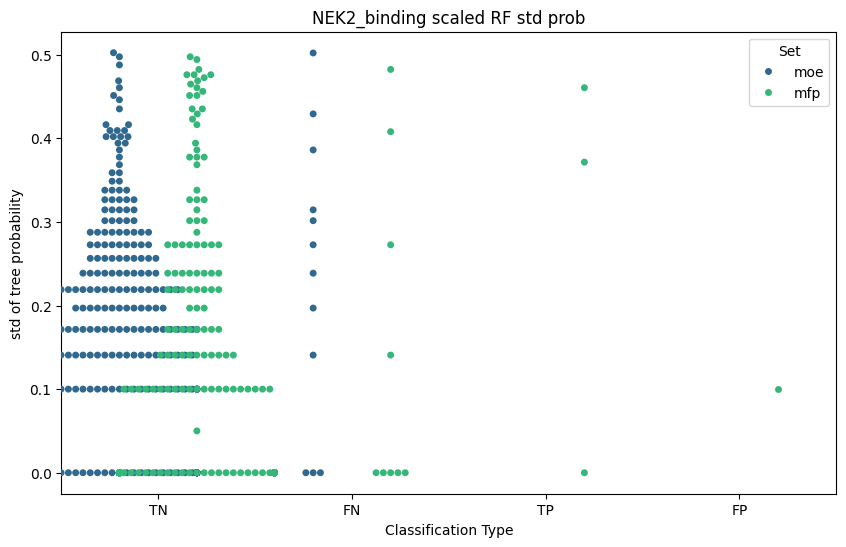

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

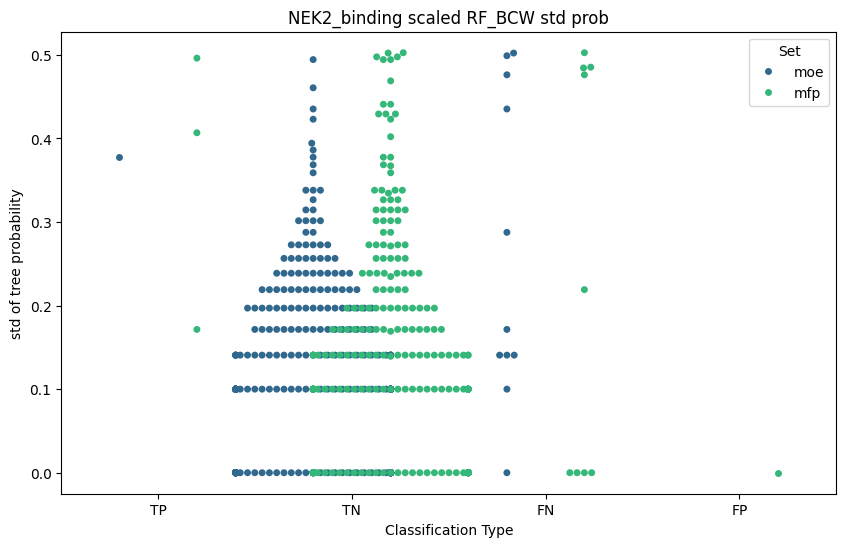

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

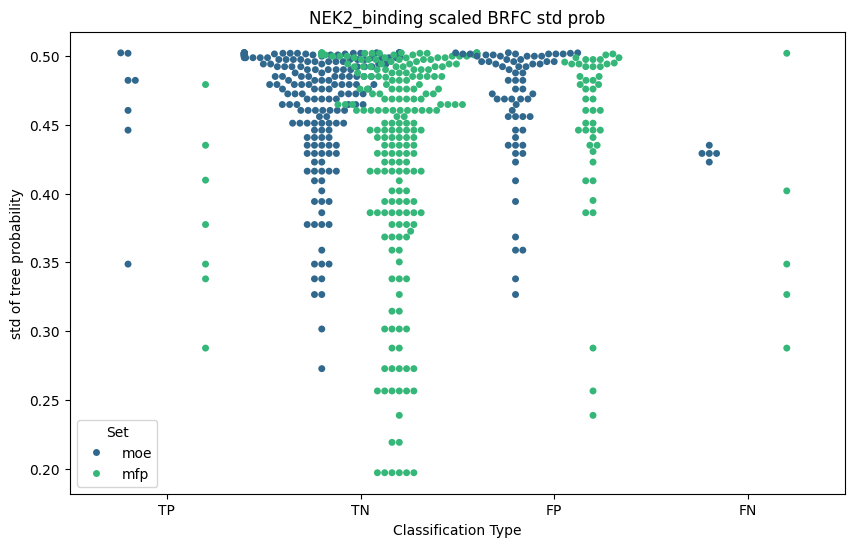

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

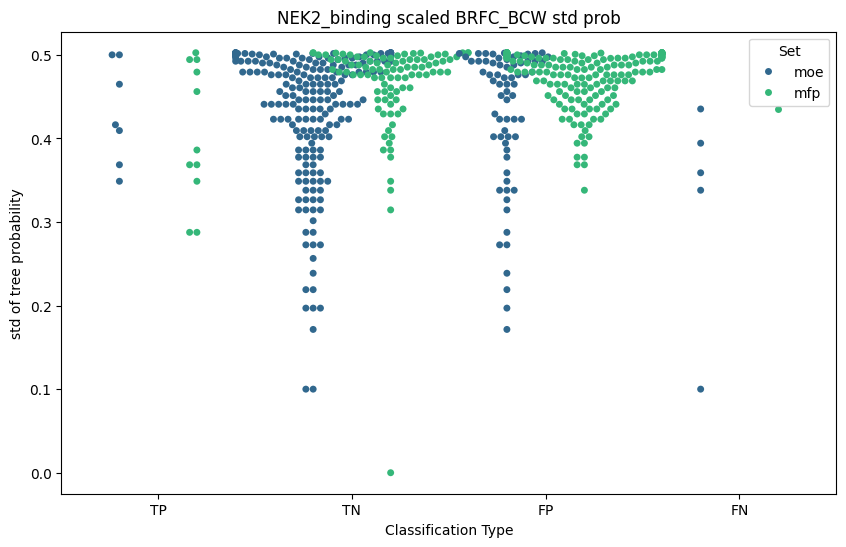

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

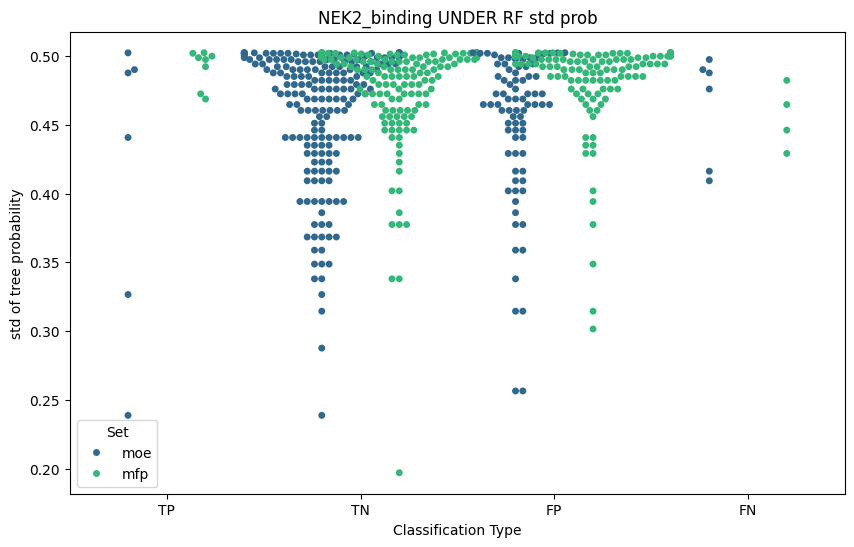

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

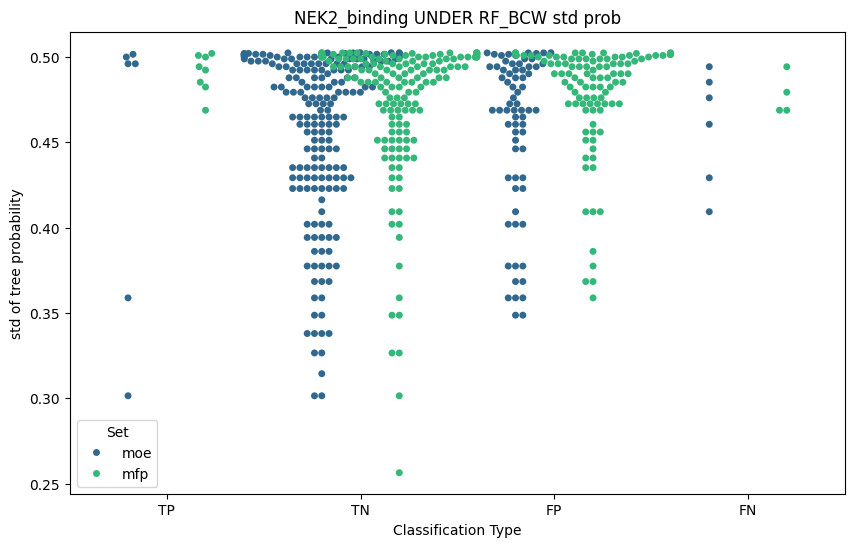

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

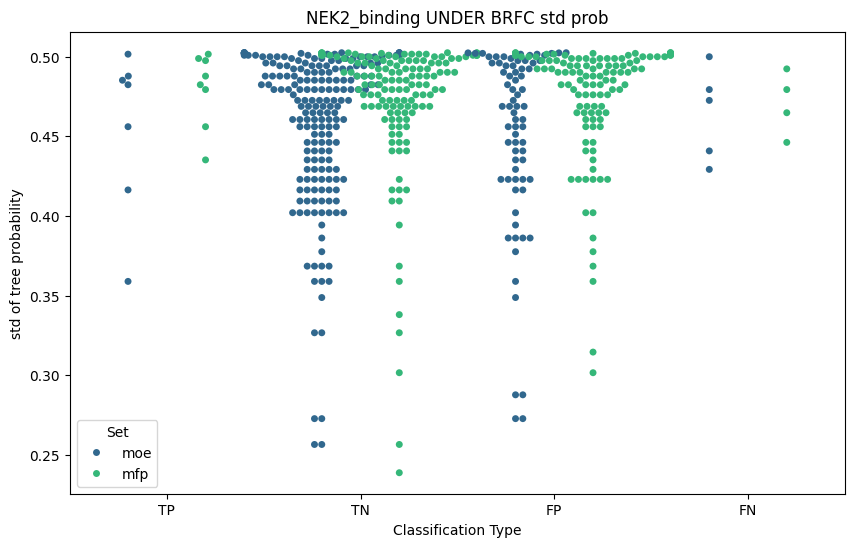

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

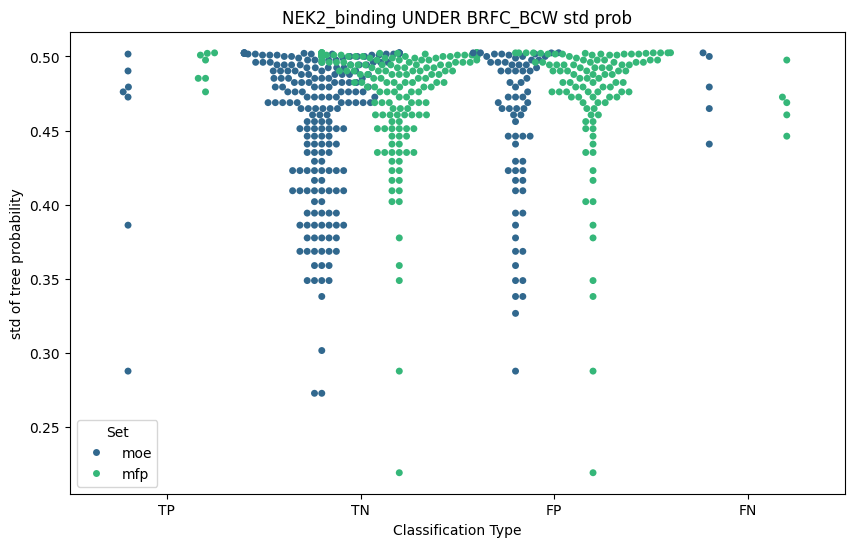

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

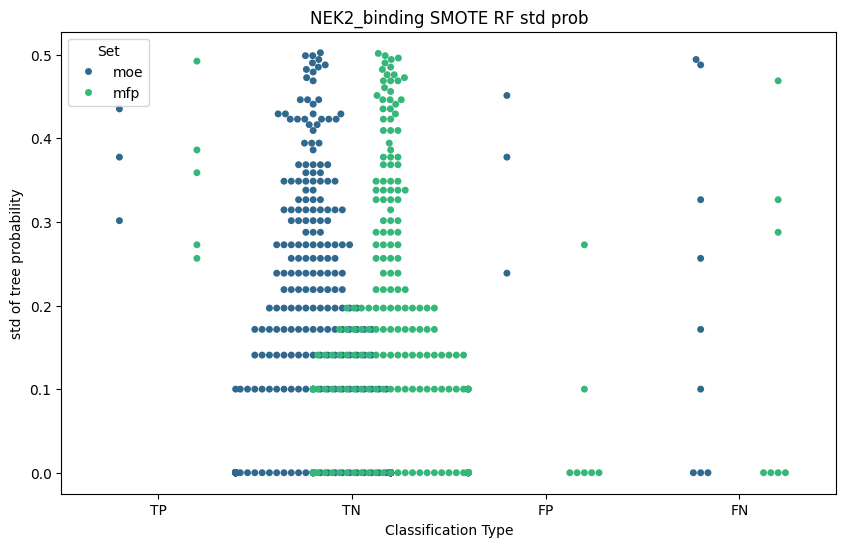

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

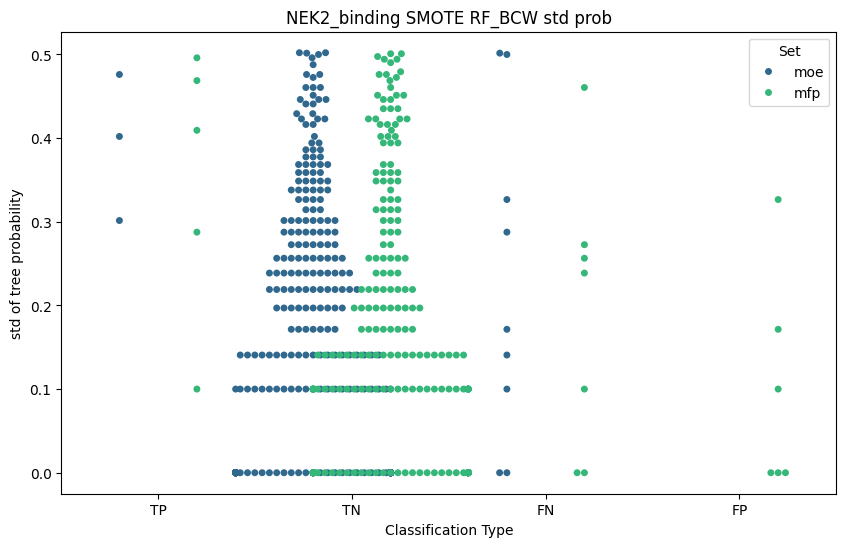

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

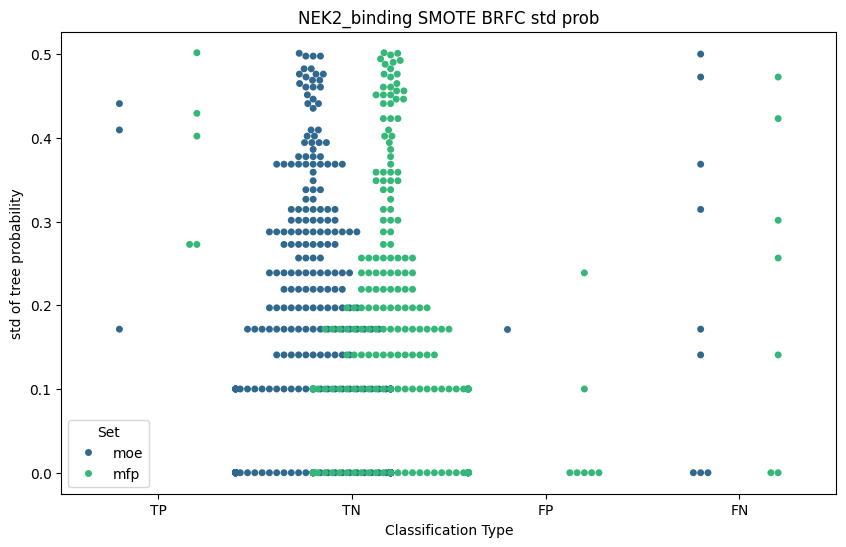

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

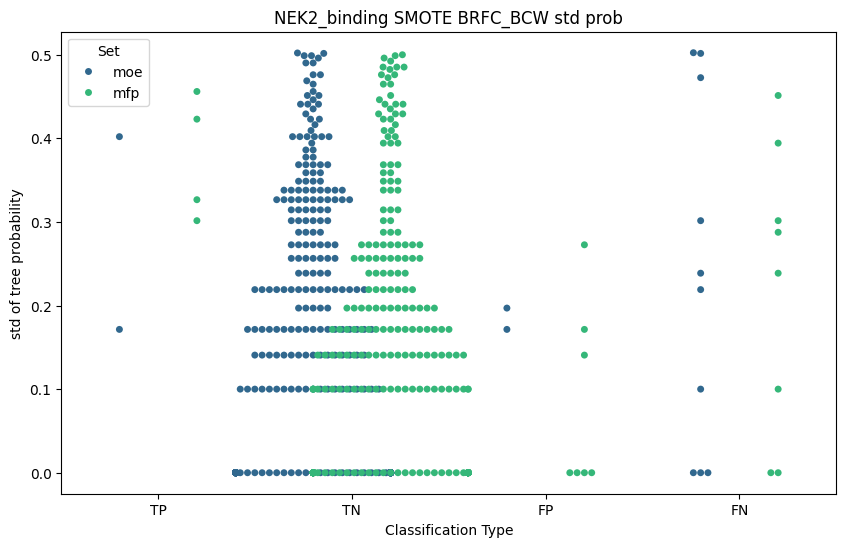

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


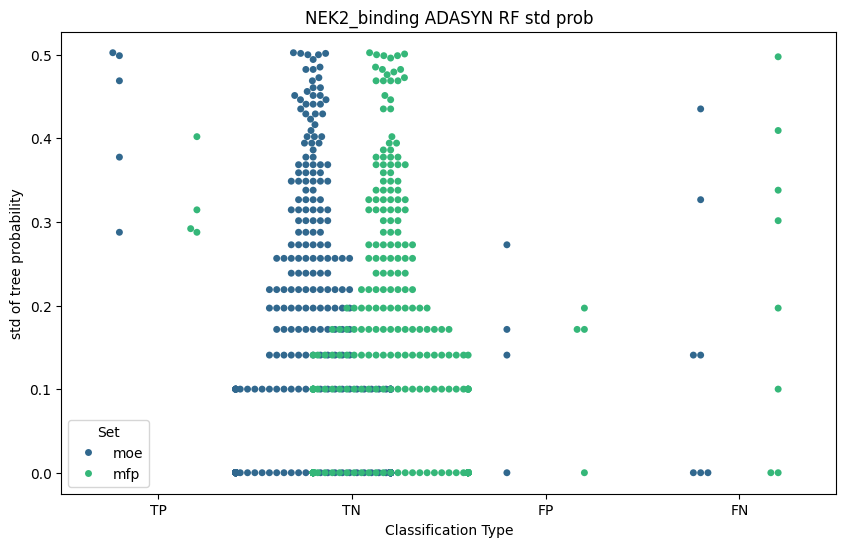

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

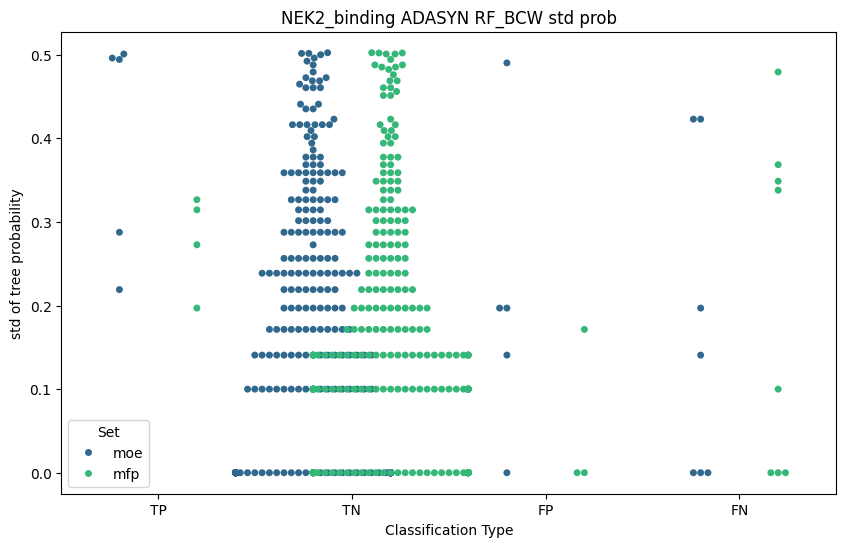

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

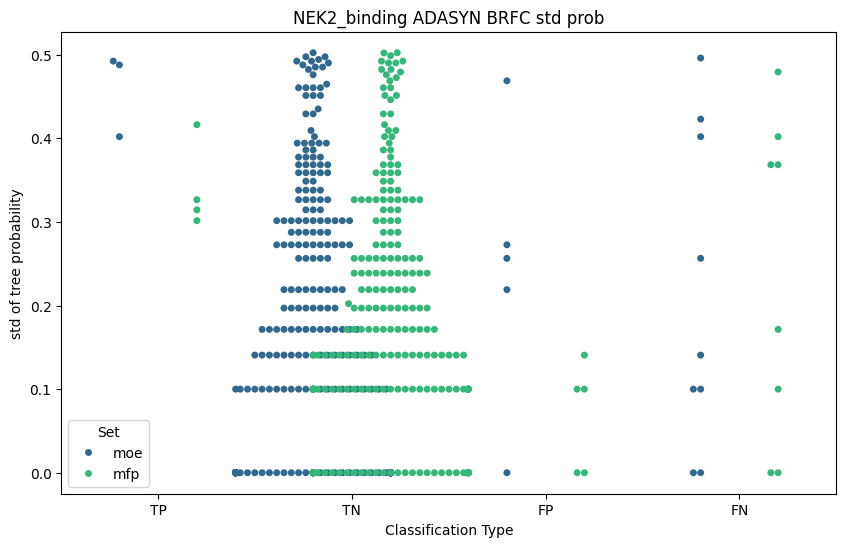

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

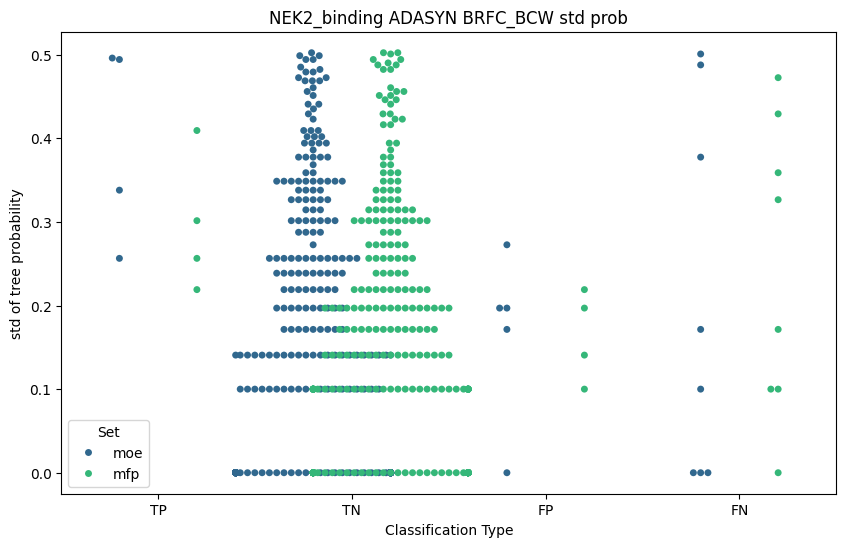

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 49.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 50.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

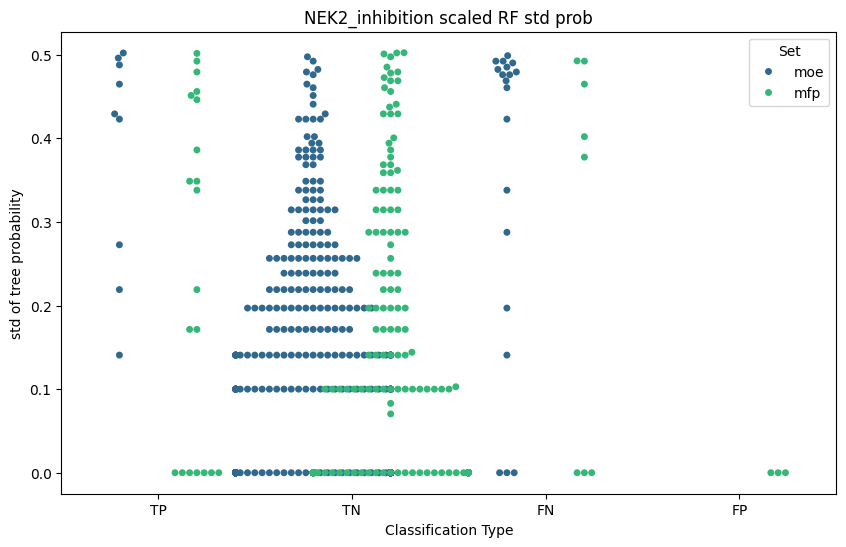

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 49.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

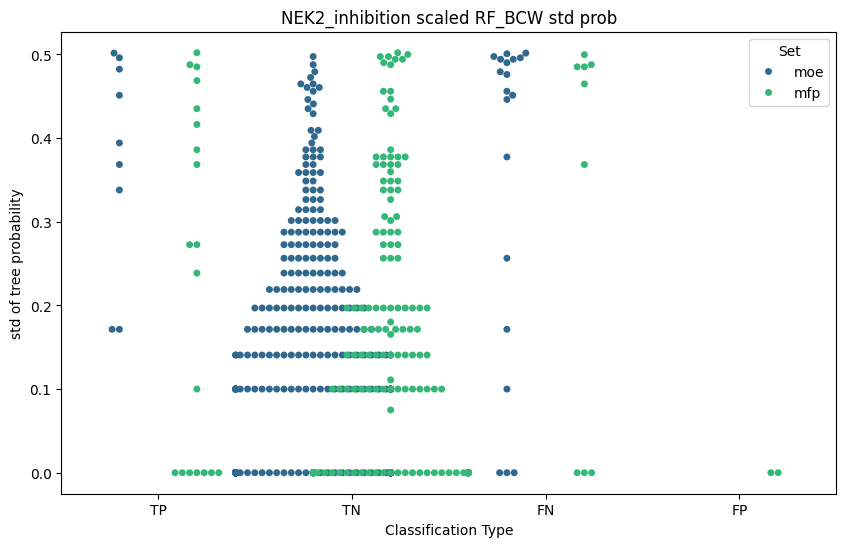

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 50.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

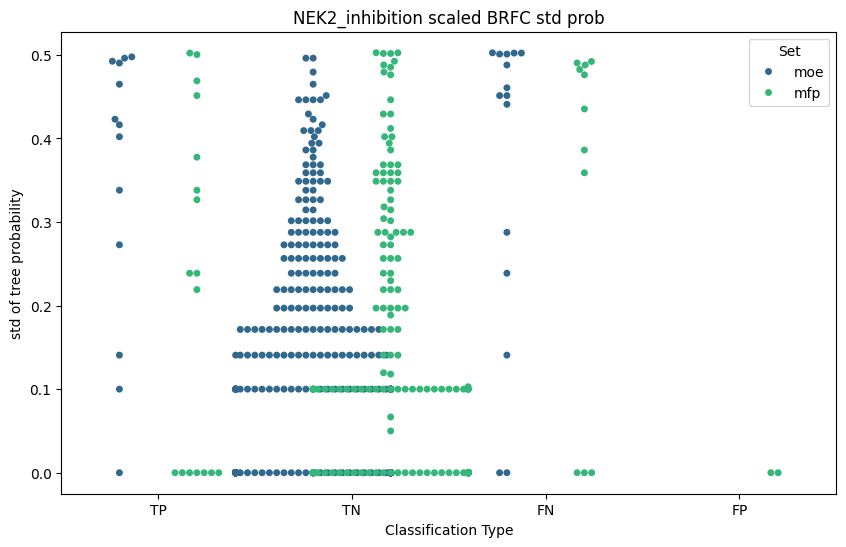

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 50.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

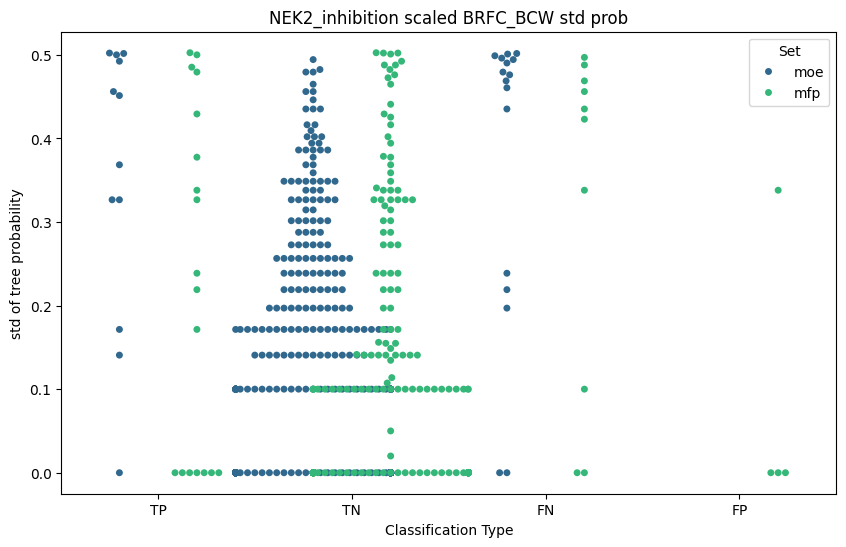

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

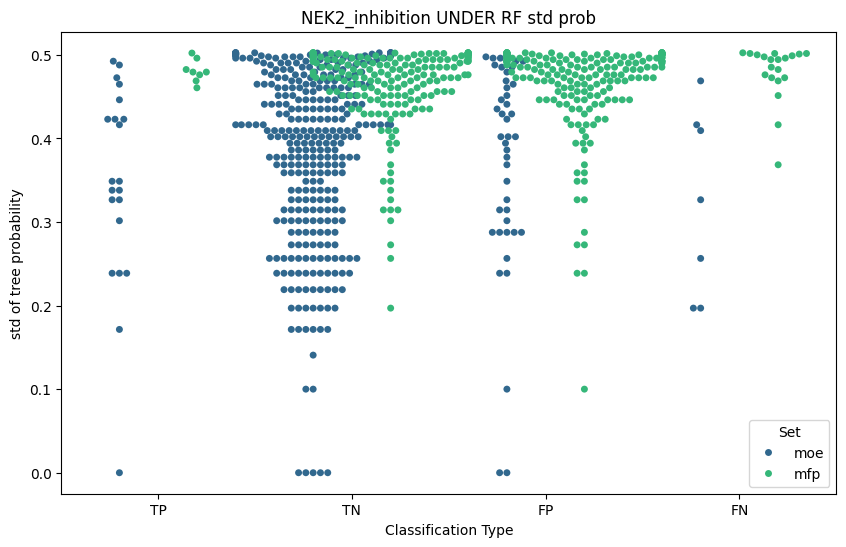

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

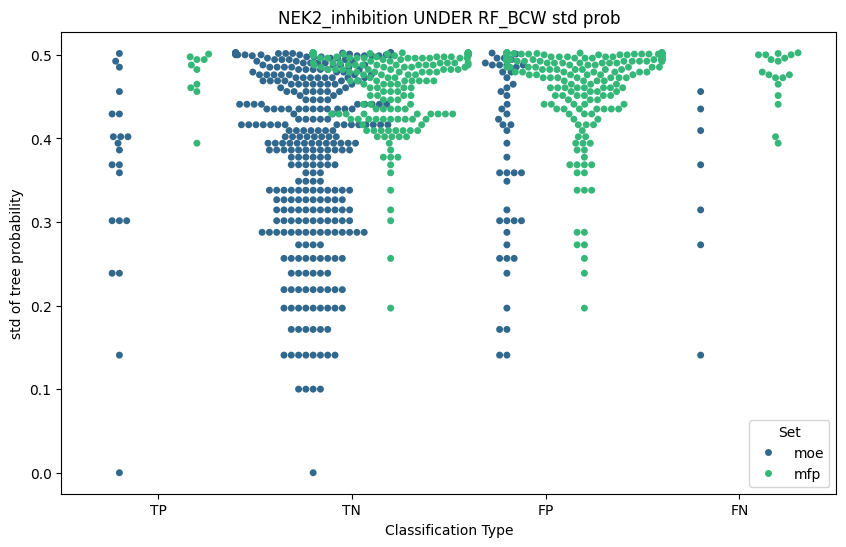

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

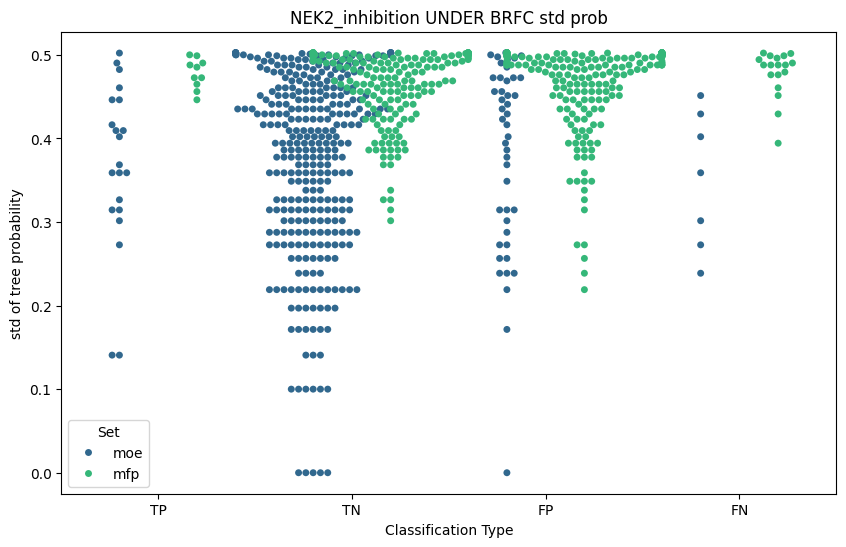

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

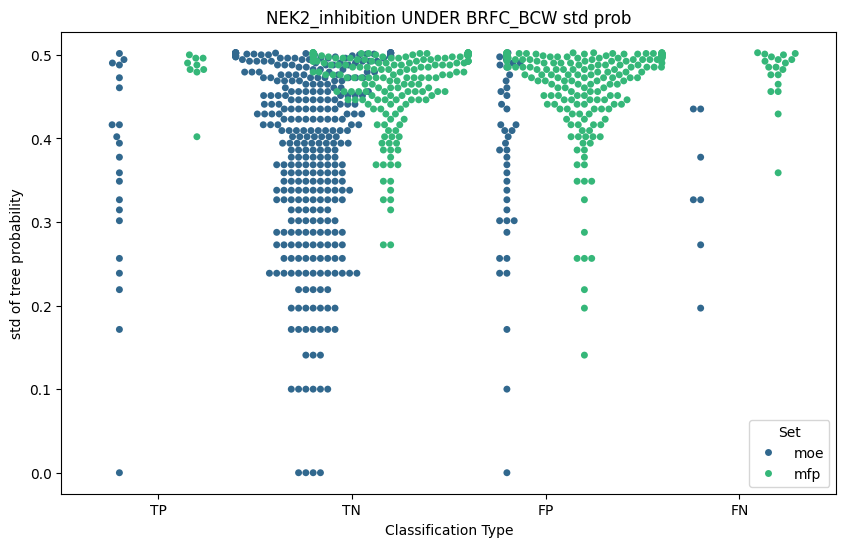

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

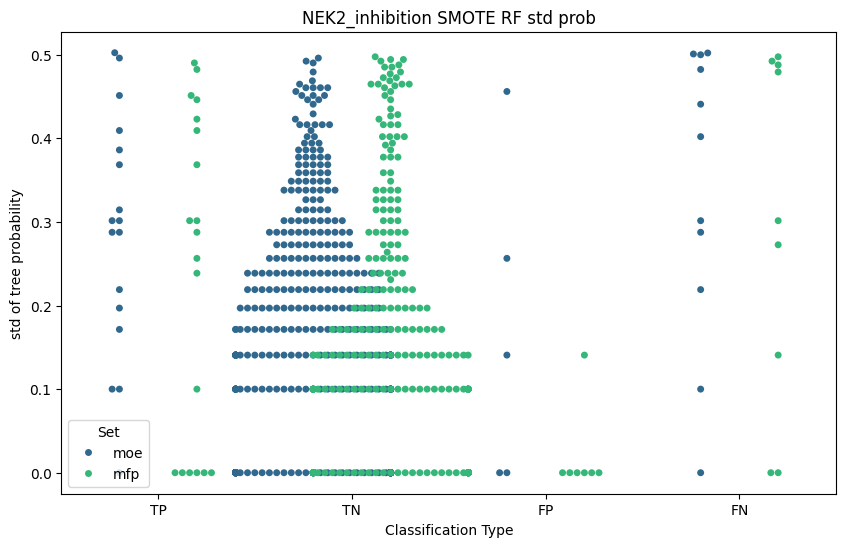

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

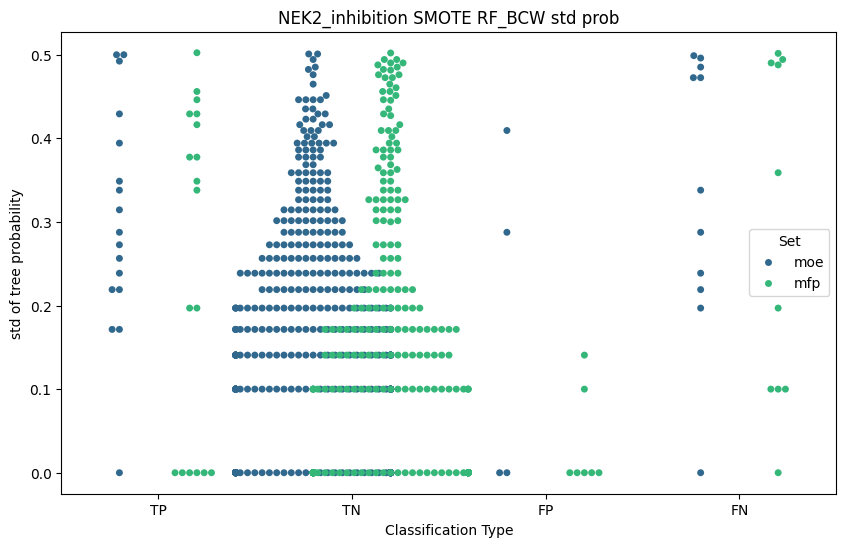

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

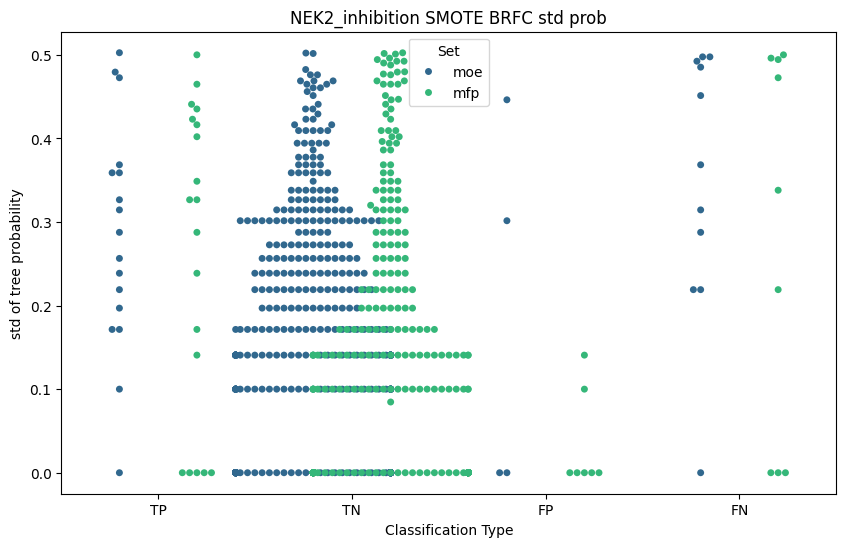

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

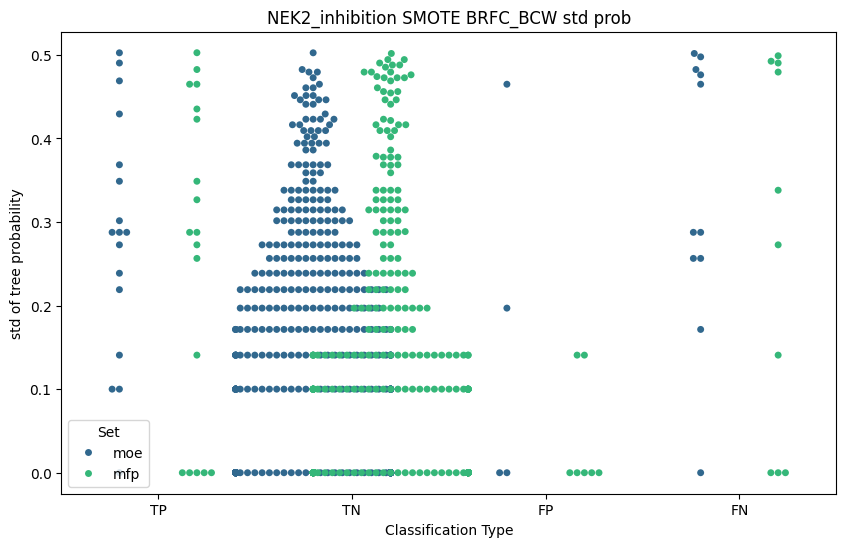

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 58.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

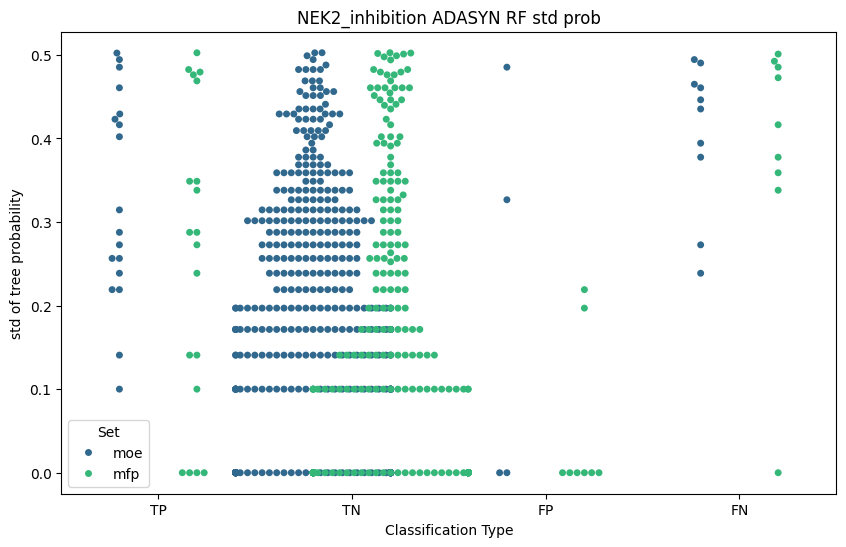

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

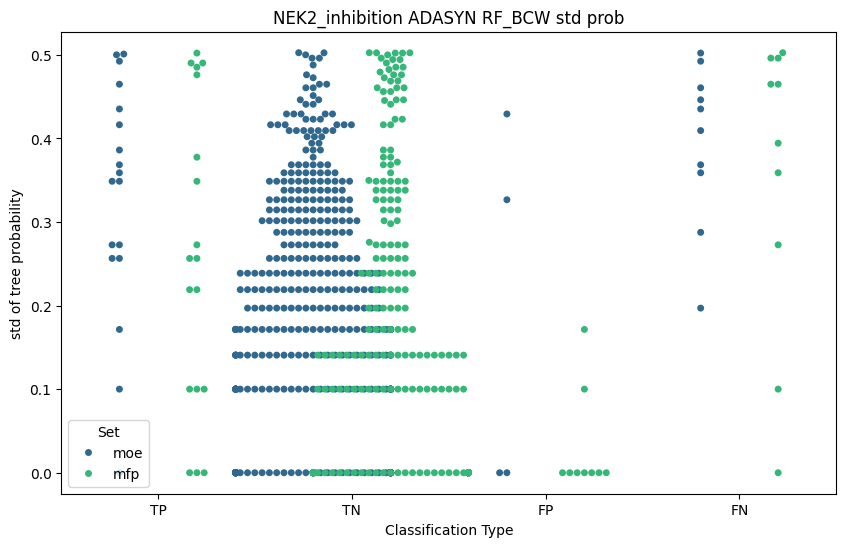

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

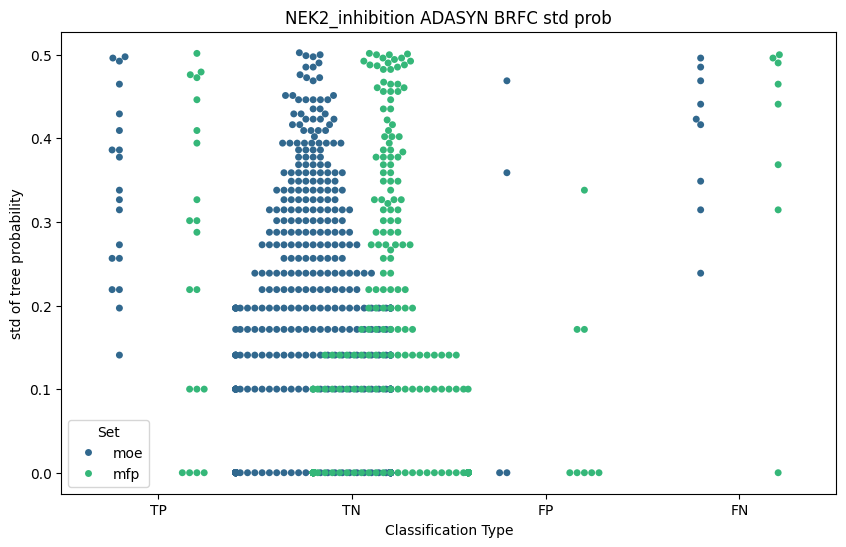

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

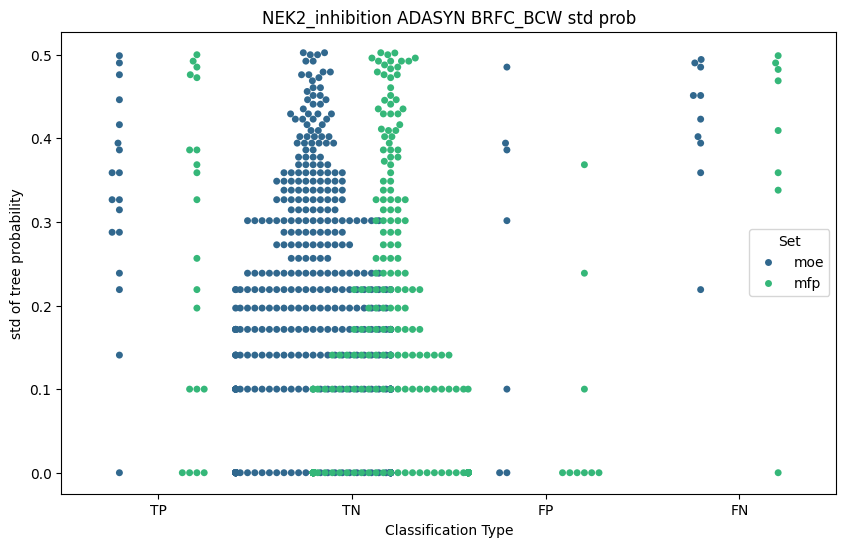

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

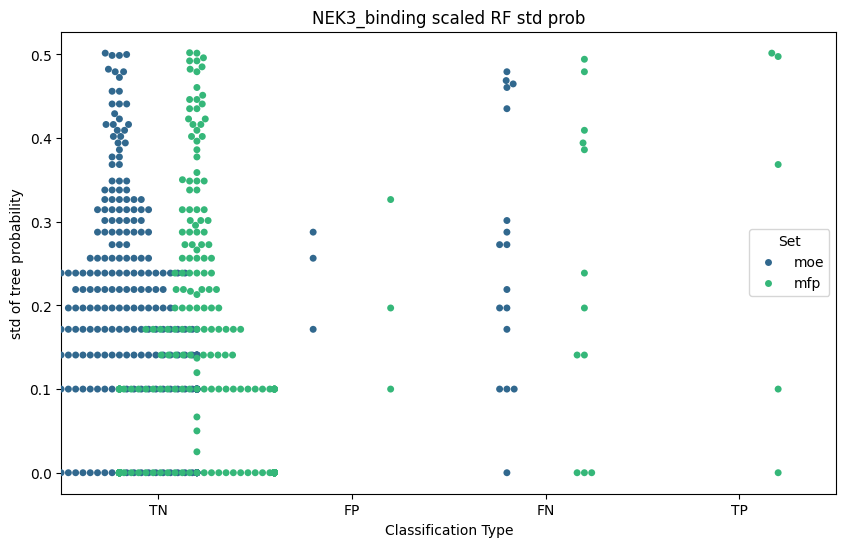

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

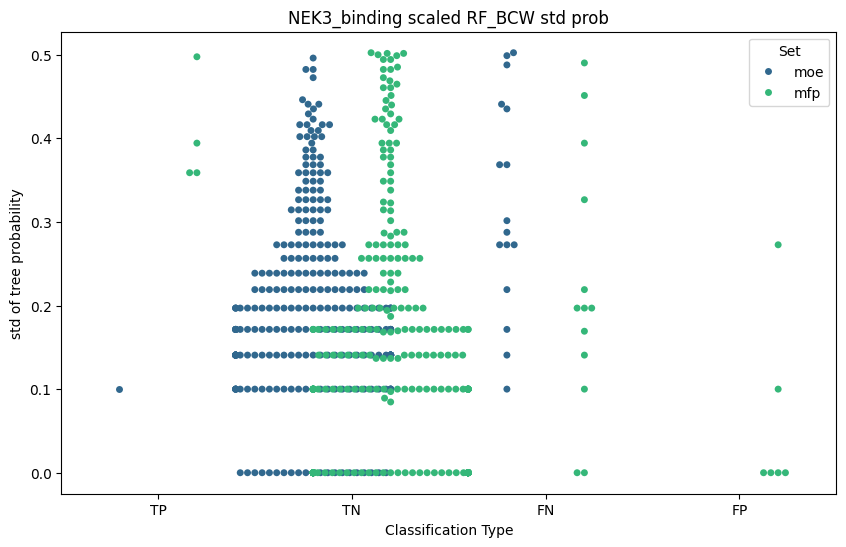

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 35.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

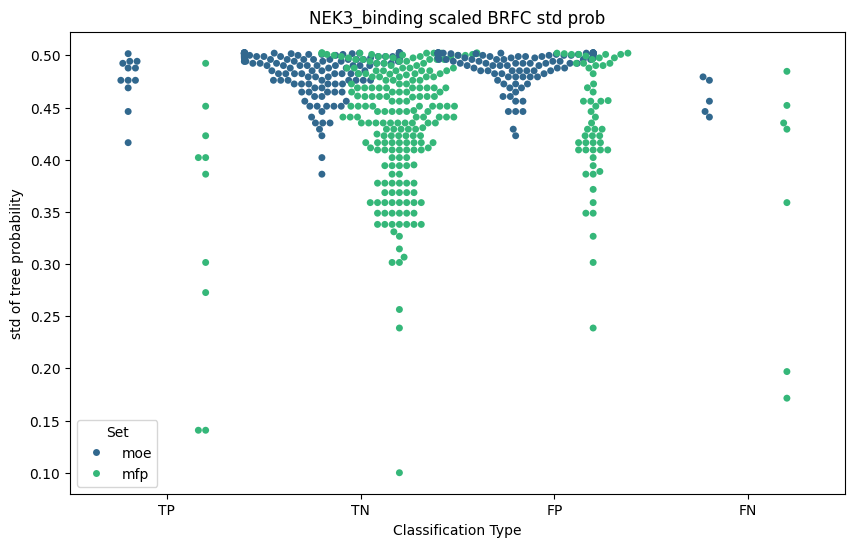

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

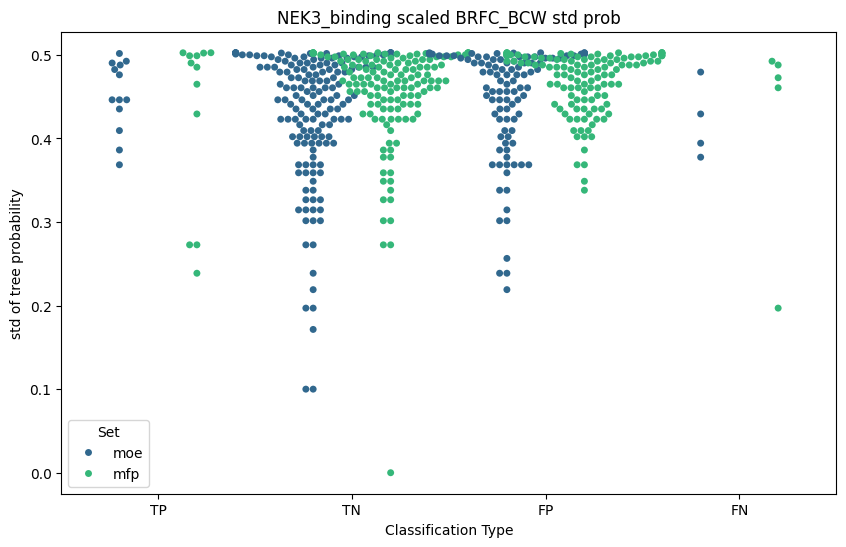

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

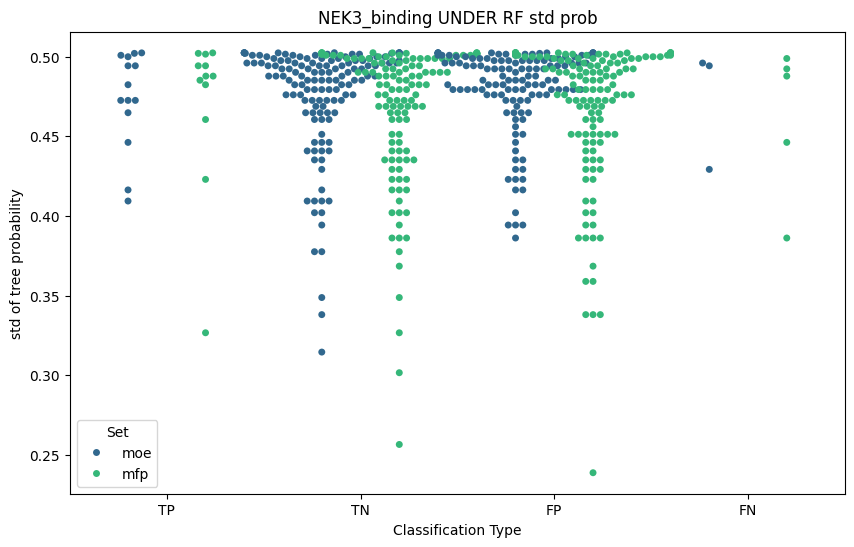

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

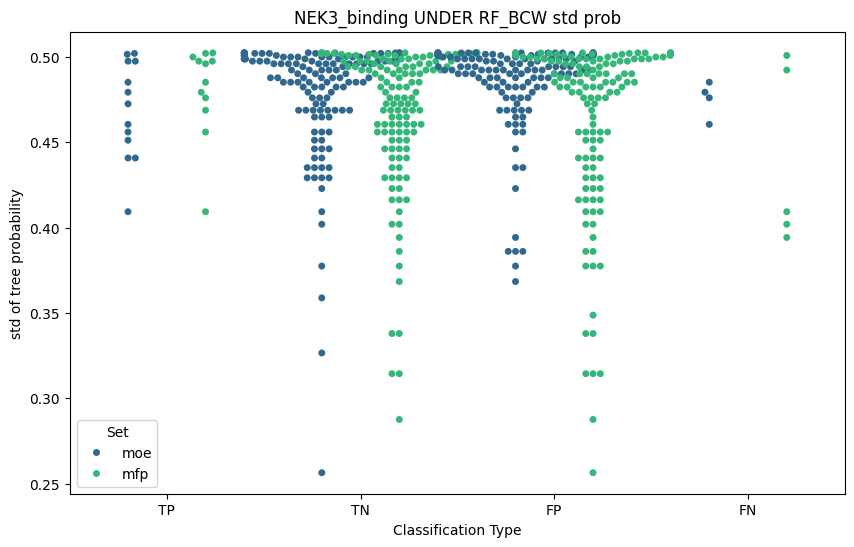

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

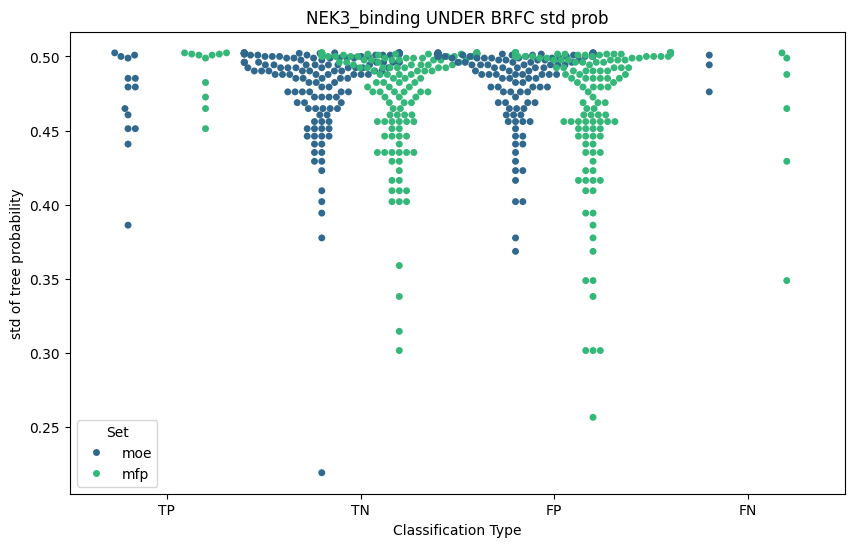

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

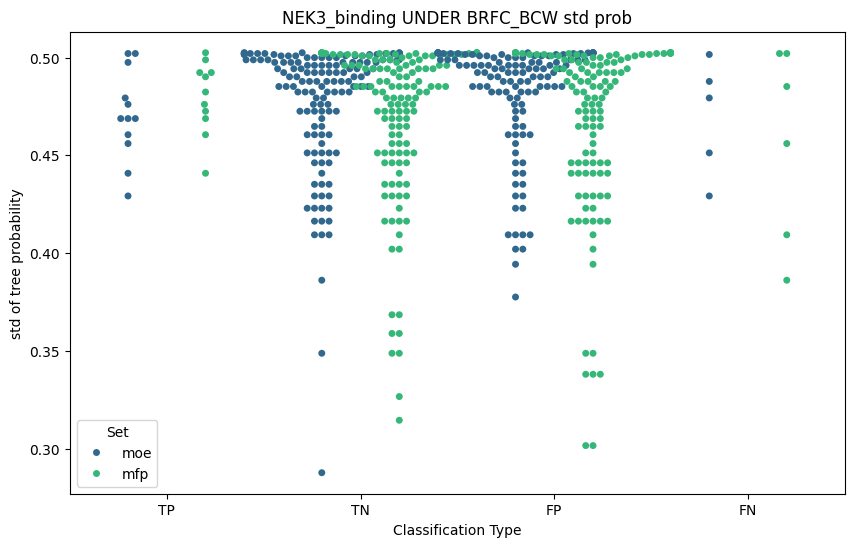

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 36.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


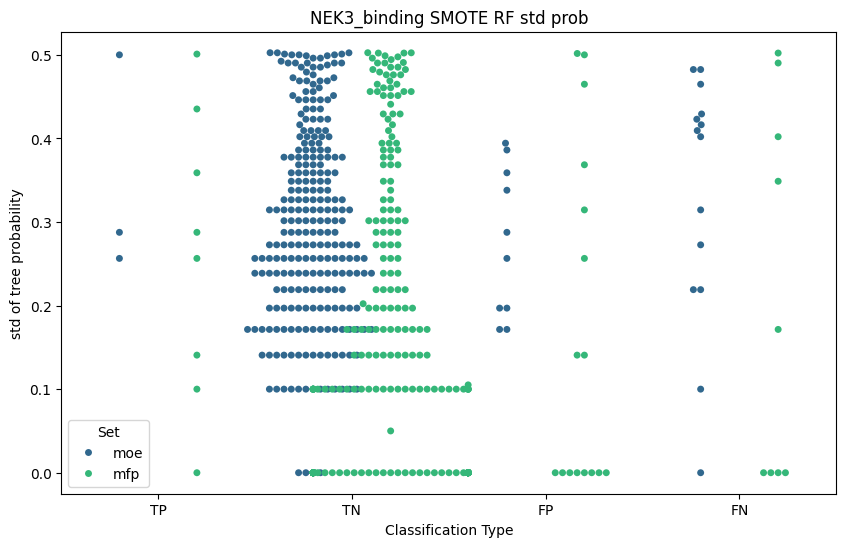

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


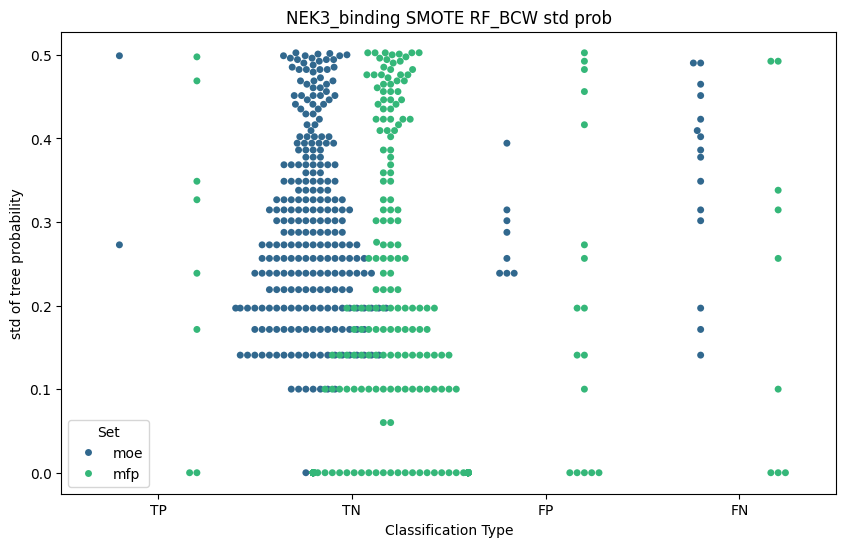

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


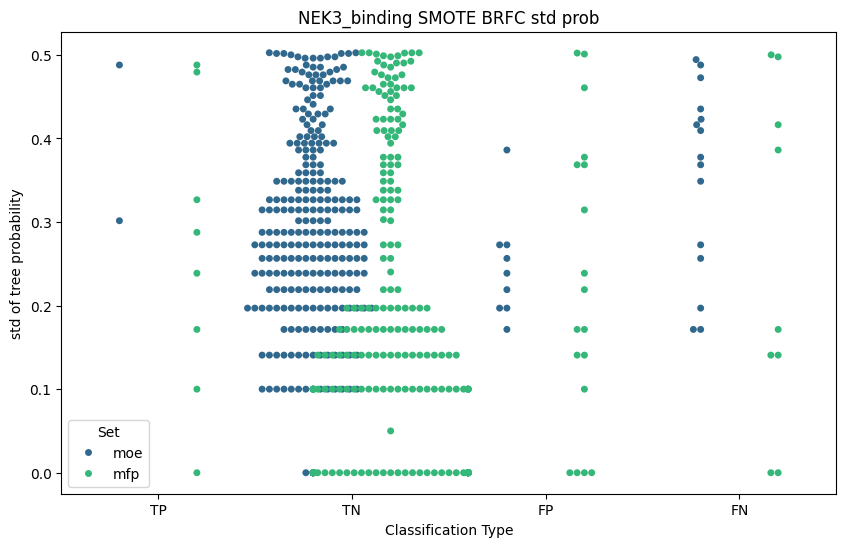

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


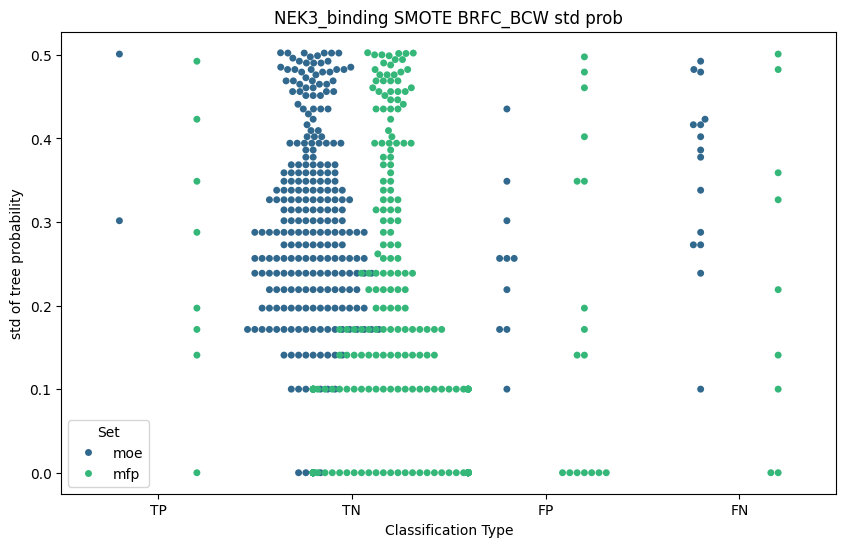

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


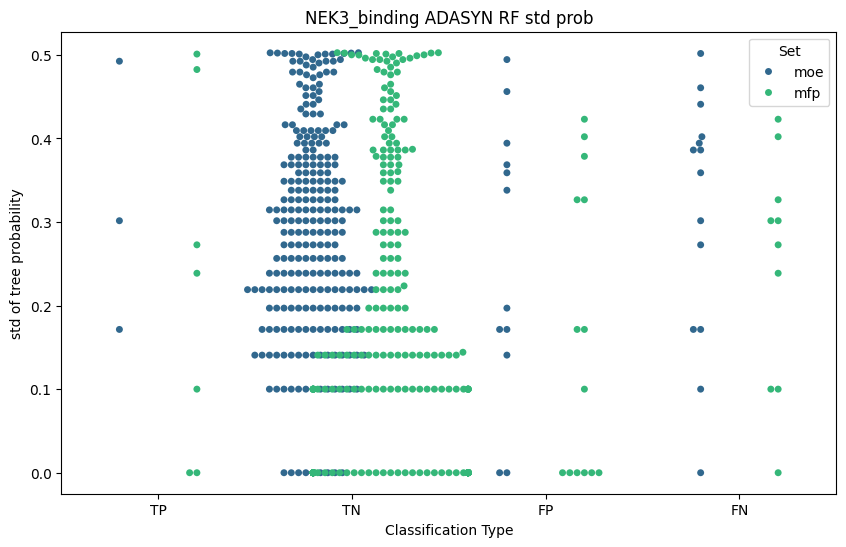

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


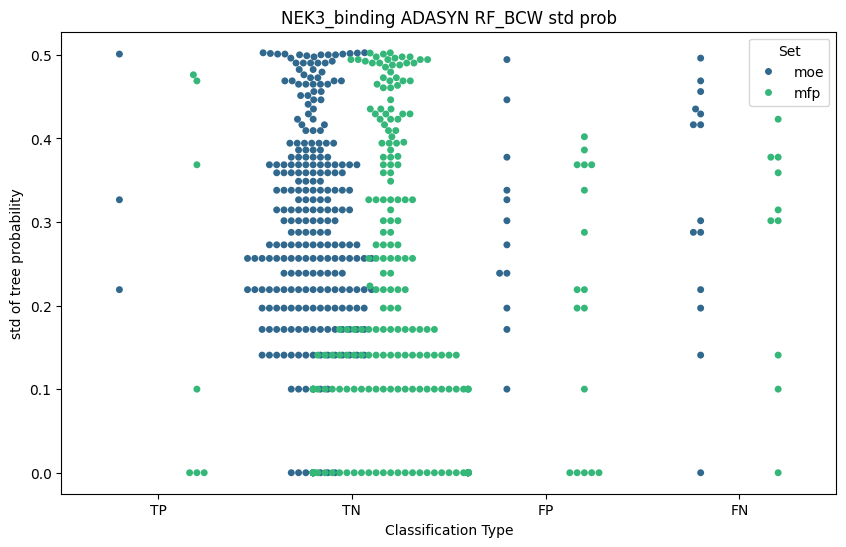

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


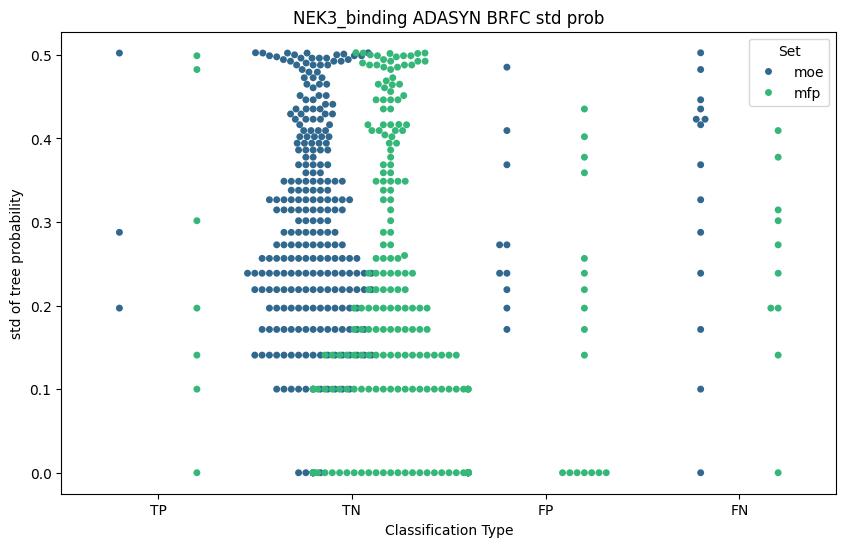

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


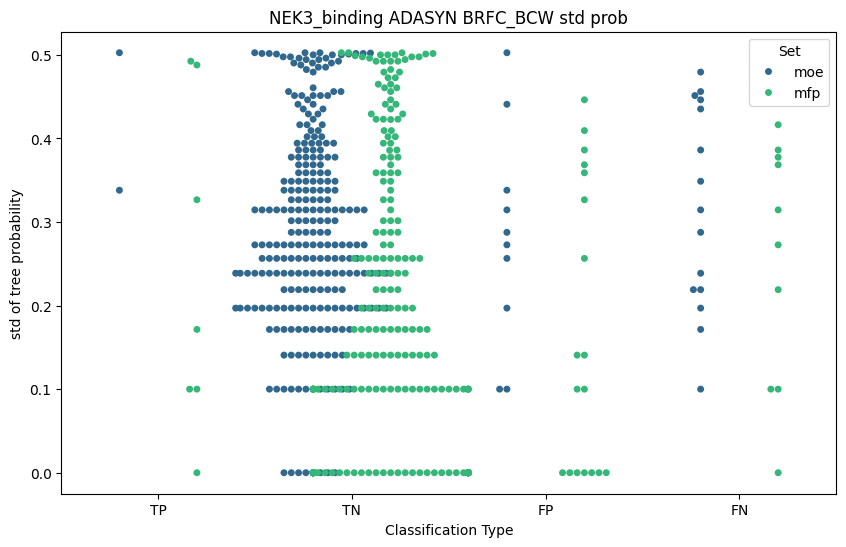

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

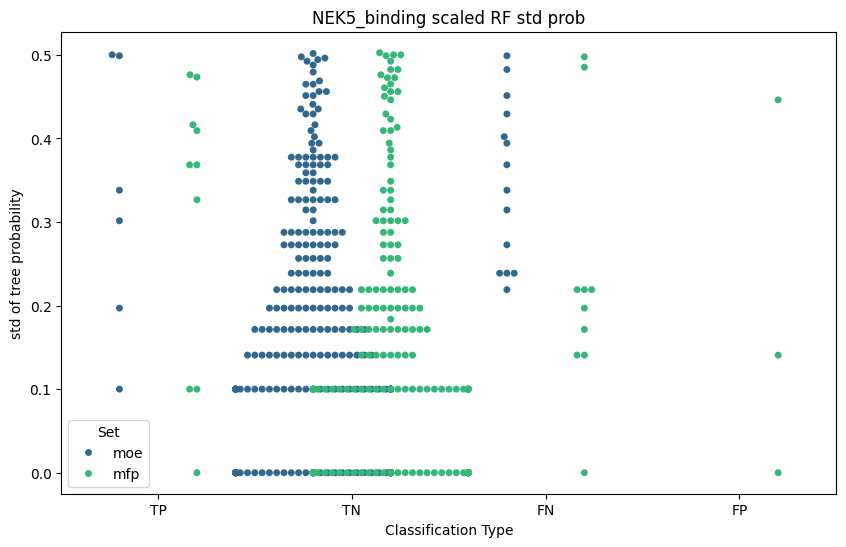

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

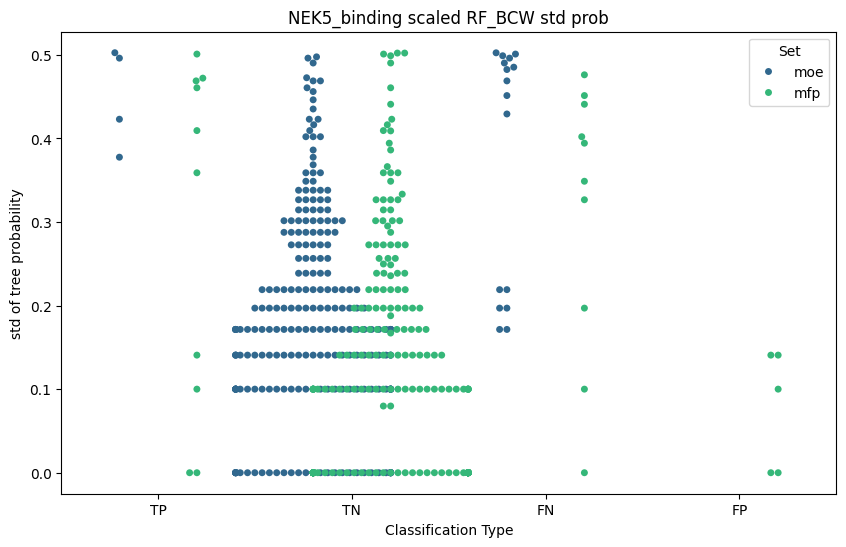

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


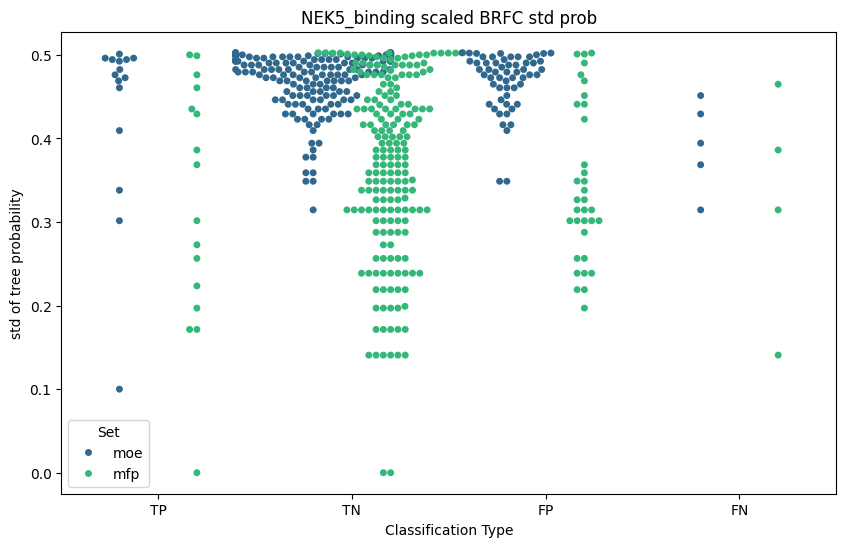

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

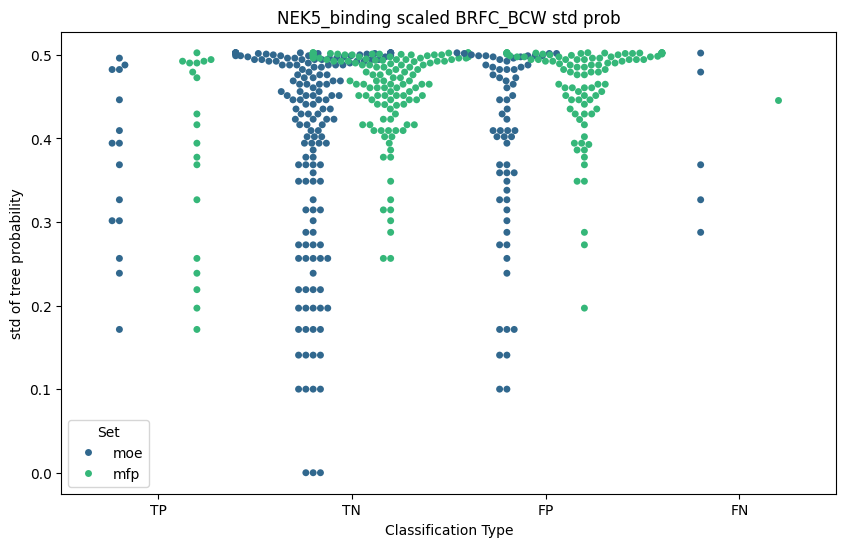

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

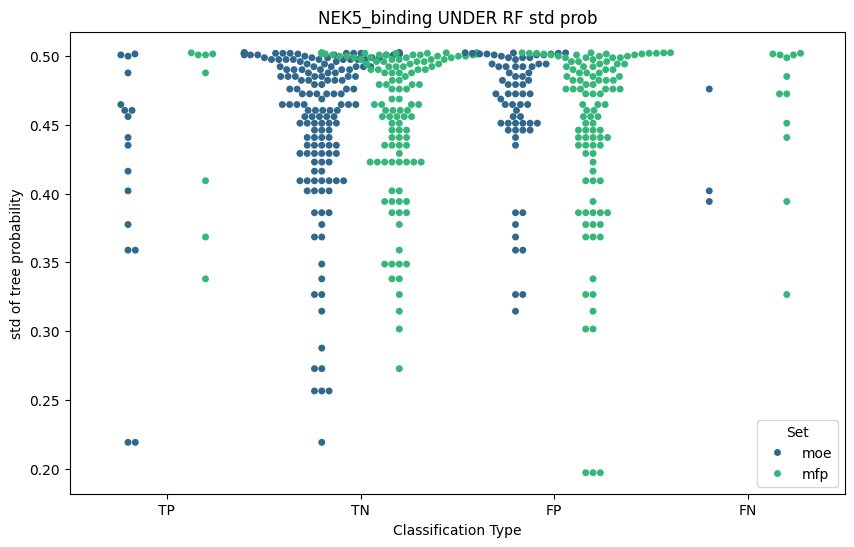

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


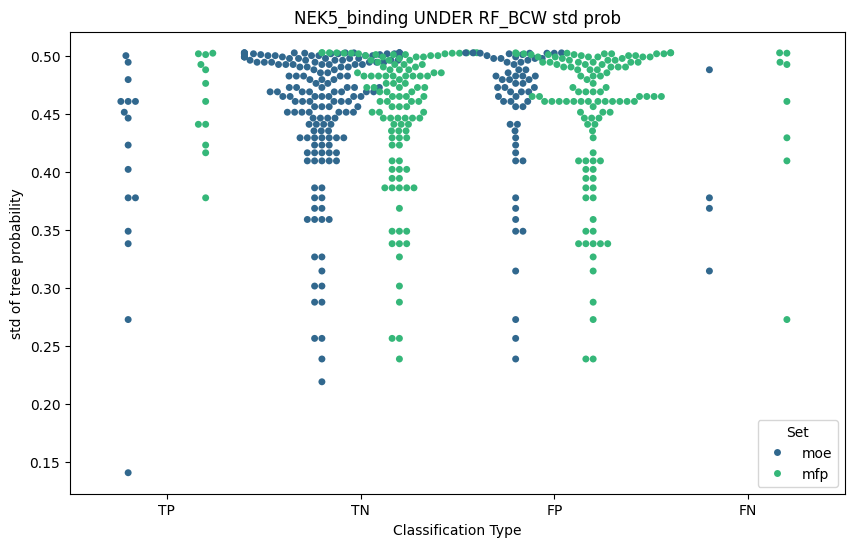

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


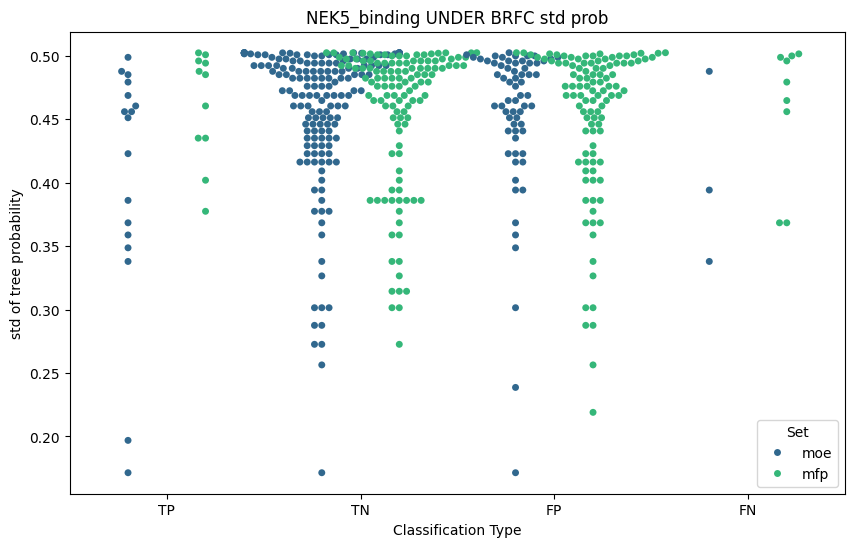

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


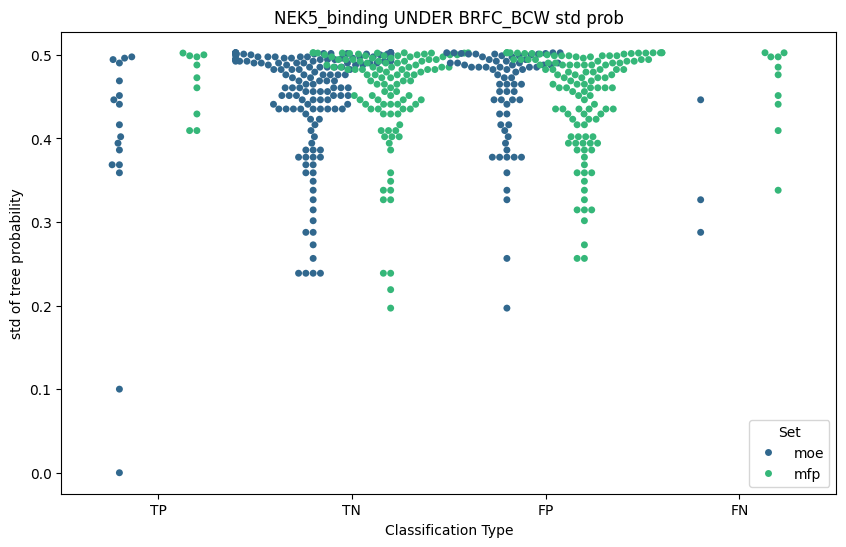

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


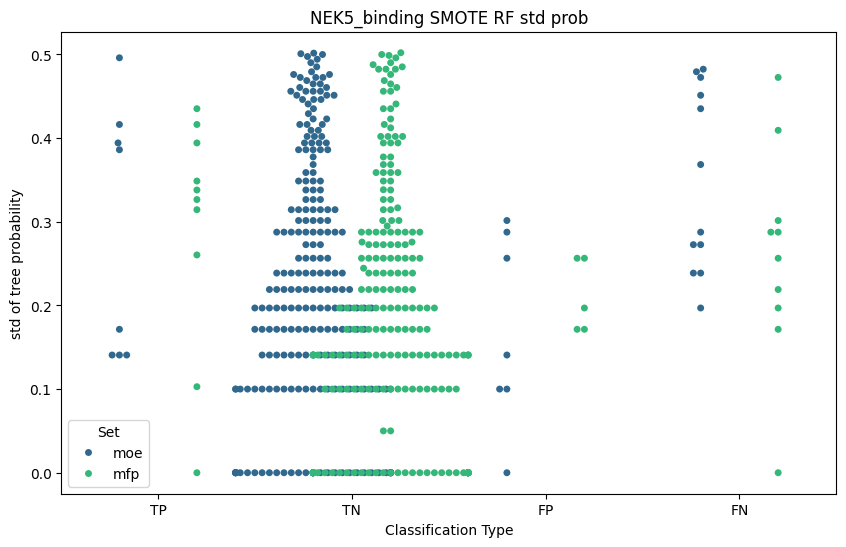

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


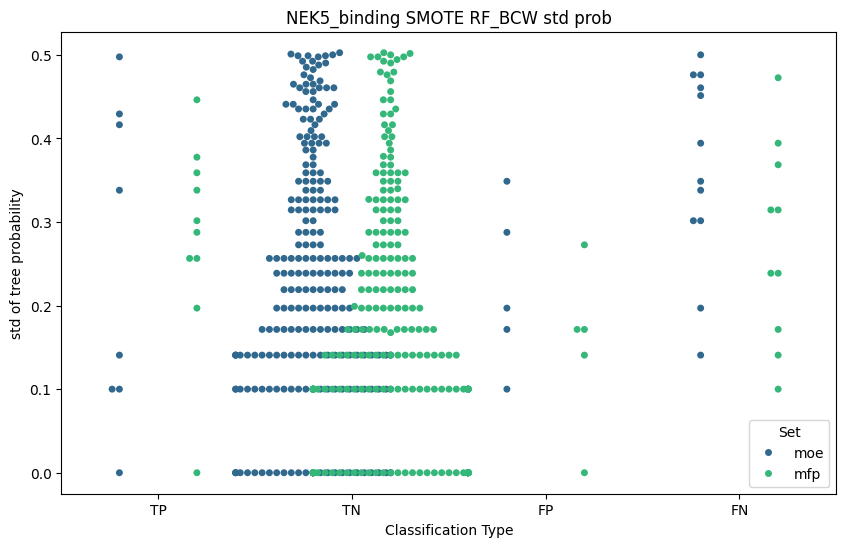

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

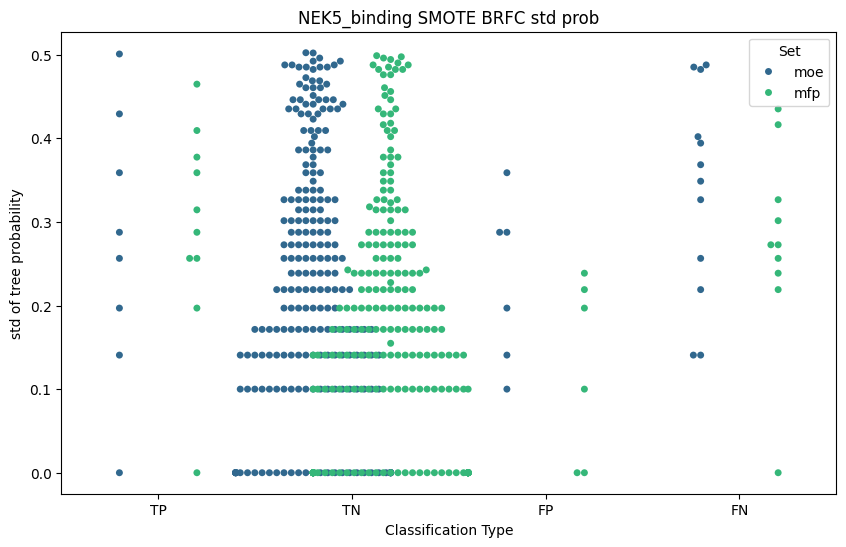

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 16.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

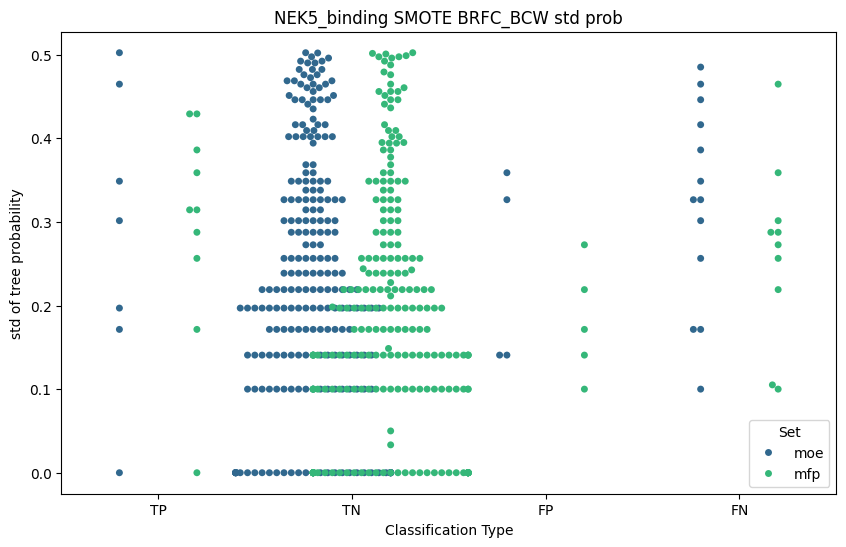

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

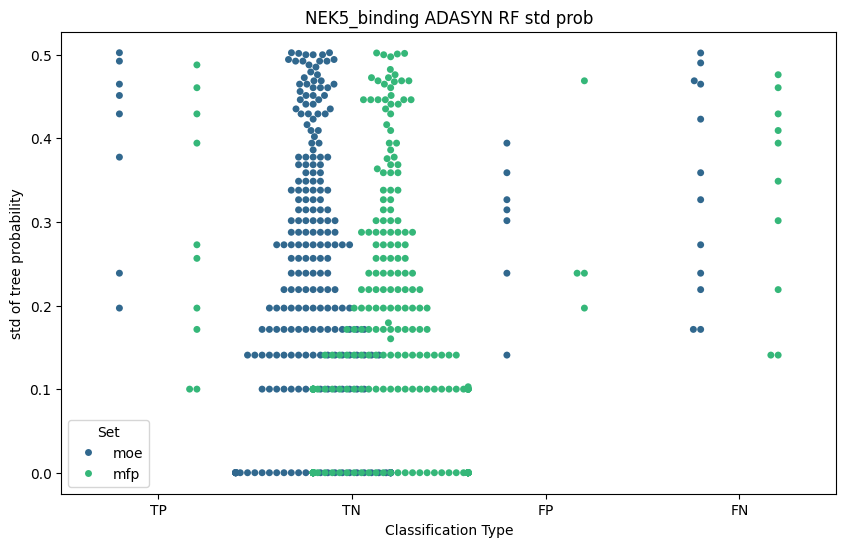

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


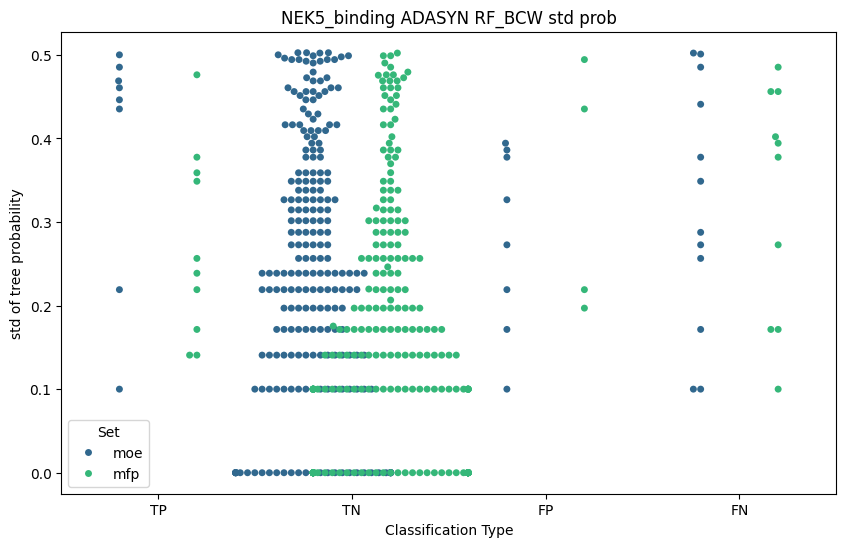

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


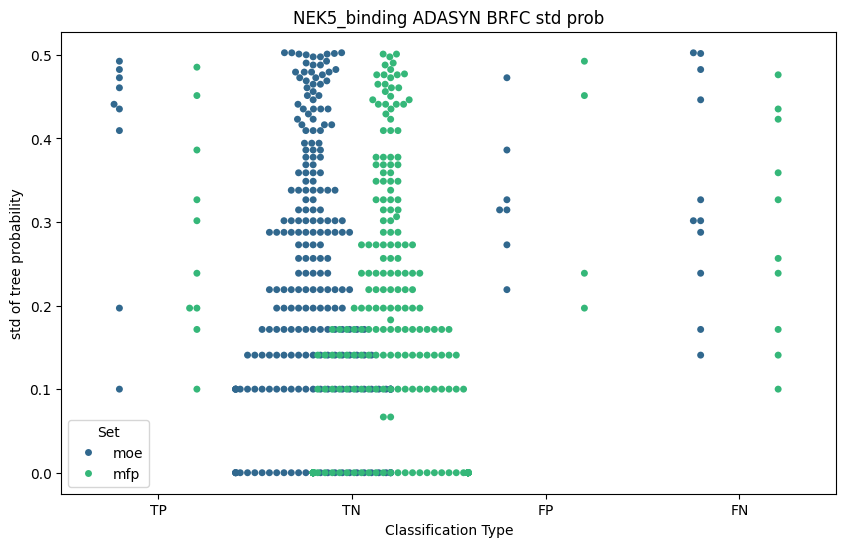

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

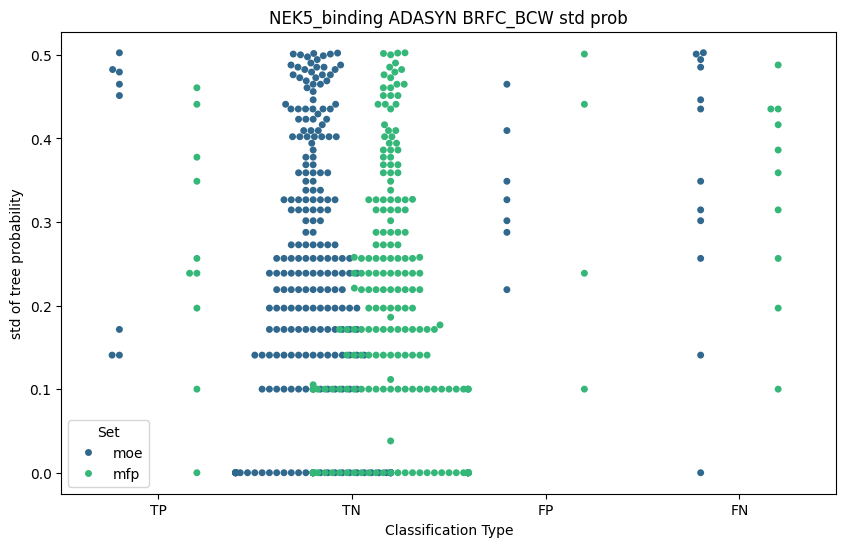

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 60.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

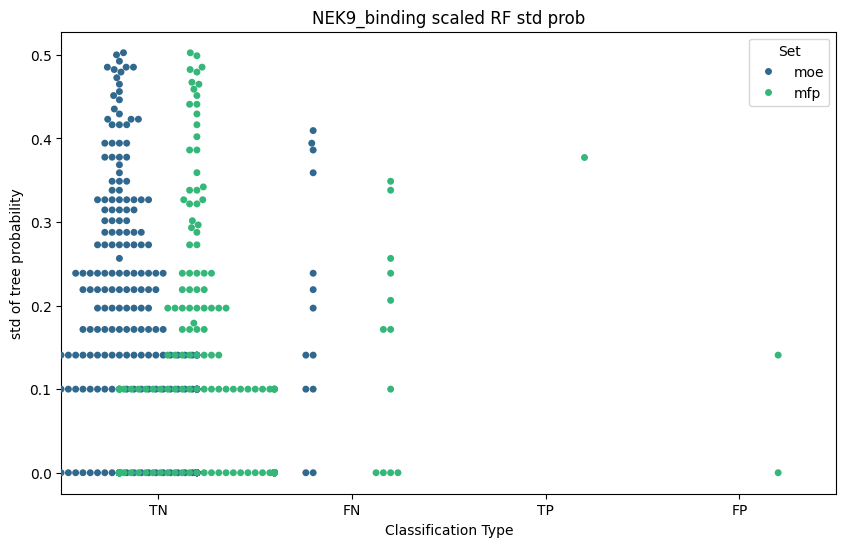

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 46.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

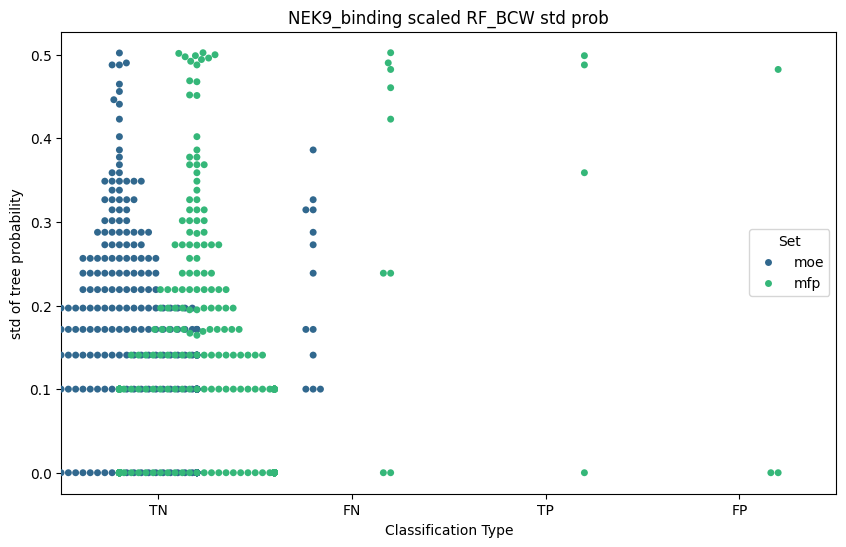

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


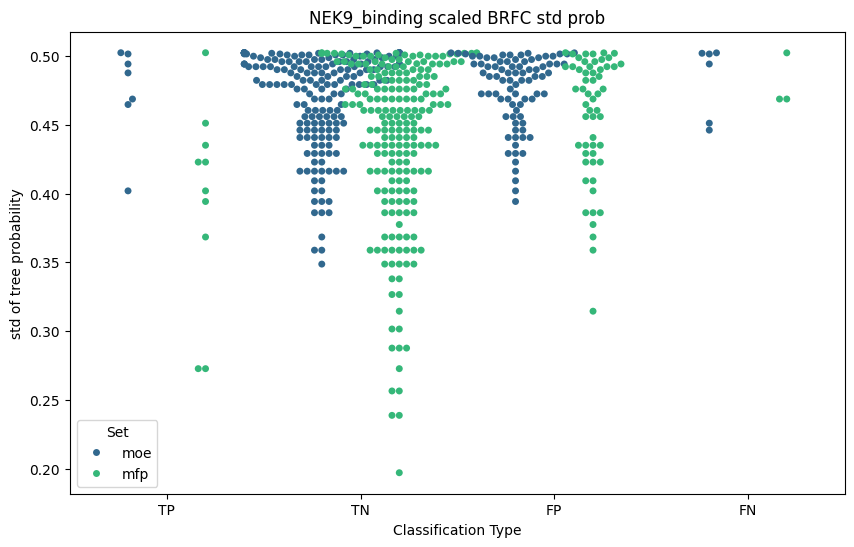

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

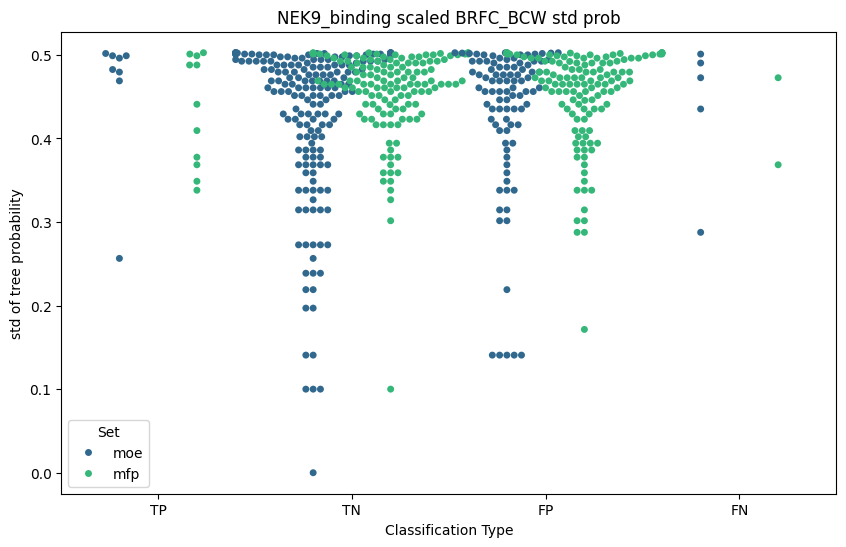

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


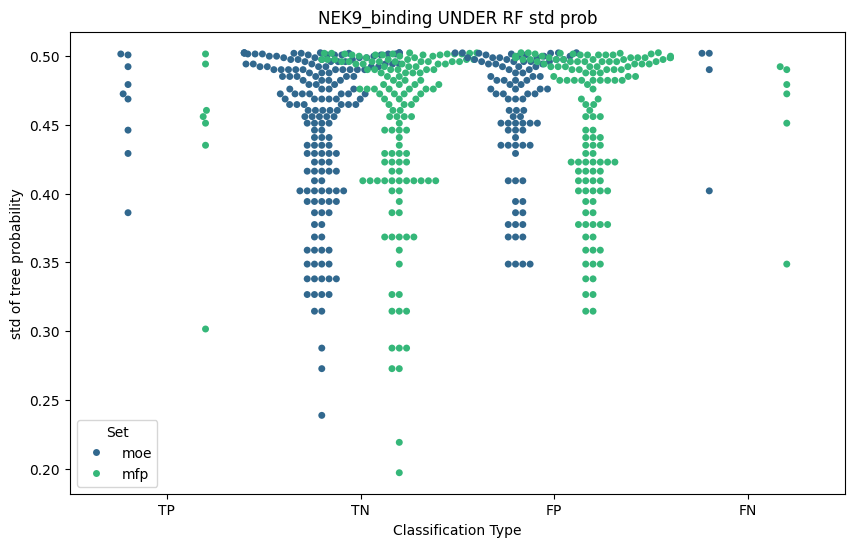

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarn

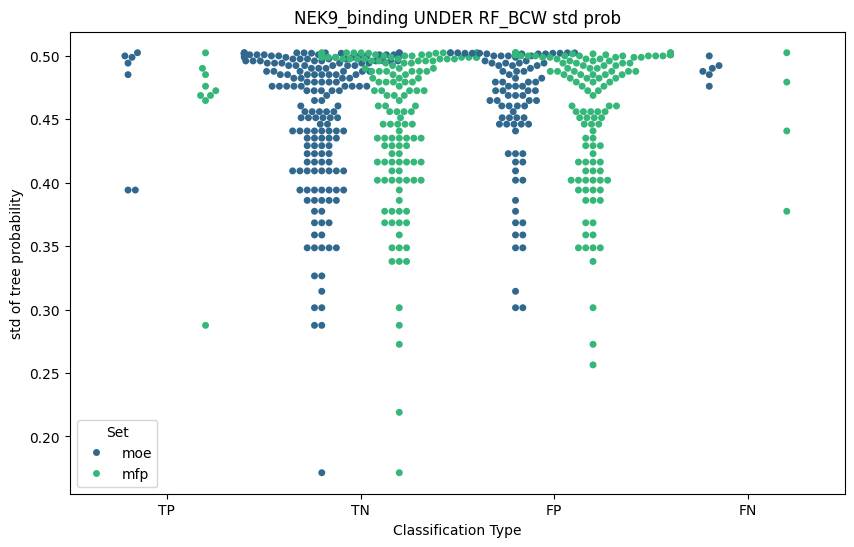

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

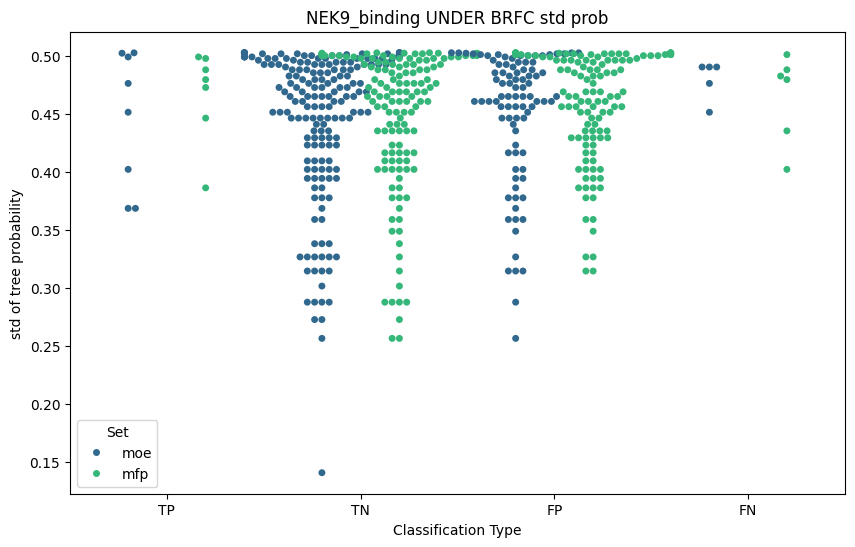

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

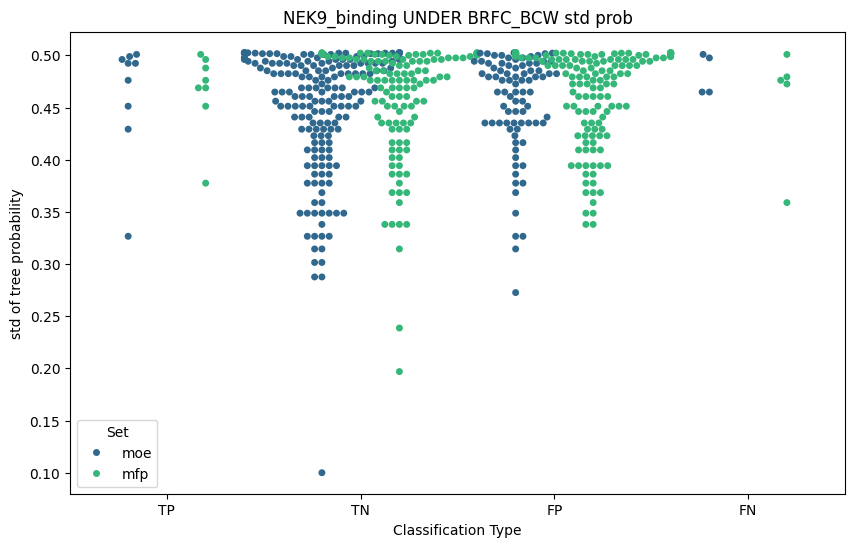

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

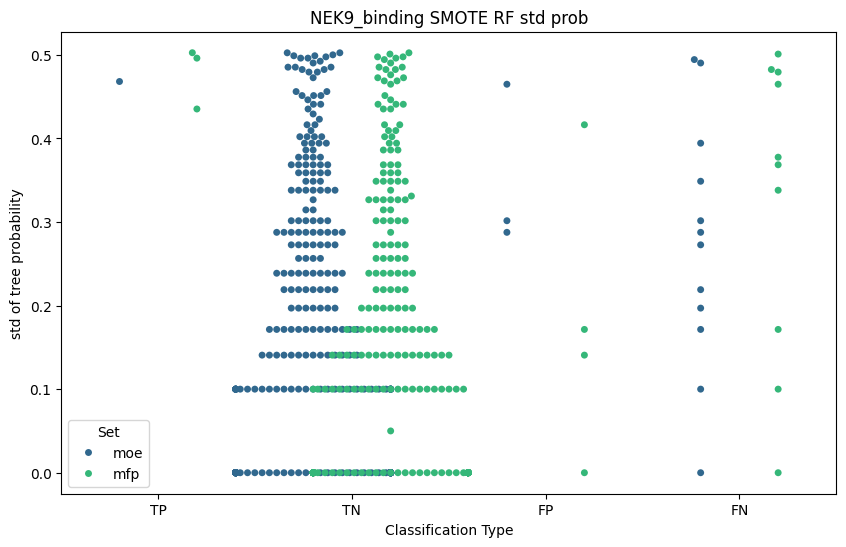

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

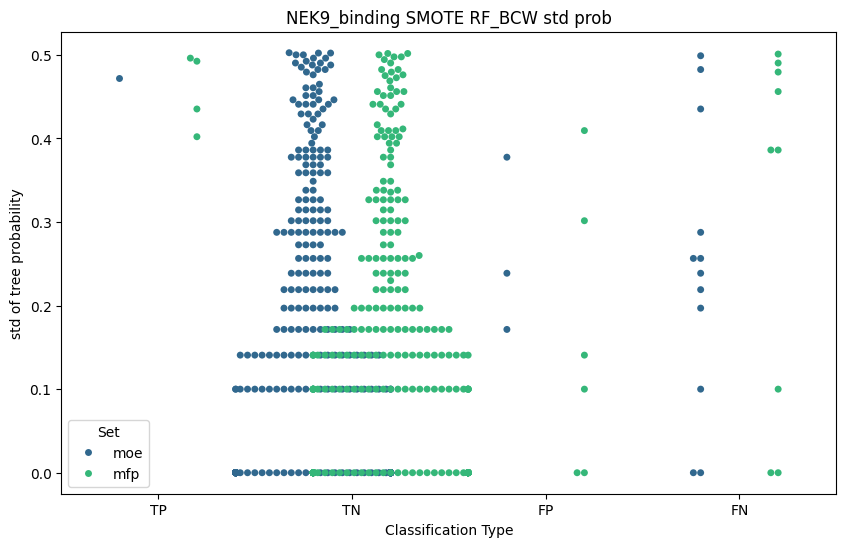

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

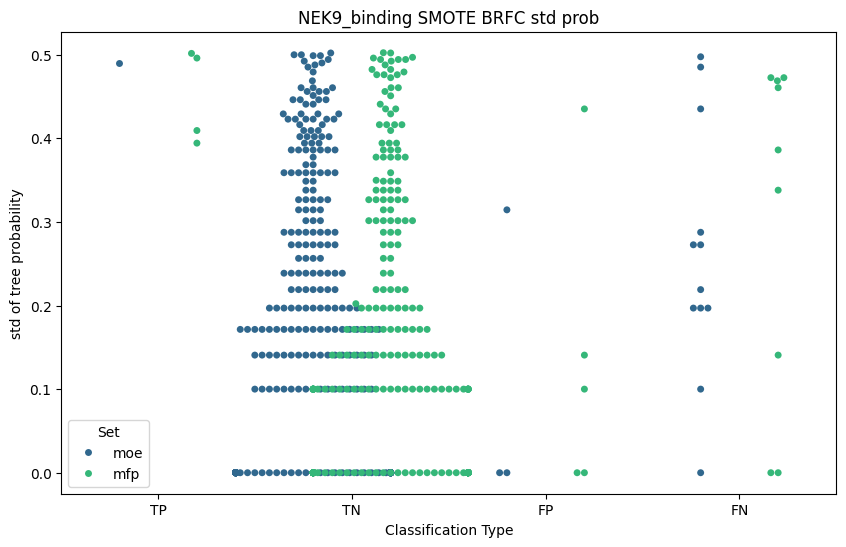

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

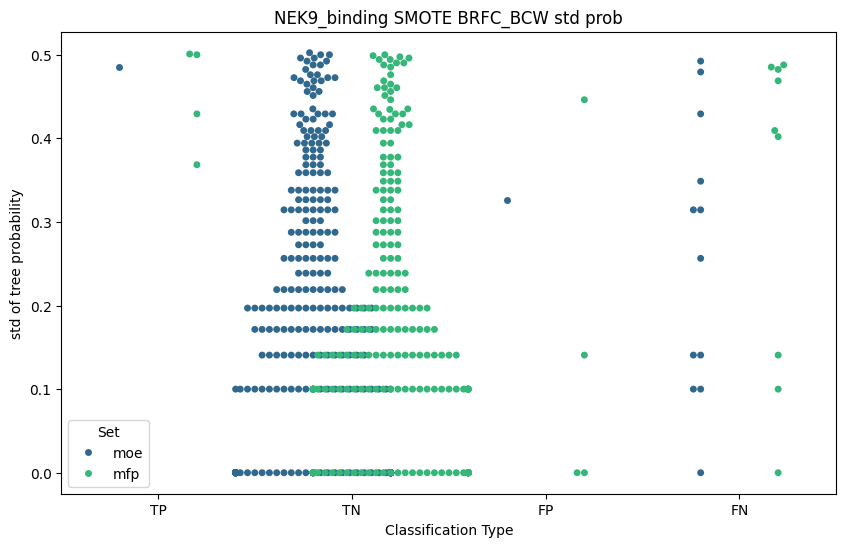

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

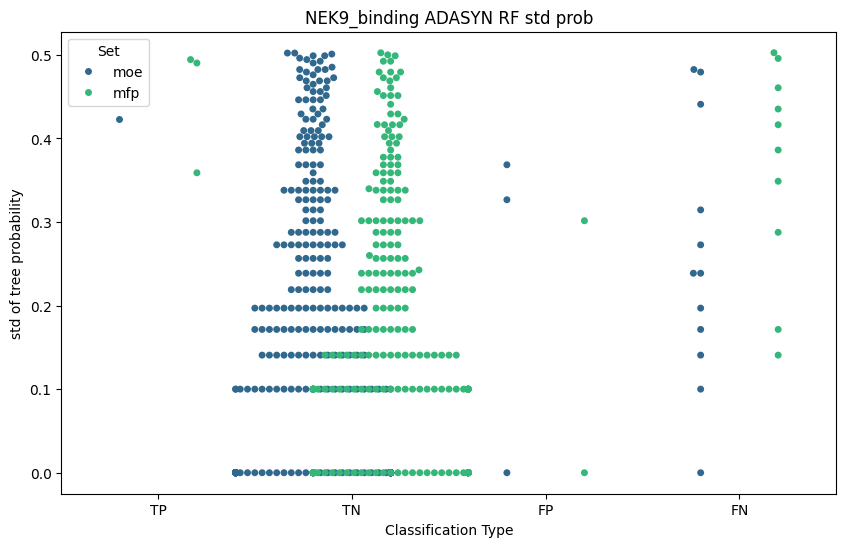

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

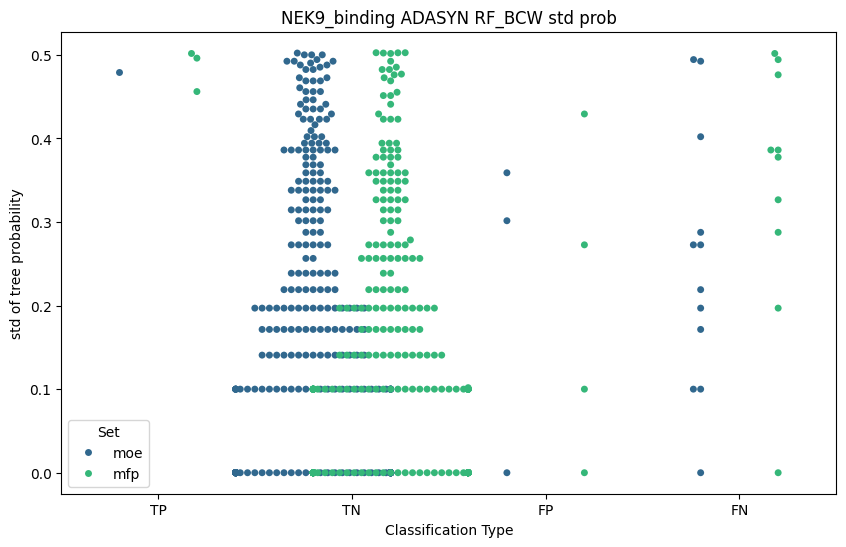

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

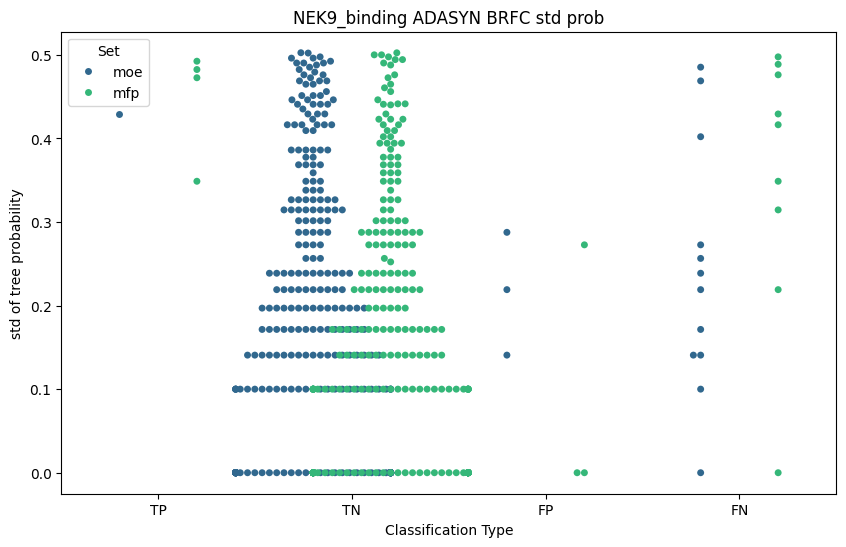

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

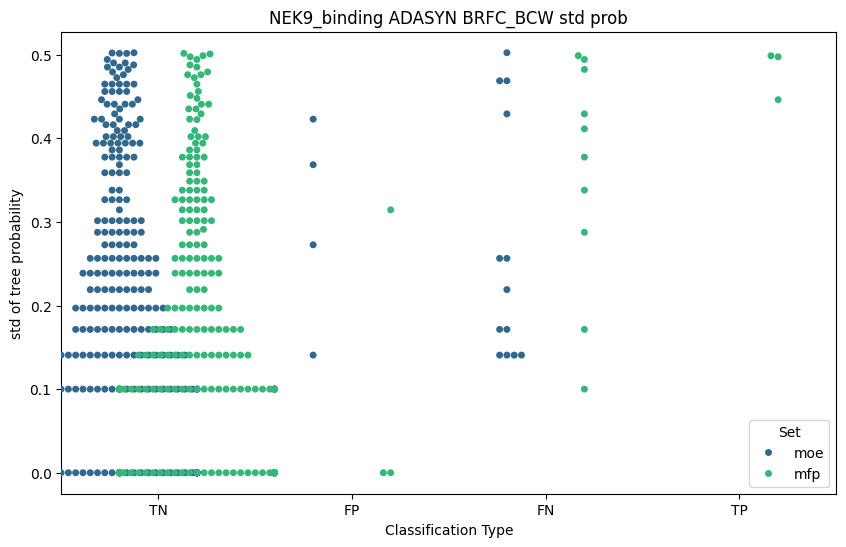

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


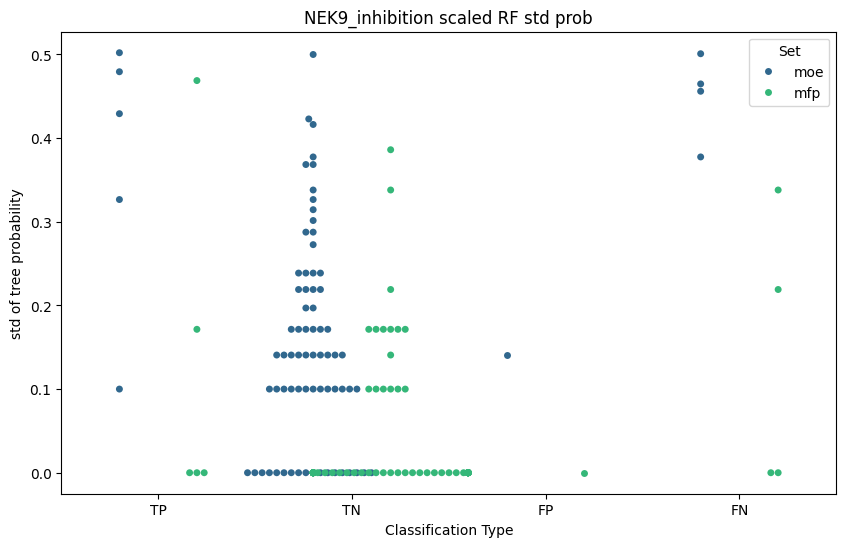

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


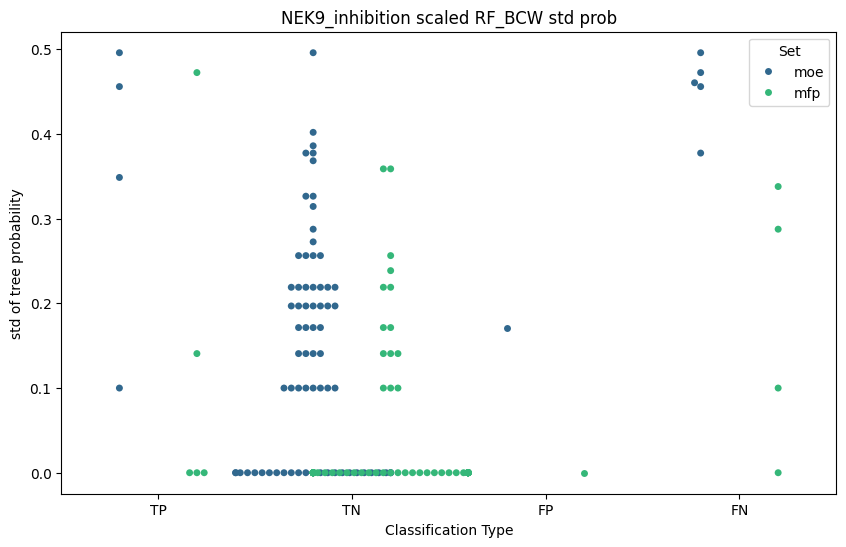

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


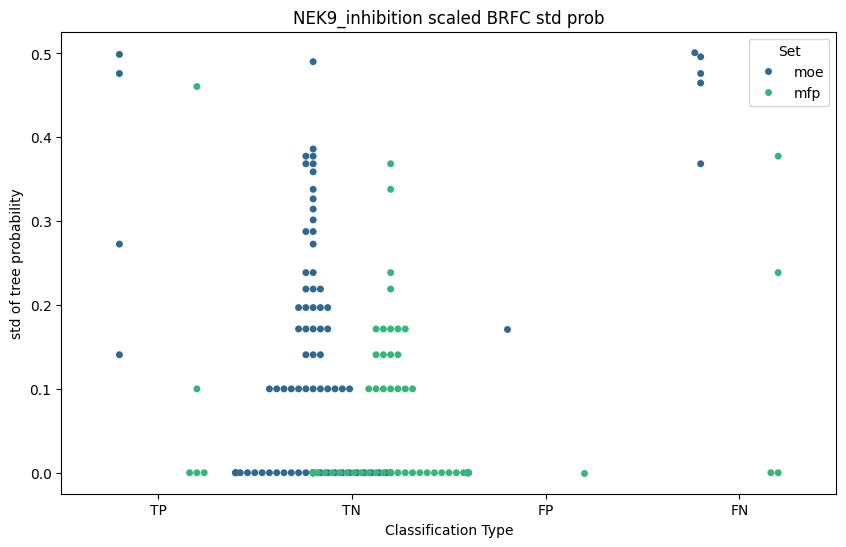

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 48.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


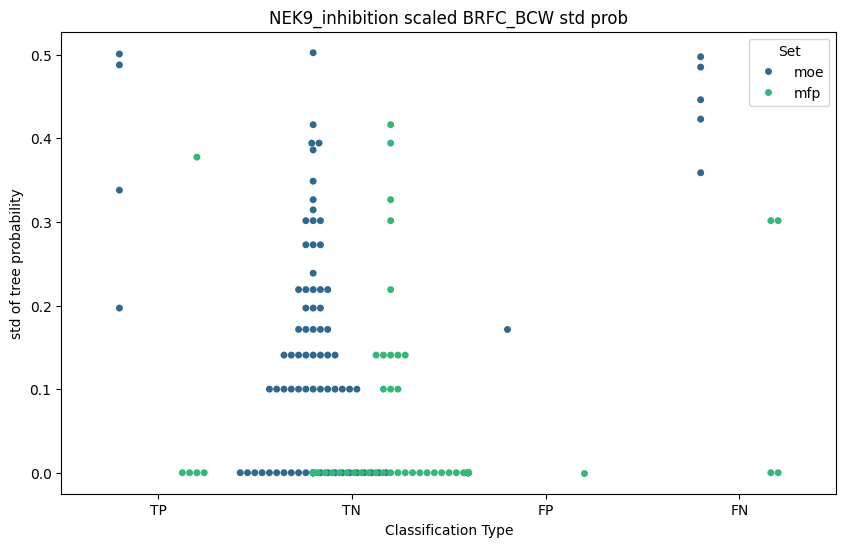

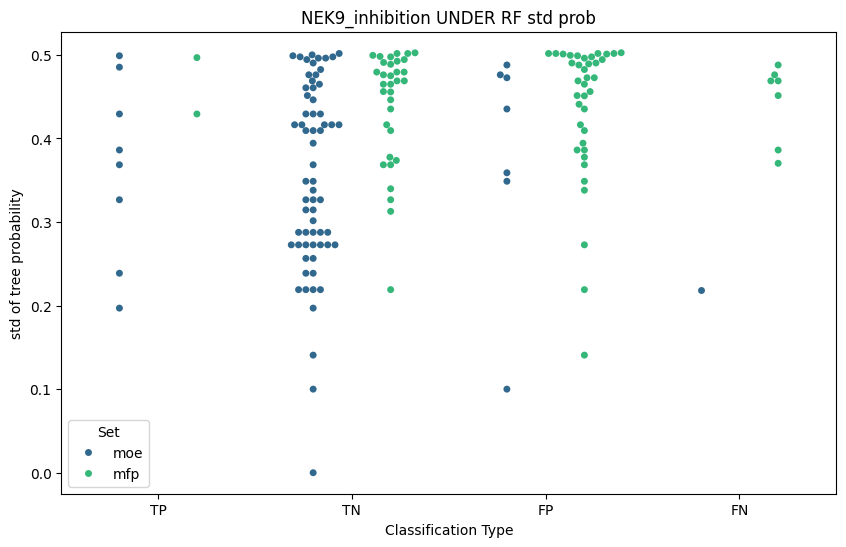

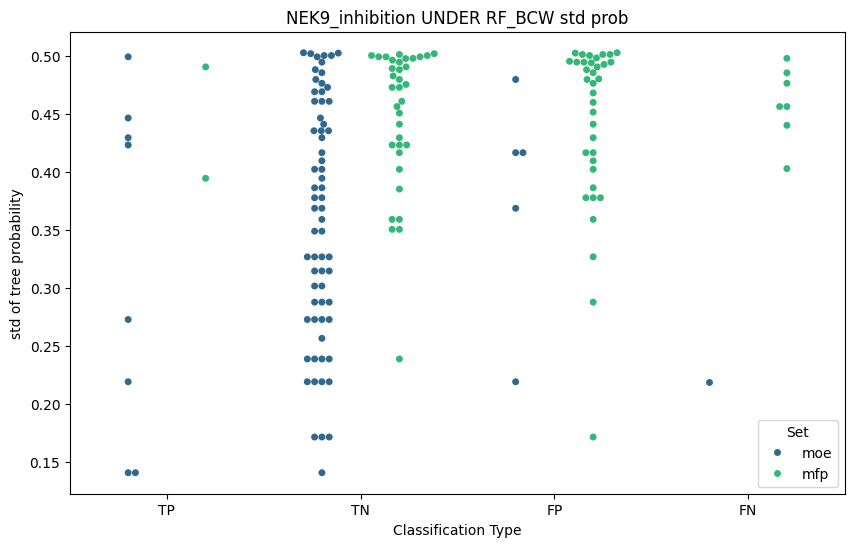

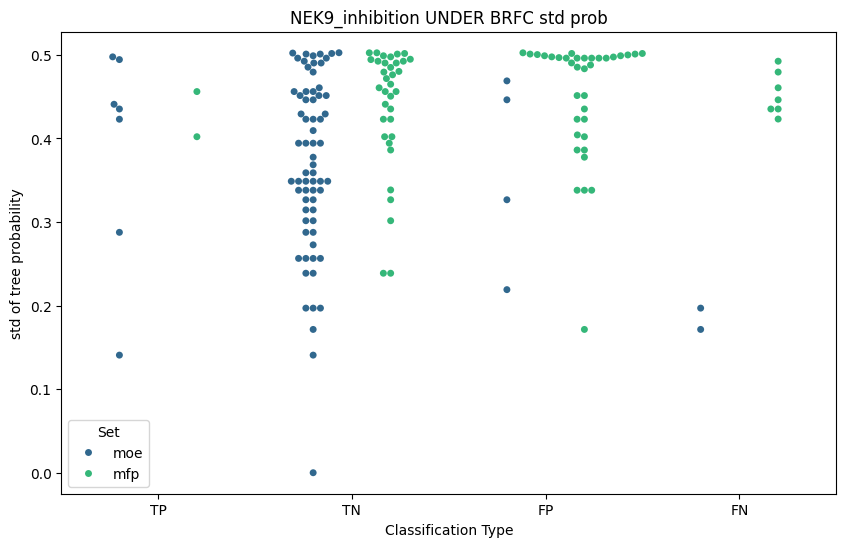

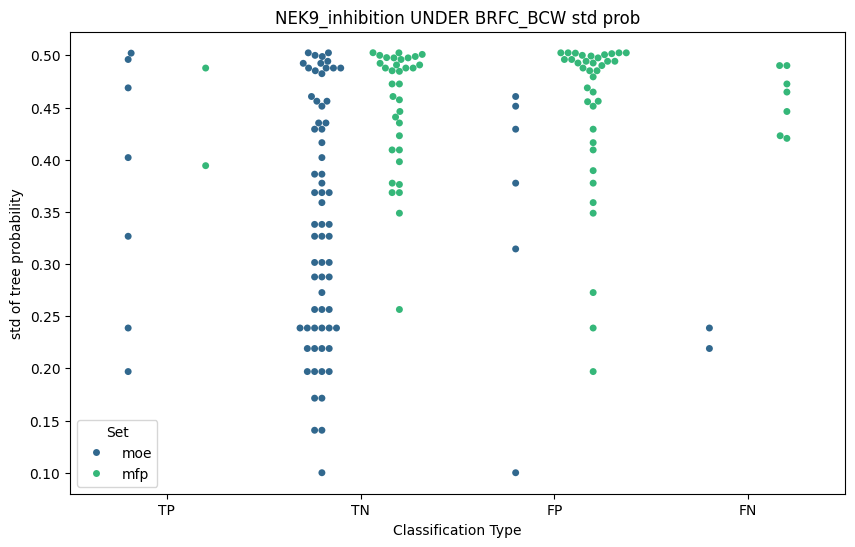

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


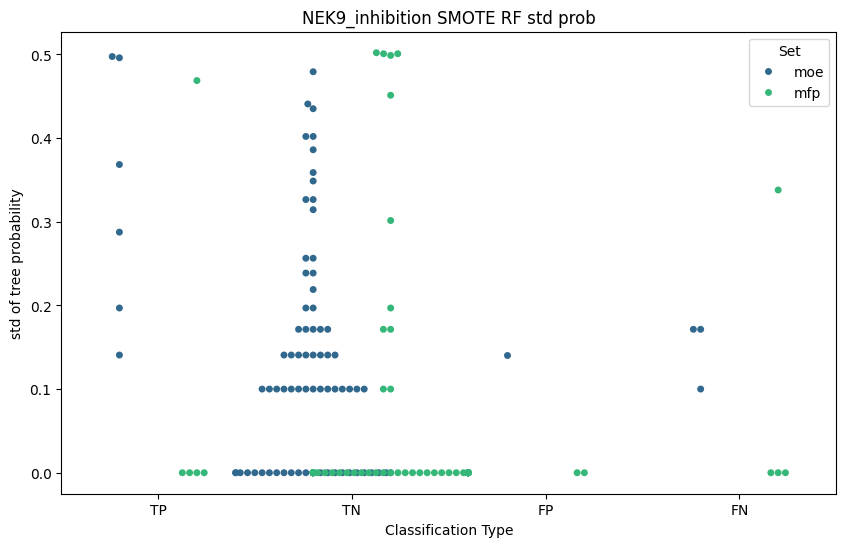

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 47.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


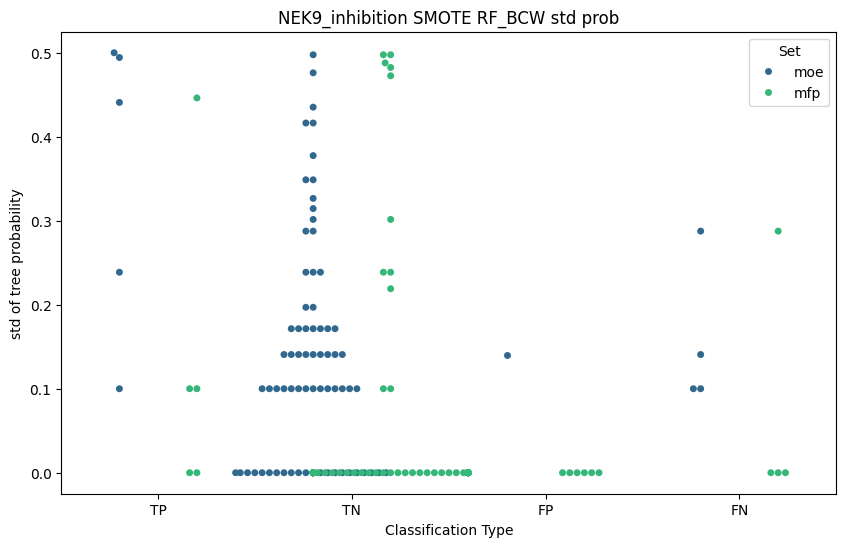

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWar

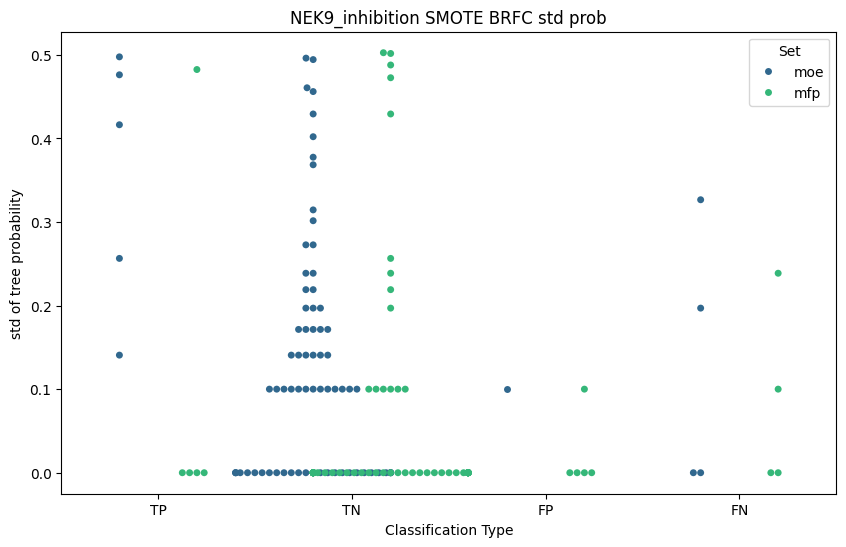

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

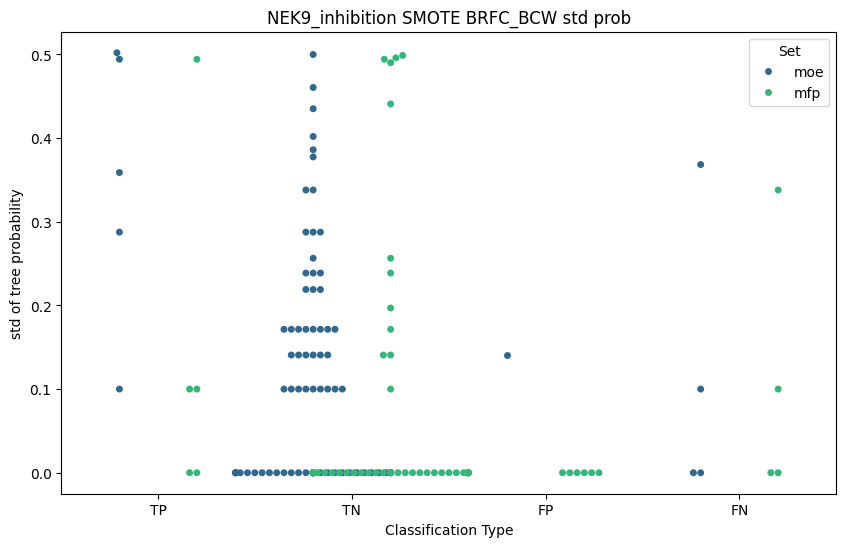

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

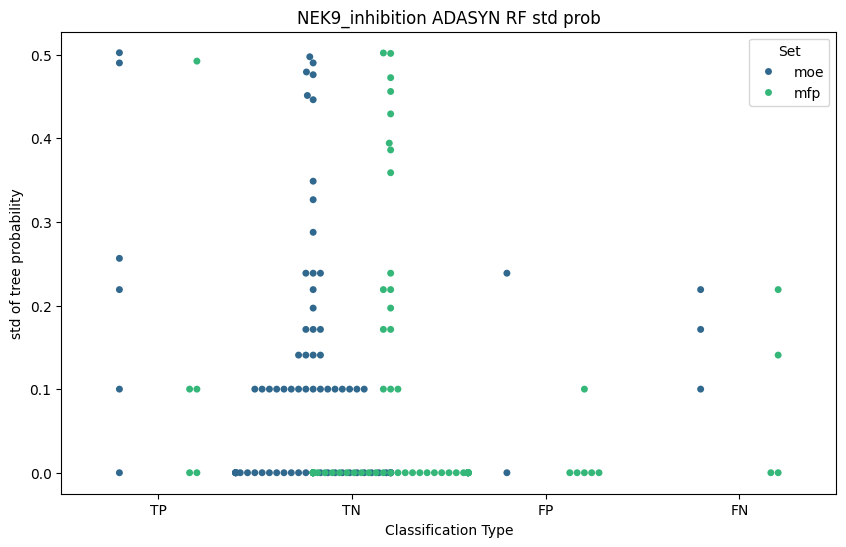

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

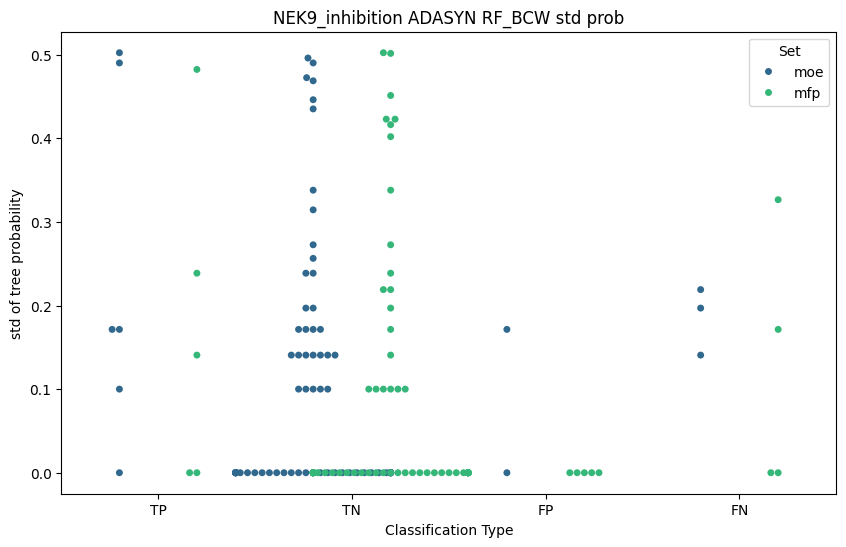

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 36.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

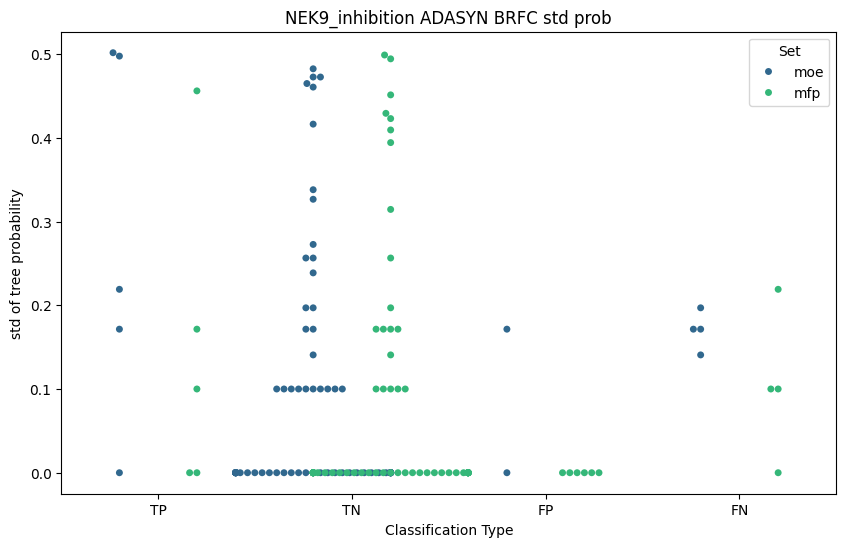

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

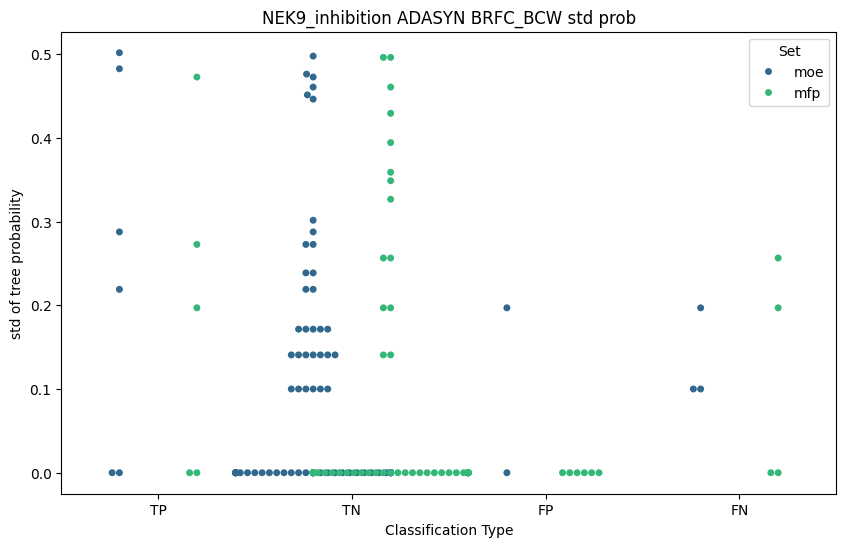

In [4]:
prob_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/proba_dfs/'
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for nek in neks: 
    for samp in samplings: 
        for rf in model_types:
            
            moe_pred = pd.read_csv(f'{result_path}{nek}_moe_{samp}_{rf}_test.csv')
            mfp_pred = pd.read_csv(f'{result_path}{nek}_mfp_{samp}_{rf}_test.csv')
            stdprobs = pd.read_csv(f'{prob_path}{nek}_std_prob_{samp}_{rf}.csv')
            std0_moe = stdprobs['std0_moe']
            std1_moe = stdprobs['std1_moe']
            std0_mfp = stdprobs['std0_mfp']
            std1_mfp  = stdprobs['std1_mfp']
            moe_df = get_swarm_data(moe_pred['prediction'].to_numpy(), moe_pred['y'].to_numpy(), std1_moe.to_numpy(), std0_moe.to_numpy(), 'moe')
            mfp_df = get_swarm_data(mfp_pred['prediction'].to_numpy(), mfp_pred['y'].to_numpy(), std1_mfp.to_numpy(), std0_mfp.to_numpy(), 'mfp')
            df = pd.concat([moe_df, mfp_df])
     
            title = f'{nek} {samp} {rf} std prob'
            plot_swarm_std_prob_RF(df, title)
            
            